In [599]:
import time
start_time = time.time()
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import seaborn as sns
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
import xgboost
from scipy.stats import chi2_contingency, shapiro, mannwhitneyu, ttest_ind
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, auc
from sklearn.metrics import precision_score, recall_score, f1_score, brier_score_loss
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from statistics import mean

In [600]:
df_test = pd.read_parquet("data_fm20_test.parquet")
df = pd.read_parquet("data_fm20_train.parquet")

In [601]:
pd.pandas.set_option('display.max_columns', None)

In [602]:
df.head()

,Name,Club,Division,Height,Weight,Age,Preferred Foot,Best Pos,PA,Wor,Vis,Thr,Tec,Tea,Tck,Str,Sta,TRO,Ref,Pun,Pos,Pen,Pas,Pac,1v1,OtB,Nat,Mar,Lon,Ldr,Kic,Jum,Hea,Han,Fre,Fla,Fir,Fin,Ecc,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc
0,Damian Las,Fulham,English Premier Division,183,73,17,Right Only,GK,107,5,5,8,3,6,2,6,2,9,13,11,11,1,7,12,8,1,6,2,3,11,5,6,1,13,2,1,5,3,1,1,11,13,2,2,8,6,6,5,13,6,4,11,14,10,13
1,VÃ­tor Carvalho,Santo AndrÃ©,Brazilian National Lower Division,184,75,19,Right Only,ST (C),107,8,6,3,13,7,2,6,7,3,3,3,8,8,8,12,1,14,10,5,7,11,2,7,14,2,7,12,14,14,3,14,4,14,5,7,9,9,3,2,7,3,7,12,5,3,11
2,Mehdi Terki,Xanthi,Greek Super League 1,185,77,27,Left Only,M (C),115,12,10,1,13,10,11,10,13,3,1,2,9,7,11,13,3,11,13,12,9,6,3,14,9,2,9,10,14,8,2,13,15,9,10,12,10,11,1,2,13,12,12,12,12,2,13
3,Marcelo Cardozo,Los Andes,Argentine Metropolitan B Zone,178,77,31,Left,D (L),123,13,10,4,11,13,12,11,11,2,3,4,12,5,11,12,3,12,12,12,10,8,1,8,11,3,8,12,10,7,1,12,9,11,13,11,11,10,1,2,13,12,12,14,14,3,13
4,Scott McTominay,Port Vale,Sky Bet League Two,191,85,22,Right,M (C),148,19,9,2,13,19,16,14,18,2,1,2,14,7,13,14,3,12,15,12,10,12,1,17,14,1,5,6,14,10,3,9,18,11,10,6,13,11,3,3,16,16,16,13,15,2,13


In [603]:
df.head()

,Name,Club,Division,Height,Weight,Age,Preferred Foot,Best Pos,PA,Wor,Vis,Thr,Tec,Tea,Tck,Str,Sta,TRO,Ref,Pun,Pos,Pen,Pas,Pac,1v1,OtB,Nat,Mar,Lon,Ldr,Kic,Jum,Hea,Han,Fre,Fla,Fir,Fin,Ecc,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc
0,Damian Las,Fulham,English Premier Division,183,73,17,Right Only,GK,107,5,5,8,3,6,2,6,2,9,13,11,11,1,7,12,8,1,6,2,3,11,5,6,1,13,2,1,5,3,1,1,11,13,2,2,8,6,6,5,13,6,4,11,14,10,13
1,VÃ­tor Carvalho,Santo AndrÃ©,Brazilian National Lower Division,184,75,19,Right Only,ST (C),107,8,6,3,13,7,2,6,7,3,3,3,8,8,8,12,1,14,10,5,7,11,2,7,14,2,7,12,14,14,3,14,4,14,5,7,9,9,3,2,7,3,7,12,5,3,11
2,Mehdi Terki,Xanthi,Greek Super League 1,185,77,27,Left Only,M (C),115,12,10,1,13,10,11,10,13,3,1,2,9,7,11,13,3,11,13,12,9,6,3,14,9,2,9,10,14,8,2,13,15,9,10,12,10,11,1,2,13,12,12,12,12,2,13
3,Marcelo Cardozo,Los Andes,Argentine Metropolitan B Zone,178,77,31,Left,D (L),123,13,10,4,11,13,12,11,11,2,3,4,12,5,11,12,3,12,12,12,10,8,1,8,11,3,8,12,10,7,1,12,9,11,13,11,11,10,1,2,13,12,12,14,14,3,13
4,Scott McTominay,Port Vale,Sky Bet League Two,191,85,22,Right,M (C),148,19,9,2,13,19,16,14,18,2,1,2,14,7,13,14,3,12,15,12,10,12,1,17,14,1,5,6,14,10,3,9,18,11,10,6,13,11,3,3,16,16,16,13,15,2,13


In [604]:
df.columns

Index(['Name', 'Club', 'Division', 'Height', 'Weight', 'Age', 'Preferred Foot',
       'Best Pos', 'PA', 'Wor', 'Vis', 'Thr', 'Tec', 'Tea', 'Tck', 'Str',
       'Sta', 'TRO', 'Ref', 'Pun', 'Pos', 'Pen', 'Pas', 'Pac', '1v1', 'OtB',
       'Nat', 'Mar', 'Lon', 'Ldr', 'Kic', 'Jum', 'Hea', 'Han', 'Fre', 'Fla',
       'Fir', 'Fin', 'Ecc', 'Dri', 'Det', 'Dec', 'Cro', 'Cor', 'Cnt', 'Cmp',
       'Com', 'Cmd', 'Bra', 'Bal', 'Ant', 'Agi', 'Agg', 'Aer', 'Acc'],
      dtype='object')

In [605]:
df_test.columns

Index(['Name', 'Club', 'Division', 'Height', 'Weight', 'Age', 'Preferred Foot',
       'Best Pos', 'PA', 'Wor', 'Vis', 'Thr', 'Tec', 'Tea', 'Tck', 'Str',
       'Sta', 'TRO', 'Ref', 'Pun', 'Pos', 'Pen', 'Pas', 'Pac', '1v1', 'OtB',
       'Nat', 'Mar', 'Lon', 'Ldr', 'Kic', 'Jum', 'Hea', 'Han', 'Fre', 'Fla',
       'Fir', 'Fin', 'Ecc', 'Dri', 'Det', 'Dec', 'Cro', 'Cor', 'Cnt', 'Cmp',
       'Com', 'Cmd', 'Bra', 'Bal', 'Ant', 'Agi', 'Agg', 'Aer', 'Acc'],
      dtype='object')

In [606]:
df.duplicated().sum()

0

In [607]:
df_test.duplicated().sum()

0

In [608]:
df.shape

(50000, 55)

In [609]:
df_test.shape

(14446, 55)

<AxesSubplot:xlabel='PA', ylabel='Density'>

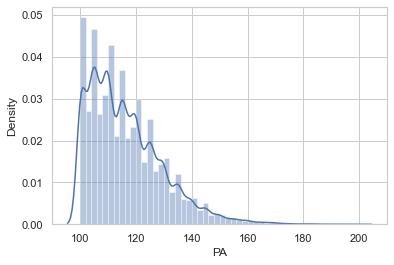

In [610]:
sns.distplot(df.PA)

<AxesSubplot:xlabel='PA', ylabel='Density'>

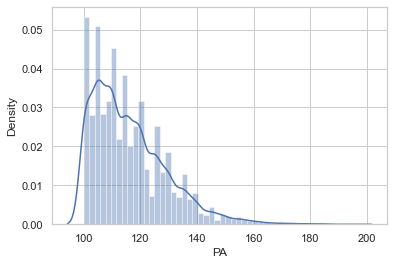

In [611]:
sns.distplot(df_test.PA)

In [612]:
len(df[df["PA"]>=170])/len(df)

0.00218

In [613]:
len(df_test[df_test["PA"]>=160])/len(df_test)

0.0076837878997646405

In [614]:
df["Target"] = df["PA"]
df_test["Target"] = df_test["PA"]

In [615]:
def setcategory_target(value):
    
    if value>=150:
        return 1
    
    else:
        return 0
    
df['Target'] = df['PA'].apply(lambda x:setcategory_target(x))
df_test['Target'] = df_test['PA'].apply(lambda x:setcategory_target(x))

In [616]:
df.head()

,Name,Club,Division,Height,Weight,Age,Preferred Foot,Best Pos,PA,Wor,Vis,Thr,Tec,Tea,Tck,Str,Sta,TRO,Ref,Pun,Pos,Pen,Pas,Pac,1v1,OtB,Nat,Mar,Lon,Ldr,Kic,Jum,Hea,Han,Fre,Fla,Fir,Fin,Ecc,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc,Target
0,Damian Las,Fulham,English Premier Division,183,73,17,Right Only,GK,107,5,5,8,3,6,2,6,2,9,13,11,11,1,7,12,8,1,6,2,3,11,5,6,1,13,2,1,5,3,1,1,11,13,2,2,8,6,6,5,13,6,4,11,14,10,13,0
1,VÃ­tor Carvalho,Santo AndrÃ©,Brazilian National Lower Division,184,75,19,Right Only,ST (C),107,8,6,3,13,7,2,6,7,3,3,3,8,8,8,12,1,14,10,5,7,11,2,7,14,2,7,12,14,14,3,14,4,14,5,7,9,9,3,2,7,3,7,12,5,3,11,0
2,Mehdi Terki,Xanthi,Greek Super League 1,185,77,27,Left Only,M (C),115,12,10,1,13,10,11,10,13,3,1,2,9,7,11,13,3,11,13,12,9,6,3,14,9,2,9,10,14,8,2,13,15,9,10,12,10,11,1,2,13,12,12,12,12,2,13,0
3,Marcelo Cardozo,Los Andes,Argentine Metropolitan B Zone,178,77,31,Left,D (L),123,13,10,4,11,13,12,11,11,2,3,4,12,5,11,12,3,12,12,12,10,8,1,8,11,3,8,12,10,7,1,12,9,11,13,11,11,10,1,2,13,12,12,14,14,3,13,0
4,Scott McTominay,Port Vale,Sky Bet League Two,191,85,22,Right,M (C),148,19,9,2,13,19,16,14,18,2,1,2,14,7,13,14,3,12,15,12,10,12,1,17,14,1,5,6,14,10,3,9,18,11,10,6,13,11,3,3,16,16,16,13,15,2,13,0


In [617]:
df.shape

(50000, 56)

In [618]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 56 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            50000 non-null  object
 1   Club            50000 non-null  object
 2   Division        50000 non-null  object
 3   Height          50000 non-null  int64 
 4   Weight          50000 non-null  int64 
 5   Age             50000 non-null  int64 
 6   Preferred Foot  50000 non-null  object
 7   Best Pos        50000 non-null  object
 8   PA              50000 non-null  int64 
 9   Wor             50000 non-null  int64 
 10  Vis             50000 non-null  int64 
 11  Thr             50000 non-null  int64 
 12  Tec             50000 non-null  int64 
 13  Tea             50000 non-null  int64 
 14  Tck             50000 non-null  int64 
 15  Str             50000 non-null  int64 
 16  Sta             50000 non-null  int64 
 17  TRO             50000 non-null  int64 
 18  Ref   

In [619]:
df.isnull().sum()

Name              0
Club              0
Division          0
Height            0
Weight            0
Age               0
Preferred Foot    0
Best Pos          0
PA                0
Wor               0
Vis               0
Thr               0
Tec               0
Tea               0
Tck               0
Str               0
Sta               0
TRO               0
Ref               0
Pun               0
Pos               0
Pen               0
Pas               0
Pac               0
1v1               0
OtB               0
Nat               0
Mar               0
Lon               0
Ldr               0
Kic               0
Jum               0
Hea               0
Han               0
Fre               0
Fla               0
Fir               0
Fin               0
Ecc               0
Dri               0
Det               0
Dec               0
Cro               0
Cor               0
Cnt               0
Cmp               0
Com               0
Cmd               0
Bra               0
Bal               0


In [620]:
df = pd.get_dummies(df, columns = ["Preferred Foot"])
df_test = pd.get_dummies(df_test, columns = ["Preferred Foot"])

In [621]:
df.sample(10)

,Name,Club,Division,Height,Weight,Age,Best Pos,PA,Wor,Vis,Thr,Tec,Tea,Tck,Str,Sta,TRO,Ref,Pun,Pos,Pen,Pas,Pac,1v1,OtB,Nat,Mar,Lon,Ldr,Kic,Jum,Hea,Han,Fre,Fla,Fir,Fin,Ecc,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc,Target,Preferred Foot_Either,Preferred Foot_Left,Preferred Foot_Left Only,Preferred Foot_Right,Preferred Foot_Right Only
7503,Gonzalo RodrÃ­guez,San MartÃ­n (TucumÃ¡n),Argentine Premier Division,178,77,28,AM (R),114,10,13,1,13,12,7,8,13,2,1,3,10,8,11,13,3,12,13,8,9,8,3,8,6,2,7,13,9,12,2,11,10,12,12,7,11,12,3,2,10,9,11,15,8,3,14,0,0,0,0,1,0
14185,Ricco Cymer,Aachen,German Regional Division West,185,74,23,GK,100,5,6,7,4,5,2,5,1,7,13,10,8,3,9,12,11,3,14,3,2,6,9,11,1,13,5,1,2,3,1,2,5,13,2,1,12,5,12,13,13,7,9,13,3,8,10,0,0,0,0,1,0
46719,Gabriel Torres,Independiente del Valle,Ecuadorian Serie A,180,78,30,ST (C),128,11,10,3,12,11,5,11,12,1,3,4,8,16,10,13,4,14,14,6,11,6,1,8,12,1,12,13,13,13,1,12,13,12,9,7,13,14,1,2,12,11,13,13,12,2,13,0,0,0,0,1,0
39704,Martin Kompalla,RoPS,Finnish Premier League,186,83,26,GK,100,12,11,10,7,11,1,10,9,8,11,8,10,1,11,9,11,12,9,2,3,10,11,13,8,9,10,10,10,1,7,2,10,11,2,7,10,8,11,12,10,11,8,12,11,12,10,0,0,0,0,1,0
42109,Thabang Matuka,Unknown,Unknown,165,59,29,D (L),110,10,7,2,8,10,15,5,11,2,1,1,12,2,8,13,3,7,17,12,8,2,3,2,8,2,1,7,8,5,3,11,18,13,8,5,15,10,1,1,11,7,12,14,6,3,13,0,0,1,0,0,0
12098,Elia Legati,FeralpiSalÃ²,Italian Serie C/B,187,85,33,D (C),120,11,11,1,12,13,12,13,10,3,3,4,11,7,11,12,1,12,12,13,9,13,1,13,13,4,8,6,11,4,3,6,14,11,10,5,12,12,3,3,12,13,10,11,11,2,11,0,0,0,0,0,1
32249,Naldo,BTF,Turkish Super League,185,76,29,DM,130,14,10,1,11,14,13,14,13,2,2,3,13,11,12,13,2,10,13,13,8,12,3,13,12,2,7,12,10,9,1,8,14,12,10,8,12,11,2,2,13,11,13,12,14,1,13,0,0,0,0,1,0
6884,Davide Moscardelli,Pisa,Italian Serie B,185,80,39,ST (C),130,13,12,2,13,11,7,13,9,3,3,1,10,15,12,9,3,10,13,6,14,18,1,13,12,1,12,16,12,13,2,13,13,10,9,9,12,9,3,2,13,14,13,9,12,2,10,0,0,1,0,0,0
9089,Alberto Quiles,Huelva,Spanish Second Division B4,188,72,24,ST (C),125,9,7,2,12,8,5,6,14,1,3,1,7,6,9,13,2,12,12,8,5,14,2,14,14,3,8,14,14,12,3,14,13,10,7,8,9,12,3,2,8,9,14,12,9,1,14,0,0,0,0,1,0
37519,Darko Jevtic,Rubin,Russian Premier League,182,75,26,AM (C),125,11,14,1,15,13,8,10,12,3,2,2,11,13,16,12,2,13,12,9,13,10,3,12,9,3,14,15,14,12,3,15,10,14,12,13,9,12,1,1,14,11,12,14,10,4,11,0,0,0,1,0,0


In [622]:
def setcategory_foot(value):
    
    if value==1:
        return 1
    
    else:
        return None
   

    

df['PFR'] = df['Preferred Foot_Right Only'].apply(lambda x:setcategory_foot(x))
df['PFL'] = df['Preferred Foot_Left Only'].apply(lambda x:setcategory_foot(x))

df.PFR = df.PFR.fillna(value=df['Preferred Foot_Right'])
df.PFL = df.PFL.fillna(value=df['Preferred Foot_Left'])

df.drop(columns=["Preferred Foot_Left Only", "Preferred Foot_Right Only"], inplace=True)

df_test['PFR'] = df_test['Preferred Foot_Right Only'].apply(lambda x:setcategory_foot(x))
df_test['PFL'] = df_test['Preferred Foot_Left Only'].apply(lambda x:setcategory_foot(x))

df_test.PFR = df_test.PFR.fillna(value=df_test['Preferred Foot_Right'])
df_test.PFL = df_test.PFL.fillna(value=df_test['Preferred Foot_Left'])

df_test.drop(columns=["Preferred Foot_Left Only", "Preferred Foot_Right Only"], inplace=True)

In [623]:
def setcategory_foot2(value):
    
    if value==1:
        return 1
    else:
        return None
    

    

df['Preferred Foot_Right'] = df['Preferred Foot_Either'].apply(lambda x:setcategory_foot2(x))
df['Preferred Foot_Left'] = df['Preferred Foot_Either'].apply(lambda x:setcategory_foot2(x))

df['Preferred Foot_Left'] = df['Preferred Foot_Left'].fillna(value=df.PFL)
df['Preferred Foot_Right'] = df['Preferred Foot_Right'].fillna(value=df.PFR)
        
df.drop(columns=["Preferred Foot_Either", "PFR", "PFL"], inplace=True)



df_test['Preferred Foot_Right'] = df_test['Preferred Foot_Either'].apply(lambda x:setcategory_foot2(x))
df_test['Preferred Foot_Left'] = df_test['Preferred Foot_Either'].apply(lambda x:setcategory_foot2(x))

df_test['Preferred Foot_Left'] = df_test['Preferred Foot_Left'].fillna(value=df_test.PFL)
df_test['Preferred Foot_Right'] = df_test['Preferred Foot_Right'].fillna(value=df_test.PFR)
        
df_test.drop(columns=["Preferred Foot_Either", "PFR", "PFL"], inplace=True)

In [624]:
df["Best Pos"].unique()

array(['GK', 'ST (C)', 'M (C)', 'D (L)', 'M (R)', 'D (C)', 'AM (L)',
       'AM (R)', 'DM', 'D (R)', 'AM (C)', 'M (L)', 'WB (L)', 'WB (R)'],
      dtype=object)

In [625]:
df_goalkeepers = df[df["Best Pos"] == "GK"]
df_goalkeepers.reset_index(inplace=True, drop=True)

df_goalkeepers_test = df_test[df_test["Best Pos"] == "GK"]
df_goalkeepers_test.reset_index(inplace=True, drop=True)

In [626]:
df_goalkeepers.drop(columns=["Tec", "Tck", "Pen", "Pas", "Mar", "Lon", "Hea", "Fre", "Fla", "Fin",
                                        "Dri", "Cro", "Cor"], inplace=True)

df_goalkeepers_test.drop(columns=["Tec", "Tck", "Pen", "Pas", "Mar", "Lon", "Hea", "Fre", "Fla", "Fin",
                                        "Dri", "Cro", "Cor"], inplace=True)

In [627]:
df_goalkeepers.head()

,Name,Club,Division,Height,Weight,Age,Best Pos,PA,Wor,Vis,Thr,Tea,Str,Sta,TRO,Ref,Pun,Pos,Pac,1v1,OtB,Nat,Ldr,Kic,Jum,Han,Fir,Ecc,Det,Dec,Cnt,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc,Target,Preferred Foot_Left,Preferred Foot_Right
0,Damian Las,Fulham,English Premier Division,183,73,17,GK,107,5,5,8,6,6,2,9,13,11,11,12,8,1,6,11,5,6,13,5,1,11,13,8,6,6,5,13,6,4,11,14,10,13,0,0.0,1.0
1,Stav Plesental,S.C. Tira,Israeli A League North Division,180,77,25,GK,105,7,7,5,8,7,5,14,14,12,13,12,8,2,9,5,14,6,14,1,1,12,11,9,7,10,11,14,8,9,8,12,10,13,0,0.0,1.0
2,Jan Oblak,A. Madrid,Spanish First Division,189,84,26,GK,178,13,8,14,13,13,13,15,19,9,16,13,16,2,9,11,16,13,18,12,4,15,17,16,17,15,16,13,13,11,13,8,15,11,1,0.0,1.0
3,Nahuel GÃ³mez,Unknown,Unknown,187,82,24,GK,100,8,8,12,11,12,8,9,11,10,8,11,11,2,15,14,7,12,9,4,8,16,8,9,9,8,9,13,9,12,12,5,11,11,0,0.0,1.0
4,Anthony Martin,SC Bastia,French National 2 - A,183,75,29,GK,105,9,9,9,10,11,12,7,11,10,10,8,11,1,13,8,10,12,11,5,7,12,10,11,11,11,11,11,11,12,10,13,12,9,0,0.0,1.0


In [925]:
df_forwards =  df[(df["Best Pos"] == "AM (R)") | (df["Best Pos"] == "AM (L)") | (df["Best Pos"] == "ST (C)") | (df["Best Pos"] == "M (L)") | (df["Best Pos"] == "M (R)")]


df_forwards_test =  df_test[(df_test["Best Pos"] == "AM (R)") | (df_test["Best Pos"] == "AM (L)") | (df_test["Best Pos"] == "ST (C)") | (df_test["Best Pos"] == "M (L)") | (df_test["Best Pos"] == "M (R)")]

In [926]:
df_forwards.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer", "Mar", "Tck" ], inplace=True)

df_forwards_test.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer", "Mar", "Tck" ], inplace=True)

In [927]:
df_forwards.reset_index(inplace=True, drop=True)

df_forwards_test.reset_index(inplace=True, drop=True)

In [631]:
df_forwards.head()

,Name,Club,Division,Height,Weight,Age,Best Pos,PA,Wor,Vis,Tec,Tea,Str,Sta,Pos,Pen,Pas,Pac,OtB,Nat,Lon,Ldr,Jum,Hea,Fre,Fla,Fir,Fin,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Bra,Bal,Ant,Agi,Agg,Acc,Target,Preferred Foot_Left,Preferred Foot_Right
0,VÃ­tor Carvalho,Santo AndrÃ©,Brazilian National Lower Division,184,75,19,ST (C),107,8,6,13,7,6,7,8,8,8,12,14,10,7,11,7,14,7,12,14,14,14,4,14,5,7,9,9,7,3,7,12,5,11,0,0.0,1.0
1,Alexis Vega,Temperley,Argentine Second Division,167,68,26,M (R),108,12,10,11,11,10,14,10,7,12,13,12,12,11,3,7,10,10,11,12,8,10,11,10,12,11,11,12,13,10,11,12,12,14,0,0.0,1.0
2,Oli Shaw,Ross County,Ladbrokes Premiership,188,68,21,ST (C),119,13,11,9,9,9,13,13,12,9,11,14,14,10,9,4,10,3,13,12,15,11,10,11,6,7,12,15,9,12,10,11,5,12,0,0.0,1.0
3,Javi Moreno,U. Murcia,Unknown,184,73,22,AM (L),105,13,9,12,8,6,9,7,6,10,12,10,16,8,4,6,7,7,11,11,7,13,6,13,12,14,8,11,5,3,8,10,12,13,0,1.0,0.0
4,Jeferson Collazos,AtlÃ©tico Grau,Peruvian First Division,180,84,28,ST (C),116,11,11,14,10,8,15,11,5,11,12,15,14,13,12,8,15,10,12,15,11,15,9,11,10,10,11,10,6,11,15,14,14,12,0,0.0,1.0


In [632]:
df_midfielders = df[(df["Best Pos"] == "M (C)") | (df["Best Pos"] == "AM (C)") | (df["Best Pos"] == "DM")]

df_midfielders_test = df_test[(df_test["Best Pos"] == "M (C)") | (df_test["Best Pos"] == "AM (C)") | (df_test["Best Pos"] == "DM")]

In [633]:
df_midfielders.reset_index(inplace=True, drop=True)
df_midfielders_test.reset_index(inplace=True, drop=True)

In [634]:
df_midfielders.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer"], inplace=True)
df_midfielders_test.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer"], inplace=True)

In [635]:
df_midfielders.head()

,Name,Club,Division,Height,Weight,Age,Best Pos,PA,Wor,Vis,Tec,Tea,Tck,Str,Sta,Pos,Pen,Pas,Pac,OtB,Nat,Mar,Lon,Ldr,Jum,Hea,Fre,Fla,Fir,Fin,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Bra,Bal,Ant,Agi,Agg,Acc,Target,Preferred Foot_Left,Preferred Foot_Right
0,Mehdi Terki,Xanthi,Greek Super League 1,185,77,27,M (C),115,12,10,13,10,11,10,13,9,7,11,13,11,13,12,9,6,14,9,9,10,14,8,13,15,9,10,12,10,11,13,12,12,12,12,13,0,1.0,0.0
1,Scott McTominay,Port Vale,Sky Bet League Two,191,85,22,M (C),148,19,9,13,19,16,14,18,14,7,13,14,12,15,12,10,12,17,14,5,6,14,10,9,18,11,10,6,13,11,16,16,16,13,15,13,0,0.0,1.0
2,Samir Chergui,AJ Auxerre,French Reserves Group 3,180,63,20,DM,115,11,14,13,12,10,11,10,11,5,13,12,8,12,11,10,2,11,10,10,1,12,8,10,4,8,7,10,8,9,9,12,12,13,13,11,0,0.0,1.0
3,Adam King,Queen's Park,Ladbrokes League 2,180,75,23,M (C),113,13,12,11,15,11,12,13,10,9,10,11,11,14,9,11,8,11,11,7,8,11,10,8,9,9,9,9,9,13,13,12,11,11,14,11,0,0.0,1.0
4,Amidu Salifu,Salmiya,Kuwaiti Premier League,182,78,26,M (C),119,13,9,8,13,13,14,14,12,5,8,11,9,8,12,10,9,11,11,4,10,8,6,7,16,9,8,6,9,10,15,14,12,11,14,11,0,0.0,1.0


In [636]:
df_defenders = df[(df["Best Pos"] == "D (C)")]

df_defenders_test = df_test[(df_test["Best Pos"] == "D (C)")]

In [637]:
df_defenders.reset_index(inplace=True, drop=True)
df_defenders_test.reset_index(inplace=True, drop=True)

In [638]:
df_defenders.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer"], inplace=True)
df_defenders_test.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer"], inplace=True)

In [639]:
df_defenders.head()

,Name,Club,Division,Height,Weight,Age,Best Pos,PA,Wor,Vis,Tec,Tea,Tck,Str,Sta,Pos,Pen,Pas,Pac,OtB,Nat,Mar,Lon,Ldr,Jum,Hea,Fre,Fla,Fir,Fin,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Bra,Bal,Ant,Agi,Agg,Acc,Target,Preferred Foot_Left,Preferred Foot_Right
0,Bart Meijers,Almere City,Keuken Kampioen Divisie,185,77,22,D (C),100,9,8,9,9,10,11,13,13,4,8,14,8,4,10,3,1,12,11,3,1,7,5,5,12,14,4,6,6,3,10,14,9,14,12,14,0,0.0,1.0
1,Marcus Degerlund,JÃ¶nkÃ¶pings SÃ¶dra IF,Swedish First Division Elite,194,82,21,D (C),128,9,10,11,9,12,12,12,12,6,12,12,6,10,12,6,9,16,12,6,6,11,5,5,12,12,11,6,11,11,12,12,12,6,8,11,0,1.0,0.0
2,Rafael Morisco,Mosta,Maltese Premier League,182,80,32,D (C),115,12,7,11,12,12,10,13,11,8,8,11,6,12,12,8,10,11,11,9,11,10,6,7,10,11,7,4,11,11,11,9,10,9,12,11,0,1.0,0.0
3,Lorenzo Lucchesi,Juventus,Italian Serie A,190,74,16,D (C),128,7,4,1,6,11,6,12,14,1,7,14,6,11,11,3,4,13,9,1,1,6,1,5,14,6,1,3,8,4,8,7,6,12,11,10,0,1.0,1.0
4,Bence Keresztes,SzentlÅrinc,Hungarian Division III - KÃ¶zÃ©p,190,82,22,D (C),102,7,4,3,6,13,8,10,13,1,7,12,6,15,11,3,13,14,13,1,1,7,1,1,6,11,1,3,7,2,9,7,12,10,11,13,0,0.0,1.0


In [640]:
df_backs = df[(df["Best Pos"] == "D (R)") | (df["Best Pos"] == "D (L)") | (df["Best Pos"] == "WB (L)") | (df["Best Pos"] == "WB (R)")]
df_backs_test = df_test[(df_test["Best Pos"] == "D (R)") | (df_test["Best Pos"] == "D (L)") | (df_test["Best Pos"] == "WB (L)") | (df_test["Best Pos"] == "WB (R)")]

In [641]:
df_backs.reset_index(inplace=True, drop=True)
df_backs_test.reset_index(inplace=True, drop=True)

In [642]:
df_backs.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer"], inplace=True)
df_backs_test.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer"], inplace=True)

In [643]:
df_backs.head()

,Name,Club,Division,Height,Weight,Age,Best Pos,PA,Wor,Vis,Tec,Tea,Tck,Str,Sta,Pos,Pen,Pas,Pac,OtB,Nat,Mar,Lon,Ldr,Jum,Hea,Fre,Fla,Fir,Fin,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Bra,Bal,Ant,Agi,Agg,Acc,Target,Preferred Foot_Left,Preferred Foot_Right
0,Marcelo Cardozo,Los Andes,Argentine Metropolitan B Zone,178,77,31,D (L),123,13,10,11,13,12,11,11,12,5,11,12,12,12,12,10,8,8,11,8,12,10,7,12,9,11,13,11,11,10,13,12,12,14,14,13,0,1.0,0.0
1,Alaa Al-Shibli,Al-Mesaimeer,Qatari League,173,64,29,D (R),110,10,7,10,10,15,8,8,13,6,10,15,7,9,11,8,9,5,10,5,6,15,7,7,9,13,7,8,13,10,9,10,11,15,13,15,0,0.0,1.0
2,Federico Ermacora,Triestina,Italian Serie C/B,177,69,19,D (L),119,11,8,10,11,11,7,11,11,5,9,13,7,11,11,7,6,7,7,5,6,8,5,10,12,8,10,4,11,8,9,10,10,11,9,13,0,1.0,0.0
3,Guilherme RomÃ£o,BTF,Brazilian National Second Division,179,70,21,D (L),127,14,12,12,12,9,9,13,10,6,12,14,13,13,9,8,12,9,9,13,3,12,11,13,12,11,12,13,10,10,12,8,11,14,13,14,0,1.0,0.0
4,Gabriele Zappa,Pescara,Italian Serie B,189,78,19,D (R),119,11,11,11,10,10,9,8,10,7,11,15,10,18,8,6,4,14,10,9,4,9,5,10,7,15,12,8,11,8,9,10,12,15,12,15,0,0.0,1.0


In [928]:
# Dropping columns that we will not use in our models

df_forwards_model = df_forwards.drop(columns=["Name", "Club", "Division", "Best Pos"])

df_defenders_model = df_defenders.drop(columns=["Name", "Club", "Division", "Best Pos"])

df_backs_model = df_backs.drop(columns=["Name", "Club", "Division", "Best Pos"])

df_midfielders_model = df_midfielders.drop(columns=["Name", "Club", "Division", "Best Pos"])

df_goalkeepers_model = df_goalkeepers.drop(columns=["Name", "Club", "Division", "Best Pos"])

#----

df_forwards_model_test = df_forwards_test.drop(columns=["Name", "Club", "Division", "Best Pos"])

df_defenders_model_test = df_defenders_test.drop(columns=["Name", "Club", "Division", "Best Pos"])

df_backs_model_test = df_backs_test.drop(columns=["Name", "Club", "Division", "Best Pos"])

df_midfielders_model_test = df_midfielders_test.drop(columns=["Name", "Club", "Division", "Best Pos"])

df_goalkeepers_model_test = df_goalkeepers_test.drop(columns=["Name", "Club", "Division", "Best Pos"])

In [645]:
df_forwards_model.head()

,Height,Weight,Age,PA,Wor,Vis,Tec,Tea,Str,Sta,Pos,Pen,Pas,Pac,OtB,Nat,Lon,Ldr,Jum,Hea,Fre,Fla,Fir,Fin,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Bra,Bal,Ant,Agi,Agg,Acc,Target,Preferred Foot_Left,Preferred Foot_Right
0,184,75,19,107,8,6,13,7,6,7,8,8,8,12,14,10,7,11,7,14,7,12,14,14,14,4,14,5,7,9,9,7,3,7,12,5,11,0,0.0,1.0
1,167,68,26,108,12,10,11,11,10,14,10,7,12,13,12,12,11,3,7,10,10,11,12,8,10,11,10,12,11,11,12,13,10,11,12,12,14,0,0.0,1.0
2,188,68,21,119,13,11,9,9,9,13,13,12,9,11,14,14,10,9,4,10,3,13,12,15,11,10,11,6,7,12,15,9,12,10,11,5,12,0,0.0,1.0
3,184,73,22,105,13,9,12,8,6,9,7,6,10,12,10,16,8,4,6,7,7,11,11,7,13,6,13,12,14,8,11,5,3,8,10,12,13,0,1.0,0.0
4,180,84,28,116,11,11,14,10,8,15,11,5,11,12,15,14,13,12,8,15,10,12,15,11,15,9,11,10,10,11,10,6,11,15,14,14,12,0,0.0,1.0


<AxesSubplot:xlabel='PA', ylabel='Density'>

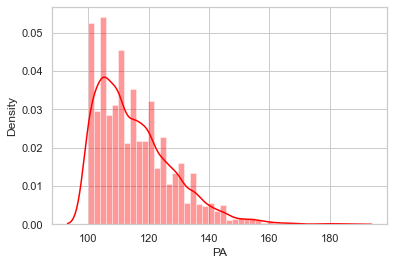

In [646]:
sns.distplot(df_goalkeepers_model.PA, color = 'Red')

<AxesSubplot:title={'center':'Defenders Potential Ability Distribution'}, xlabel='PA', ylabel='Density'>

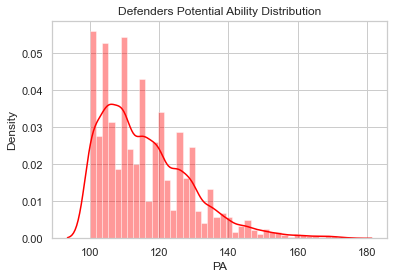

In [647]:
plt.title("Defenders Potential Ability Distribution")
sns.distplot(df_defenders_model.PA, color = 'Red')

<AxesSubplot:title={'center':'Backs Potential Ability Distribution'}, xlabel='PA', ylabel='Density'>

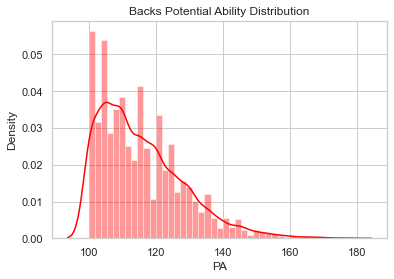

In [648]:
plt.title("Backs Potential Ability Distribution")
sns.distplot(df_backs_model.PA, color = 'Red')

<AxesSubplot:title={'center':'Midfielders Potential Ability Distribution'}, xlabel='PA', ylabel='Density'>

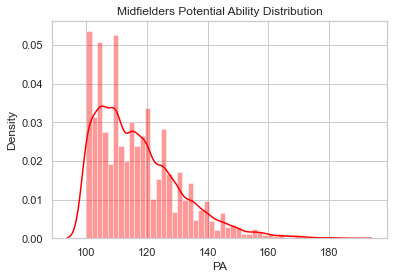

In [649]:
plt.title("Midfielders Potential Ability Distribution")
sns.distplot(df_midfielders_model.PA, color = 'Red')

<AxesSubplot:title={'center':'Forwards Potential Ability Distribution'}, xlabel='PA', ylabel='Density'>

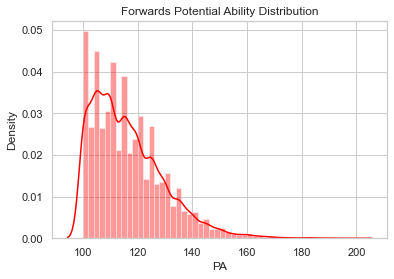

In [650]:
plt.title("Forwards Potential Ability Distribution")
sns.distplot(df_forwards_model.PA, color = 'Red')

In [651]:
df_goalkeepers_model.shape

(4904, 40)

In [652]:
df_defenders_model.shape

(7819, 42)

In [653]:
df_backs_model.shape

(7392, 42)

In [654]:
df_midfielders_model.shape

(13121, 42)

In [655]:
df_forwards_model.shape

(16764, 40)

In [656]:
df_forwards.groupby("Target").mean()

,Height,Weight,Age,PA,Wor,Vis,Tec,Tea,Str,Sta,Pos,Pen,Pas,Pac,OtB,Nat,Lon,Ldr,Jum,Hea,Fre,Fla,Fir,Fin,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Bra,Bal,Ant,Agi,Agg,Acc,Preferred Foot_Left,Preferred Foot_Right
Target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,178.860810,72.480490,24.511157,115.366419,10.697293,9.376539,11.476344,9.586758,8.929094,10.594074,7.170162,8.234484,10.118583,12.372577,11.542434,11.931960,8.890989,7.907755,8.949214,9.285148,8.074686,11.275698,11.423973,10.563041,11.490672,11.158700,10.317827,9.502317,8.053225,8.975430,9.947019,9.081575,9.693818,10.157176,11.865443,9.932874,12.605780,0.260334,0.770943
1,178.809392,73.127072,25.038674,158.881215,12.671271,12.353591,14.317680,11.784530,10.740331,12.425414,7.248619,12.035912,12.627072,13.980663,14.102210,13.055249,11.776243,8.944751,9.693370,9.759669,10.511050,14.428177,13.856354,13.063536,14.063536,13.726519,12.002762,11.508287,9.701657,11.265193,12.720994,11.569061,12.497238,12.740331,13.801105,11.074586,14.237569,0.400552,0.718232


In [657]:
df_forwards_model.isnull().sum()

Height                  0
Weight                  0
Age                     0
PA                      0
Wor                     0
Vis                     0
Tec                     0
Tea                     0
Str                     0
Sta                     0
Pos                     0
Pen                     0
Pas                     0
Pac                     0
OtB                     0
Nat                     0
Lon                     0
Ldr                     0
Jum                     0
Hea                     0
Fre                     0
Fla                     0
Fir                     0
Fin                     0
Dri                     0
Det                     0
Dec                     0
Cro                     0
Cor                     0
Cnt                     0
Cmp                     0
Bra                     0
Bal                     0
Ant                     0
Agi                     0
Agg                     0
Acc                     0
Target                  0
Preferred Fo

In [658]:
df.duplicated().sum()

0

# Model

In [659]:
df_forwards_model.head()

,Height,Weight,Age,PA,Wor,Vis,Tec,Tea,Str,Sta,Pos,Pen,Pas,Pac,OtB,Nat,Lon,Ldr,Jum,Hea,Fre,Fla,Fir,Fin,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Bra,Bal,Ant,Agi,Agg,Acc,Target,Preferred Foot_Left,Preferred Foot_Right
0,184,75,19,107,8,6,13,7,6,7,8,8,8,12,14,10,7,11,7,14,7,12,14,14,14,4,14,5,7,9,9,7,3,7,12,5,11,0,0.0,1.0
1,167,68,26,108,12,10,11,11,10,14,10,7,12,13,12,12,11,3,7,10,10,11,12,8,10,11,10,12,11,11,12,13,10,11,12,12,14,0,0.0,1.0
2,188,68,21,119,13,11,9,9,9,13,13,12,9,11,14,14,10,9,4,10,3,13,12,15,11,10,11,6,7,12,15,9,12,10,11,5,12,0,0.0,1.0
3,184,73,22,105,13,9,12,8,6,9,7,6,10,12,10,16,8,4,6,7,7,11,11,7,13,6,13,12,14,8,11,5,3,8,10,12,13,0,1.0,0.0
4,180,84,28,116,11,11,14,10,8,15,11,5,11,12,15,14,13,12,8,15,10,12,15,11,15,9,11,10,10,11,10,6,11,15,14,14,12,0,0.0,1.0


In [660]:
x = df_forwards_model.drop(["PA", "Target"], axis=1)
y = df_forwards_model["Target"]

In [661]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=3)

## Forwards

### Random Forest

In [662]:
rf= RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [663]:
rf_predicts= rf.predict(x_test)

In [664]:
rf_cm= confusion_matrix(y_test, rf_predicts)
print("\nRandom Forest Confusion Matrix:\n")
print(rf_cm)


Random Forest Confusion Matrix:

[[5415    0]
 [  83   35]]


In [665]:
target_names = ['0', '1']
print(classification_report(y_test, rf_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5415
           1       1.00      0.30      0.46       118

    accuracy                           0.98      5533
   macro avg       0.99      0.65      0.72      5533
weighted avg       0.99      0.98      0.98      5533



In [666]:
cv  = StratifiedKFold(n_splits=5, shuffle=True, random_state=3)

In [667]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(rf, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
rf_f1 = mean(scor)
print("Random Forest doğrulanmış f1 skoru:", rf_f1)

Random Forest doğrulanmış f1 skoru: 0.4495477716950166


In [668]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(rf, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
rf_brier = -1*mean(scor)
print("Random Forest doğrulanmış brier skoru:", rf_brier)

Random Forest doğrulanmış brier skoru: 0.012707416318304342


In [669]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(rf, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = -1*[]
for i in range (len(scores)):
    scor.append(scores[i].mean())
rf_roc_auc = mean(scor)
print("Random Forest doğrulanmış roc-auc skoru:", rf_roc_auc)

Random Forest doğrulanmış roc-auc skoru: 0.649938824890179


In [670]:
rf_class1_probs = rf.predict_proba(x_test)[:, 1]
rf_df_test_class1_probs = rf.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:,1]

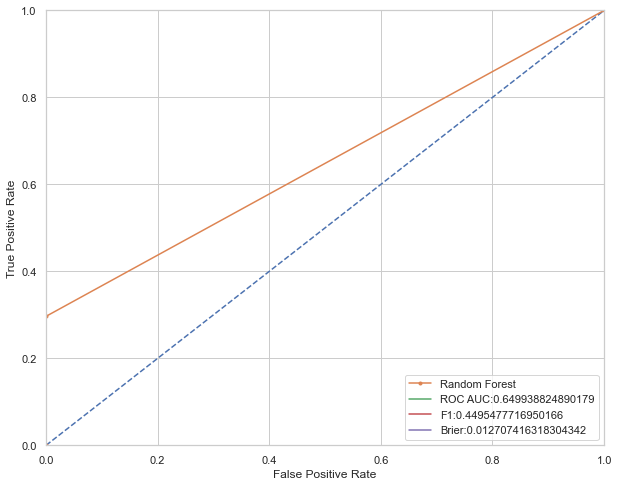

In [671]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, rf_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Random Forest')
plt.plot(0, label = 'ROC AUC:'+str(rf_roc_auc))
plt.plot(0, label = 'F1:'+str(rf_f1))
plt.plot(0, label = 'Brier:'+str(rf_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [672]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    rf_thresh_predicts = rf_class1_probs > threshold
    precision = precision_score(y_test, rf_thresh_predicts)
    recall = recall_score(y_test, rf_thresh_predicts)
    f1 = f1_score(y_test, rf_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.052, Completeness = 0.975 | F1 = 0.099
Threshold = 0.01 | Accuracy = 0.084, Completeness = 0.958 | F1 = 0.154
Threshold = 0.02 | Accuracy = 0.114, Completeness = 0.941 | F1 = 0.203
Threshold = 0.03 | Accuracy = 0.141, Completeness = 0.915 | F1 = 0.244
Threshold = 0.04 | Accuracy = 0.176, Completeness = 0.907 | F1 = 0.294
Threshold = 0.05 | Accuracy = 0.197, Completeness = 0.873 | F1 = 0.322
Threshold = 0.06 | Accuracy = 0.226, Completeness = 0.873 | F1 = 0.359
Threshold = 0.07 | Accuracy = 0.255, Completeness = 0.864 | F1 = 0.394
Threshold = 0.08 | Accuracy = 0.283, Completeness = 0.847 | F1 = 0.425
Threshold = 0.09 | Accuracy = 0.310, Completeness = 0.839 | F1 = 0.453
Threshold = 0.10 | Accuracy = 0.328, Completeness = 0.814 | F1 = 0.467
Threshold = 0.11 | Accuracy = 0.338, Completeness = 0.797 | F1 = 0.475
Threshold = 0.12 | Accuracy = 0.353, Completeness = 0.746 | F1 = 0.480
Threshold = 0.13 | Accuracy = 0.384, Completeness = 0.729 | F1 = 0.503
Thresh

In [673]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    rf_thresh_predicts = rf_class1_probs > threshold
    f1 = f1_score(y_test, rf_thresh_predicts)
    if f1_list.max() == f1:
        rf_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", rf_best_threshold)

Maximum f1 score is: 0.615 and best threshold is: 0.23


In [674]:
def custom_predict_rf(X, threshold):
    
    return (rf_class1_probs > threshold).astype(int)
    
    
rf_thresh_predicts = custom_predict_rf(X = x_test, threshold = rf_best_threshold) 

In [675]:
rf_thresh_cm= confusion_matrix(y_test, rf_thresh_predicts)
print("\nRandom Forest Confusion Matrix:\n")
print(rf_thresh_cm)


Random Forest Confusion Matrix:

[[5371   44]
 [  46   72]]


In [676]:
print(classification_report(y_test, rf_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5415
           1       0.62      0.61      0.62       118

    accuracy                           0.98      5533
   macro avg       0.81      0.80      0.80      5533
weighted avg       0.98      0.98      0.98      5533



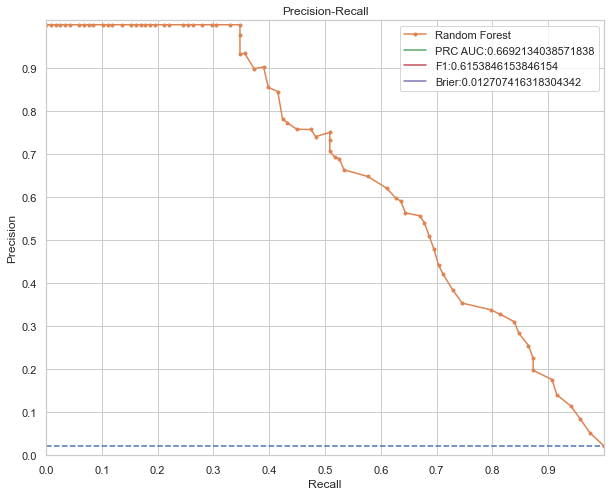

In [677]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, rf_class1_probs)
rf_thresh_f1, rf_prc_auc = f1_score(y_test, rf_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Random Forest')
plt.plot(0,label='PRC AUC:'+str(rf_prc_auc))

plt.plot(0,label='F1:'+str(rf_thresh_f1))
plt.plot(0,label='Brier:'+str(rf_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

**Hyperparameter Tuning**

In [678]:
rf_params = {
              
             "max_depth": [2,5,8,10],
             "min_samples_leaf":[1, 2, 3, 5, 10],
            "max_features": ['sqrt',5, 'auto'],
            "n_estimators": [200,500,750],
            "min_samples_split": [2,5,10]}

In [679]:
rf_tuned = RandomizedSearchCV(rf, 
                           rf_params, 
                           cv = cv,
                           n_iter=100,
                           scoring = 'f1',
                           n_jobs = -1, 
                           verbose = 2) 

In [680]:

rf_tuned.fit(x_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
--- 187.7934365272522 seconds ---


In [681]:
print("En iyi parametreler: " + str(rf_tuned.best_params_))

En iyi parametreler: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10}


In [682]:
rf_tuned= RandomForestClassifier(
                                 max_depth=rf_tuned.best_params_["max_depth"],
                                max_features=rf_tuned.best_params_["max_features"],
                                min_samples_leaf=rf_tuned.best_params_["min_samples_leaf"],
                                min_samples_split=rf_tuned.best_params_["min_samples_split"],
                                
                                n_estimators=rf_tuned.best_params_["n_estimators"])

In [683]:
rf_tuned.fit(x_train, y_train)

rf_tuned_predicts= rf_tuned.predict(x_test)

rf_tuned_class1_probs =rf_tuned.predict_proba(x_test)[:, 1]

rf_tuned_df_test_class1_probs = rf_tuned.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:,1]

In [684]:
rf_tuned_cm= confusion_matrix(y_test, rf_tuned_predicts)
print("\nRandom Forest Confusion Matrix:\n")
print(rf_tuned_cm)


Random Forest Confusion Matrix:

[[5415    0]
 [  87   31]]


In [685]:
print(classification_report(y_test, rf_tuned_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5415
           1       1.00      0.26      0.42       118

    accuracy                           0.98      5533
   macro avg       0.99      0.63      0.70      5533
weighted avg       0.98      0.98      0.98      5533



In [686]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(rf_tuned, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
rf_tuned_f1 = mean(scor)
print("Random Forest doğrulanmış f1 skoru:", rf_tuned_f1)

Random Forest doğrulanmış f1 skoru: 0.4208549935130526


In [687]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(rf_tuned, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
rf_tuned_brier = -1*mean(scor)
print("Random Forest doğrulanmış brier skoru:", rf_tuned_brier)

Random Forest doğrulanmış brier skoru: 0.012974583198077044


In [688]:
scores = []
for i in range(1,2):
    scores.append(cross_val_score(rf_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
rf_tuned_roc_auc = mean(scor)
print("Random Forest doğrulanmış roc-auc skoru:", rf_tuned_roc_auc)

Random Forest doğrulanmış roc-auc skoru: 0.6423970097232192


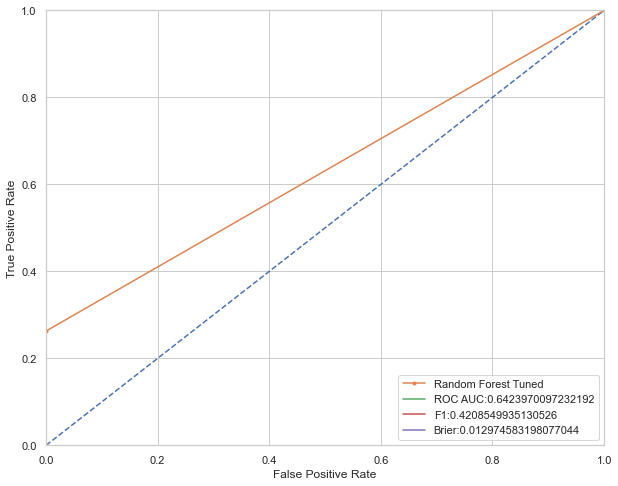

In [689]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, rf_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Random Forest Tuned')
plt.plot(0, label = 'ROC AUC:'+str(rf_tuned_roc_auc))


plt.plot(0, label = 'F1:'+str(rf_tuned_f1))
plt.plot(0, label = 'Brier:'+str(rf_tuned_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [690]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    rf_tuned_thresh_predicts = rf_tuned_class1_probs > threshold
    precision = precision_score(y_test, rf_tuned_thresh_predicts)
    recall = recall_score(y_test, rf_tuned_thresh_predicts)
    f1 = f1_score(y_test, rf_tuned_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.01 | Accuracy = 0.076, Completeness = 0.966 | F1 = 0.141
Threshold = 0.02 | Accuracy = 0.124, Completeness = 0.949 | F1 = 0.220
Threshold = 0.03 | Accuracy = 0.164, Completeness = 0.907 | F1 = 0.278
Threshold = 0.04 | Accuracy = 0.196, Completeness = 0.881 | F1 = 0.321
Threshold = 0.05 | Accuracy = 0.230, Completeness = 0.856 | F1 = 0.363
Threshold = 0.06 | Accuracy = 0.253, Completeness = 0.814 | F1 = 0.386
Threshold = 0.07 | Accuracy = 0.283, Completeness = 0.814 | F1 = 0.420
Threshold = 0.08 | Accuracy = 0.300, Completeness = 0.771 | F1 = 0.432
Threshold = 0.09 | Accuracy = 0.337, Completeness = 0.771 | F1 = 0.469
Threshold = 0.10 | Accuracy = 0.367, Completeness = 0.763 | F1 = 0.496
Threshold = 0.11 | Accuracy = 0.389, Completeness = 0.729 | F1 = 0.507
Threshold = 0.12 | Accuracy = 0.420, Completeness = 0.712 | F1 = 0.528
Threshold = 0.13 | Accuracy = 0.443, Completeness = 0.695 | F1 = 0.541
Thresh

In [691]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    rf_tuned_thresh_predicts = rf_tuned_class1_probs > threshold
    f1 = f1_score(y_test, rf_tuned_thresh_predicts)
    if f1_list.max() == f1:
        rf_tuned_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", rf_tuned_best_threshold)

Maximum f1 score is: 0.633 and best threshold is: 0.22


In [692]:
def custom_predict_rf_tuned(X, threshold):
    
    return (rf_tuned_class1_probs > threshold).astype(int)
    
    
rf_tuned_thresh_predicts = custom_predict_rf_tuned(X = x_test, threshold = rf_tuned_best_threshold) 

In [693]:
rf_tuned_thresh_cm= confusion_matrix(y_test, rf_tuned_thresh_predicts)
print("\nRandom Forest Confusion Matrix:\n")
print(rf_tuned_thresh_cm)


Random Forest Confusion Matrix:

[[5382   33]
 [  48   70]]


In [694]:
print(classification_report(y_test, rf_tuned_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5415
           1       0.68      0.59      0.63       118

    accuracy                           0.99      5533
   macro avg       0.84      0.79      0.81      5533
weighted avg       0.98      0.99      0.98      5533



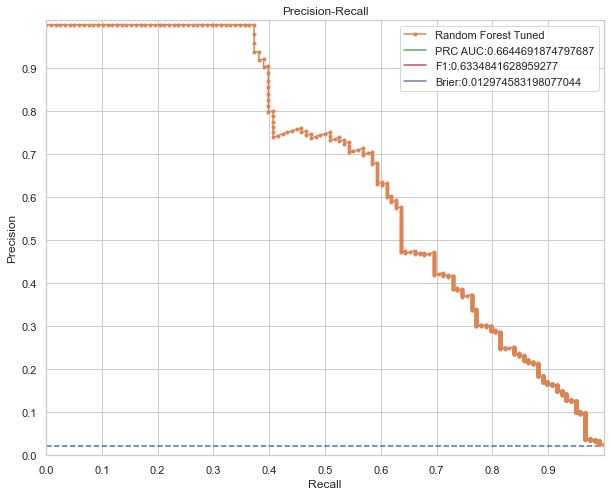

In [695]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, rf_tuned_class1_probs)
rf_tuned_thresh_f1, rf_tuned_prc_auc = f1_score(y_test, rf_tuned_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Random Forest Tuned')
plt.plot(0,label='PRC AUC:'+str(rf_tuned_prc_auc))

plt.plot(0,label='F1:'+str(rf_tuned_thresh_f1))
plt.plot(0,label='Brier:'+str(rf_tuned_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

In [696]:
rf_df_test_f1 = f1_score(df_forwards_model_test.Target, rf.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(rf_df_test_f1)

def custom_predict_rf_df_test(X, threshold):
    
    return (rf_df_test_class1_probs > threshold).astype(int)
    
rf_df_test_thresh_f1 = f1_score(df_forwards_model_test.Target, custom_predict_rf_df_test(X = df_forwards_model_test.drop(columns=["PA","Target"]), 
                                                                  threshold = rf_best_threshold))

print(rf_df_test_thresh_f1)

rf_tuned_df_test_f1 = f1_score(df_forwards_model_test.Target, rf_tuned.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(rf_tuned_df_test_f1)

def custom_predict_rf_tuned_df_test(X, threshold):
    
    return (rf_tuned_df_test_class1_probs > threshold).astype(int)
    
rf_tuned_thresh_df_test_f1=f1_score(df_forwards_model_test.Target, custom_predict_rf_tuned_df_test(X = df_forwards_model_test.drop(columns=["PA",
                                                                                                        "Target"]), threshold = rf_tuned_best_threshold))

print(rf_tuned_thresh_df_test_f1)

0.38461538461538464
0.609442060085837
0.3790849673202615
0.5964912280701755


### Bagging

In [697]:
bag = BaggingClassifier().fit(x_train, y_train)

In [698]:
bag_predicts= bag.predict(x_test)

In [699]:
bag_cm= confusion_matrix(y_test, bag_predicts)
print("\nBagging Classifier Confusion Matrix:\n")
print(bag_cm)


Bagging Classifier Confusion Matrix:

[[5413    2]
 [  81   37]]


In [700]:
print(classification_report(y_test, bag_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.95      0.31      0.47       118

    accuracy                           0.98      5533
   macro avg       0.97      0.66      0.73      5533
weighted avg       0.98      0.98      0.98      5533



In [701]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(bag, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
bag_f1 = mean(scor)
print("Bagging doğrulanmış f1 skoru:", bag_f1)

Bagging doğrulanmış f1 skoru: 0.4570951105508996


In [702]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(bag, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
bag_brier = -1*mean(scor)
print("Bagging doğrulanmış brier skoru:", bag_brier)

Bagging doğrulanmış brier skoru: 0.014429992074208472


In [703]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(bag, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
bag_roc_auc = mean(scor)
print("Bagging doğrulanmış roc-auc skoru:", bag_roc_auc)

Bagging doğrulanmış roc-auc skoru: 0.6567947620157919


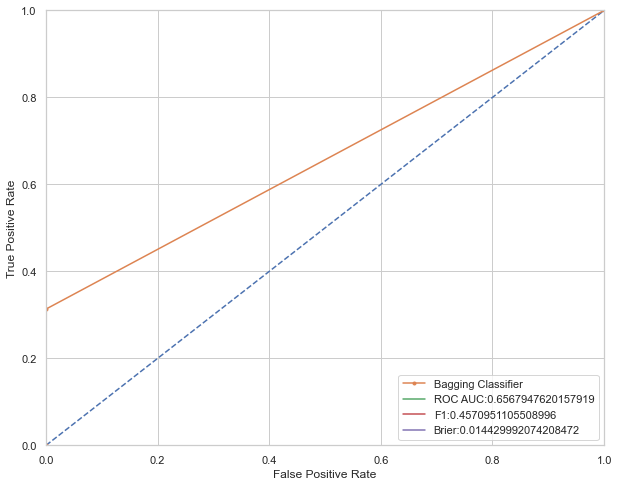

In [704]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, bag_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Bagging Classifier')
plt.plot(0, label = 'ROC AUC:'+str(bag_roc_auc))

plt.plot(0, label = 'F1:'+str(bag_f1))
plt.plot(0, label = 'Brier:'+str(bag_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [705]:
bag_class1_probs = bag.predict_proba(x_test)[:, 1]

f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    bag_thresh_predicts = bag_class1_probs > threshold
    precision = precision_score(y_test, bag_thresh_predicts)
    recall = recall_score(y_test, bag_thresh_predicts)
    f1 = f1_score(y_test, bag_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.151, Completeness = 0.805 | F1 = 0.254
Threshold = 0.01 | Accuracy = 0.151, Completeness = 0.805 | F1 = 0.254
Threshold = 0.02 | Accuracy = 0.151, Completeness = 0.805 | F1 = 0.254
Threshold = 0.03 | Accuracy = 0.151, Completeness = 0.805 | F1 = 0.254
Threshold = 0.04 | Accuracy = 0.151, Completeness = 0.805 | F1 = 0.254
Threshold = 0.05 | Accuracy = 0.151, Completeness = 0.805 | F1 = 0.254
Threshold = 0.06 | Accuracy = 0.151, Completeness = 0.805 | F1 = 0.254
Threshold = 0.07 | Accuracy = 0.151, Completeness = 0.805 | F1 = 0.254
Threshold = 0.08 | Accuracy = 0.151, Completeness = 0.805 | F1 = 0.254
Threshold = 0.09 | Accuracy = 0.151, Completeness = 0.805 | F1 = 0.254
Threshold = 0.10 | Accuracy = 0.298, Completeness = 0.695 | F1 = 0.417
Threshold = 0.11 | Accuracy = 0.298, Completeness = 0.695 | F1 = 0.417
Threshold = 0.12 | Accuracy = 0.298, Completeness = 0.695 | F1 = 0.417
Threshold = 0.13 | Accuracy = 0.298, Completeness = 0.695 | F1 = 0.417
Thresh

In [706]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    bag_thresh_predicts = bag_class1_probs > threshold
    f1 = f1_score(y_test, bag_thresh_predicts)
    if f1_list.max() == f1:
        bag_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", bag_best_threshold)

Maximum f1 score is: 0.569 and best threshold is: 0.39


In [707]:
def custom_predict_bag(X, threshold):
     
    return (bag_class1_probs > threshold).astype(int)
    
    
bag_thresh_predicts = custom_predict_bag(X = x_test, threshold = bag_best_threshold) 

In [708]:
bag_thresh_cm= confusion_matrix(y_test, bag_thresh_predicts)
print("\nBagging Classifier Confusion Matrix:\n")
print(bag_thresh_cm)


Bagging Classifier Confusion Matrix:

[[5392   23]
 [  62   56]]


In [709]:
print(classification_report(y_test, bag_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.71      0.47      0.57       118

    accuracy                           0.98      5533
   macro avg       0.85      0.74      0.78      5533
weighted avg       0.98      0.98      0.98      5533



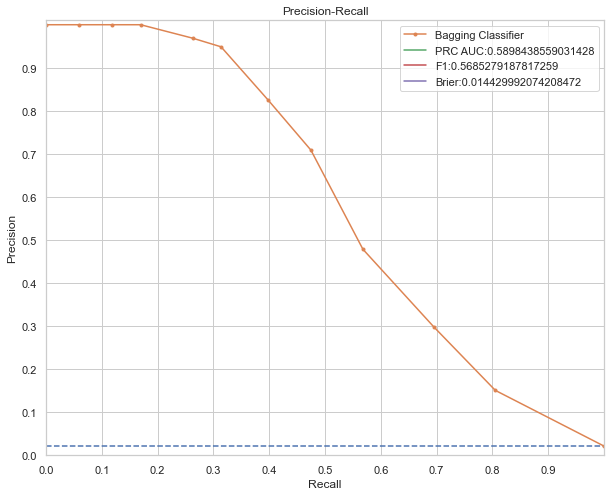

In [710]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, bag_class1_probs)
bag_thresh_f1, bag_prc_auc = f1_score(y_test, bag_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Bagging Classifier')
plt.plot(0,label='PRC AUC:'+str(bag_prc_auc))

plt.plot(0,label='F1:'+str(bag_thresh_f1))
plt.plot(0,label='Brier:'+str(bag_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

***Hyperparameter Tuning***

In [711]:
bag_params = {
              "max_samples":[1,2,3,5],
              
            "max_features": [2,5,8, 10],
            "n_estimators": [5,10,100,250,]
            }

In [712]:
bag_tuned = GridSearchCV(bag, 
                           bag_params, 
                           cv = cv,
                         scoring='f1',
                           n_jobs = -1, 
                           verbose = 2) 

In [713]:

bag_tuned.fit(x_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
--- 394.91524171829224 seconds ---


In [714]:
print("En iyi parametreler: " + str(bag_tuned.best_params_))

En iyi parametreler: {'max_features': 2, 'max_samples': 1, 'n_estimators': 5}


In [715]:
bag_tuned= BaggingClassifier(max_samples=bag_tuned.best_params_["max_samples"],
                                max_features=bag_tuned.best_params_["max_features"],
                                n_estimators=bag_tuned.best_params_["n_estimators"])
bag_tuned.fit(x_train, y_train)

BaggingClassifier(max_features=2, max_samples=1, n_estimators=5)

In [716]:
bag_tuned_predicts= bag_tuned.predict(x_test)

In [717]:
bag_tuned_cm= confusion_matrix(y_test, bag_tuned_predicts)
print("\nBagging Classifier Confusion Matrix:\n")
print(bag_tuned_cm)


Bagging Classifier Confusion Matrix:

[[5415    0]
 [ 118    0]]


In [718]:
print(classification_report(y_test, bag_tuned_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5415
           1       0.00      0.00      0.00       118

    accuracy                           0.98      5533
   macro avg       0.49      0.50      0.49      5533
weighted avg       0.96      0.98      0.97      5533



In [719]:
bag_tuned_class1_probs =bag_tuned.predict_proba(x_test)[:, 1]

In [720]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(bag_tuned, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
bag_tuned_f1 = mean(scor)
print("Bagging doğrulanmış f1 skoru:", bag_tuned_f1)

Bagging doğrulanmış f1 skoru: 0.0


In [721]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(bag_tuned, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
bag_tuned_brier = -1*mean(scor)
print("Bagging doğrulanmış brier skoru:", bag_tuned_brier)

Bagging doğrulanmış brier skoru: 0.024723022947426412


In [722]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(bag_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
bag_tuned_roc_auc = mean(scor)
print("Bagging doğrulanmış roc-auc skoru:", bag_tuned_roc_auc)

Bagging doğrulanmış roc-auc skoru: 0.5


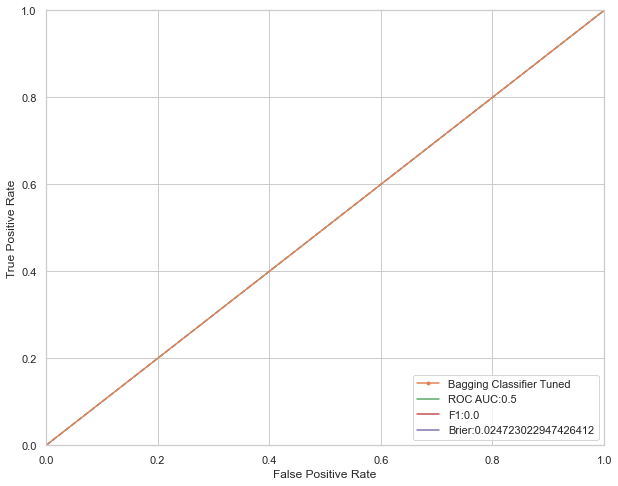

In [723]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, bag_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Bagging Classifier Tuned')
plt.plot(0, label = 'ROC AUC:'+str(bag_tuned_roc_auc))

plt.plot(0, label = 'F1:'+str(bag_tuned_f1))
plt.plot(0, label = 'Brier:'+str(bag_tuned_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [724]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    bag_tuned_thresh_predicts = bag_tuned_class1_probs > threshold
    precision = precision_score(y_test, bag_tuned_thresh_predicts)
    recall = recall_score(y_test, bag_tuned_thresh_predicts)
    f1 = f1_score(y_test, bag_tuned_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.01 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.02 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.03 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.04 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.05 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.06 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.07 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.08 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.09 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.10 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.11 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.12 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Threshold = 0.13 | Accuracy = 0.000, Completeness = 0.000 | F1 = 0.000
Thresh

In [725]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    bag_tuned_thresh_predicts = bag_tuned_class1_probs > threshold
    f1 = f1_score(y_test, bag_tuned_thresh_predicts)
    if f1_list.max() == f1:
        bag_tuned_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", bag_tuned_best_threshold)

Maximum f1 score is: 0.000 and best threshold is: 0.9400000000000001


In [726]:
def custom_predict_bag_tuned(X, threshold):

    return (bag_tuned_class1_probs > threshold).astype(int)
    
    
bag_tuned_thresh_predicts = custom_predict_bag_tuned(X = x_test, threshold = bag_tuned_best_threshold) 

In [727]:
bag_tuned_thresh_cm= confusion_matrix(y_test, bag_tuned_thresh_predicts)
print("\nBagging Classifier Confusion Matrix:\n")
print(bag_tuned_thresh_cm)


Bagging Classifier Confusion Matrix:

[[5415    0]
 [ 118    0]]


In [728]:
print(classification_report(y_test, bag_tuned_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5415
           1       0.00      0.00      0.00       118

    accuracy                           0.98      5533
   macro avg       0.49      0.50      0.49      5533
weighted avg       0.96      0.98      0.97      5533



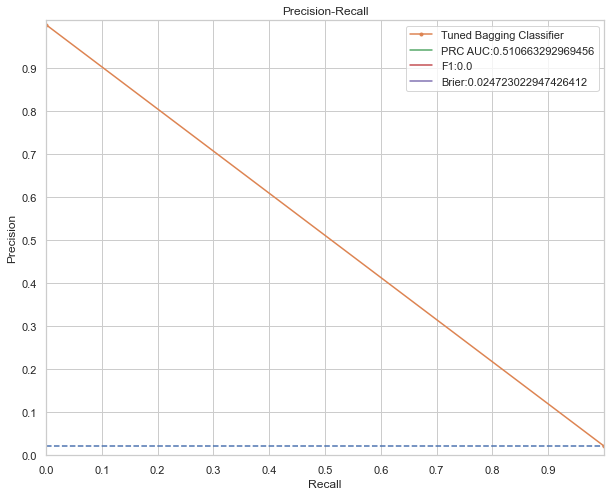

In [729]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, bag_tuned_class1_probs)
bag_tuned_thresh_f1, bag_tuned_prc_auc = f1_score(y_test, bag_tuned_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Tuned Bagging Classifier')
plt.plot(0,label='PRC AUC:'+str(bag_tuned_prc_auc))

plt.plot(0,label='F1:'+str(bag_tuned_thresh_f1))
plt.plot(0, label = 'Brier:'+str(bag_tuned_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

In [730]:
bag_tuned_df_test_class1_probs = bag_tuned.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]
bag_df_test_class1_probs = bag.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]

bag_df_test_f1 = f1_score(df_forwards_model_test.Target, bag.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(bag_df_test_f1)

def custom_predict_bag_df_test(X, threshold):
    
    return (bag_df_test_class1_probs > threshold).astype(int)
    
bag_df_test_thresh_f1 = f1_score(df_forwards_model_test.Target, custom_predict_bag_df_test(X = df_forwards_model_test.drop(columns=["PA","Target"]), 
                                                                  threshold = bag_best_threshold))

print(bag_df_test_thresh_f1)

bag_tuned_df_test_f1 = f1_score(df_forwards_model_test.Target, bag_tuned.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(bag_tuned_df_test_f1)

def custom_predict_bag_tuned_df_test(X, threshold):
    
    return (bag_tuned_df_test_class1_probs > threshold).astype(int)
    
bag_tuned_thresh_df_test_f1=f1_score(df_forwards_model_test.Target, custom_predict_bag_tuned_df_test(X = df_forwards_model_test.drop(columns=["PA",
                                                                                                        "Target"]), threshold = bag_tuned_best_threshold))

print(bag_tuned_thresh_df_test_f1)

0.42424242424242425
0.5560538116591928
0.0
0.0


### Gradient Boosting

In [731]:
gbc= GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [732]:
gbc_predicts= gbc.predict(x_test)
gbc_cm= confusion_matrix(y_test, gbc_predicts)
print("\nGradient Boosting Confusion Matrix:\n")
print(gbc_cm)


Gradient Boosting Confusion Matrix:

[[5398   17]
 [  61   57]]


In [733]:
print(classification_report(y_test, gbc_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.77      0.48      0.59       118

    accuracy                           0.99      5533
   macro avg       0.88      0.74      0.79      5533
weighted avg       0.98      0.99      0.98      5533



In [734]:
gbc_class1_probs = gbc.predict_proba(x_test)[:,1]

In [735]:
gbc_f1 = cross_val_score(gbc, x, y, cv=cv, scoring='f1').mean()
print("Gradient Boosting doğrulanmış f1 skoru:", gbc_f1)

Gradient Boosting doğrulanmış f1 skoru: 0.5290902265393297


In [736]:
gbc_brier = -1*cross_val_score(gbc, x, y, cv=cv, scoring='neg_brier_score').mean()
print("Gradient Boosting doğrulanmış brier skoru:", gbc_brier)

Gradient Boosting doğrulanmış brier skoru: 0.012757191757675007


In [737]:
gbc_roc_auc = cross_val_score(gbc, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)).mean()
print("Gradient Boosting doğrulanmış roc-auc skoru:", gbc_roc_auc)

Gradient Boosting doğrulanmış roc-auc skoru: 0.7097462414897746


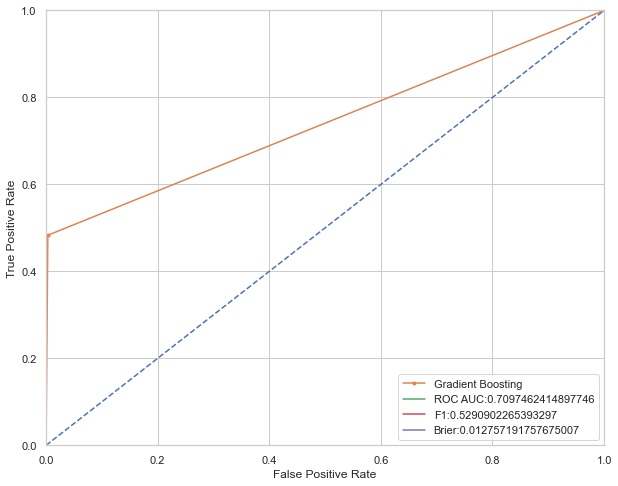

In [738]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, gbc_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Gradient Boosting')
plt.plot(0, label = 'ROC AUC:'+str(gbc_roc_auc))

plt.plot(0, label = 'F1:'+str(gbc_f1))
plt.plot(0, label = 'Brier:'+str(gbc_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [739]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    gbc_thresh_predicts = gbc_class1_probs > threshold
    precision = precision_score(y_test, gbc_thresh_predicts)
    recall = recall_score(y_test, gbc_thresh_predicts)
    f1 = f1_score(y_test, gbc_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.01 | Accuracy = 0.134, Completeness = 0.907 | F1 = 0.233
Threshold = 0.02 | Accuracy = 0.222, Completeness = 0.873 | F1 = 0.353
Threshold = 0.03 | Accuracy = 0.270, Completeness = 0.814 | F1 = 0.406
Threshold = 0.04 | Accuracy = 0.326, Completeness = 0.805 | F1 = 0.465
Threshold = 0.05 | Accuracy = 0.365, Completeness = 0.771 | F1 = 0.496
Threshold = 0.06 | Accuracy = 0.401, Completeness = 0.754 | F1 = 0.524
Threshold = 0.07 | Accuracy = 0.437, Completeness = 0.737 | F1 = 0.549
Threshold = 0.08 | Accuracy = 0.452, Completeness = 0.720 | F1 = 0.556
Threshold = 0.09 | Accuracy = 0.475, Completeness = 0.720 | F1 = 0.572
Threshold = 0.10 | Accuracy = 0.506, Completeness = 0.712 | F1 = 0.592
Threshold = 0.11 | Accuracy = 0.512, Completeness = 0.703 | F1 = 0.593
Threshold = 0.12 | Accuracy = 0.532, Completeness = 0.703 | F1 = 0.606
Threshold = 0.13 | Accuracy = 0.550, Completeness = 0.695 | F1 = 0.614
Thresh

In [740]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    gbc_thresh_predicts = gbc_class1_probs > threshold
    f1 = f1_score(y_test, gbc_thresh_predicts)
    if f1_list.max() == f1:
        gbc_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", gbc_best_threshold)

Maximum f1 score is: 0.637 and best threshold is: 0.15


In [741]:
def custom_predict_gbc(X, threshold):
    
    return (gbc_class1_probs > threshold).astype(int)
    
    
gbc_thresh_predicts = custom_predict_gbc(X = x_test, threshold = gbc_best_threshold) 

gbc_thresh_cm= confusion_matrix(y_test, gbc_thresh_predicts)
print("\nGradient Boosting Confusion Matrix:\n")
print(gbc_thresh_cm)


Gradient Boosting Confusion Matrix:

[[5362   53]
 [  38   80]]


In [742]:
print(classification_report(y_test, gbc_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5415
           1       0.60      0.68      0.64       118

    accuracy                           0.98      5533
   macro avg       0.80      0.83      0.81      5533
weighted avg       0.98      0.98      0.98      5533



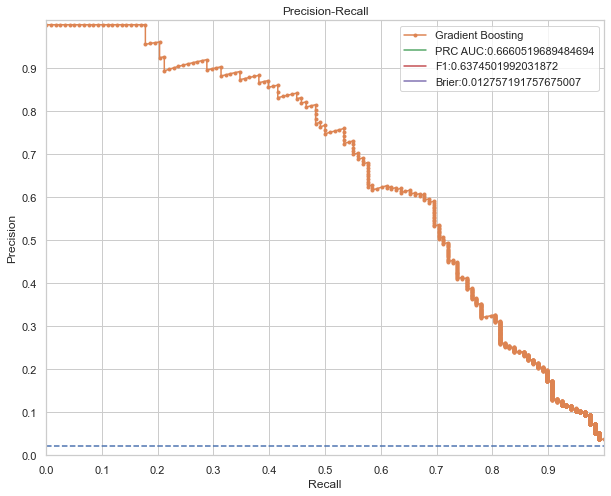

In [743]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, gbc_class1_probs)
gbc_thresh_f1, gbc_prc_auc = f1_score(y_test, gbc_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Gradient Boosting')
plt.plot(0,label='PRC AUC:'+str(gbc_prc_auc))

plt.plot(0,label='F1:'+str(gbc_thresh_f1))
plt.plot(0,label='Brier:'+str(gbc_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

***Hyperparameter Tuning***

In [744]:

gbc_params = {"learning_rate" : [0.001, 0.01, 0.1],
             "n_estimators": [100,500,1000],
             
             "max_depth": [3,5,10],
             }

gbc_tuned = GridSearchCV(gbc, 
                           gbc_params, 
                           cv = cv,
                             
                           n_jobs = -1, 
                           verbose = 2,
                              scoring='f1') 

gbc_tuned.fit(x_train, y_train)

print("En iyi parametreler: " + str(gbc_tuned.best_params_))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}


In [745]:
gbc_tuned= GradientBoostingClassifier(learning_rate=gbc_tuned.best_params_["learning_rate"],
                                
                                
                                n_estimators=gbc_tuned.best_params_["n_estimators"],
                                
                                
                                
                                max_depth=gbc_tuned.best_params_["max_depth"],
                                )
gbc_tuned.fit(x_train, y_train)

gbc_tuned_predicts= gbc_tuned.predict(x_test)

gbc_tuned_class1_probs =gbc_tuned.predict_proba(x_test)[:, 1]

In [746]:
gbc_tuned_cm= confusion_matrix(y_test, gbc_tuned_predicts)
print("\nGradient Boosting Confusion Matrix:\n")
print(gbc_tuned_cm)


Gradient Boosting Confusion Matrix:

[[5406    9]
 [  59   59]]


In [747]:
print(classification_report(y_test, gbc_tuned_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.87      0.50      0.63       118

    accuracy                           0.99      5533
   macro avg       0.93      0.75      0.81      5533
weighted avg       0.99      0.99      0.99      5533



In [748]:
gbc_tuned_f1 = cross_val_score(gbc_tuned, x, y, cv=cv, scoring='f1').mean()
print("Gradient Boosting doğrulanmış f1 skoru:", gbc_tuned_f1)

Gradient Boosting doğrulanmış f1 skoru: 0.5879914497498276


In [749]:
gbc_tuned_brier = -1*cross_val_score(gbc_tuned, x, y, cv=cv, scoring='neg_brier_score').mean()
print("Gradient Boosting doğrulanmış brier skoru:", gbc_tuned_brier)

Gradient Boosting doğrulanmış brier skoru: 0.013100073045501504


In [750]:
gbc_tuned_roc_auc = cross_val_score(gbc_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)).mean()
print("Gradient Boosting doğrulanmış roc-auc skoru:", gbc_tuned_roc_auc)

Gradient Boosting doğrulanmış roc-auc skoru: 0.7401192692161919


In [751]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 1229.4622044563293 seconds ---


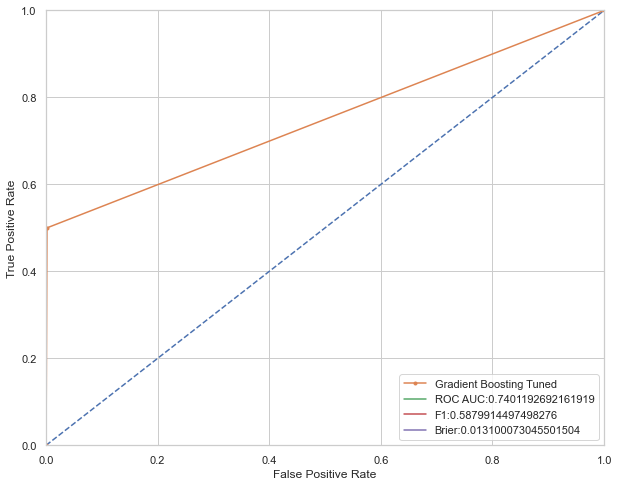

In [752]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, gbc_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Gradient Boosting Tuned')
plt.plot(0, label = 'ROC AUC:'+str(gbc_tuned_roc_auc))

plt.plot(0, label = 'F1:'+str(gbc_tuned_f1))
plt.plot(0, label = 'Brier:'+str(gbc_tuned_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [753]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    gbc_tuned_thresh_predicts = gbc_tuned_class1_probs > threshold
    precision = precision_score(y_test, gbc_tuned_thresh_predicts)
    recall = recall_score(y_test, gbc_tuned_thresh_predicts)
    f1 = f1_score(y_test, gbc_tuned_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.01 | Accuracy = 0.344, Completeness = 0.805 | F1 = 0.482
Threshold = 0.02 | Accuracy = 0.419, Completeness = 0.771 | F1 = 0.543
Threshold = 0.03 | Accuracy = 0.476, Completeness = 0.754 | F1 = 0.584
Threshold = 0.04 | Accuracy = 0.515, Completeness = 0.720 | F1 = 0.601
Threshold = 0.05 | Accuracy = 0.553, Completeness = 0.703 | F1 = 0.619
Threshold = 0.06 | Accuracy = 0.568, Completeness = 0.703 | F1 = 0.629
Threshold = 0.07 | Accuracy = 0.599, Completeness = 0.695 | F1 = 0.643
Threshold = 0.08 | Accuracy = 0.612, Completeness = 0.669 | F1 = 0.640
Threshold = 0.09 | Accuracy = 0.629, Completeness = 0.661 | F1 = 0.645
Threshold = 0.10 | Accuracy = 0.645, Completeness = 0.661 | F1 = 0.653
Threshold = 0.11 | Accuracy = 0.670, Completeness = 0.653 | F1 = 0.661
Threshold = 0.12 | Accuracy = 0.681, Completeness = 0.653 | F1 = 0.667
Threshold = 0.13 | Accuracy = 0.681, Completeness = 0.653 | F1 = 0.667
Thresh

In [754]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    gbc_tuned_thresh_predicts = gbc_tuned_class1_probs > threshold
    f1 = f1_score(y_test, gbc_tuned_thresh_predicts)
    if f1_list.max() == f1:
        gbc_tuned_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", gbc_tuned_best_threshold)

Maximum f1 score is: 0.676 and best threshold is: 0.21


In [755]:
def custom_predict_gbc_tuned(X, threshold):
    
    return (gbc_tuned_class1_probs > threshold).astype(int)
    
    
gbc_tuned_thresh_predicts = custom_predict_gbc_tuned(X = x_test, threshold = gbc_tuned_best_threshold) 

In [756]:
gbc_tuned_thresh_cm= confusion_matrix(y_test, gbc_tuned_thresh_predicts)
print("\nGradient Boosting Confusion Matrix:\n")
print(gbc_tuned_thresh_cm)


Gradient Boosting Confusion Matrix:

[[5388   27]
 [  44   74]]


In [757]:
print(classification_report(y_test, gbc_tuned_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.73      0.63      0.68       118

    accuracy                           0.99      5533
   macro avg       0.86      0.81      0.83      5533
weighted avg       0.99      0.99      0.99      5533



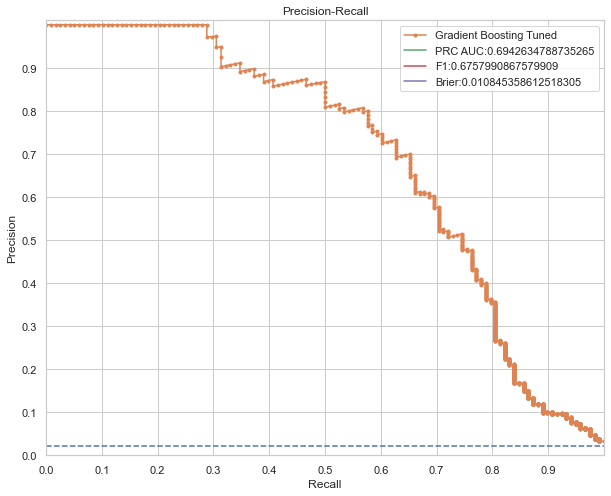

In [758]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, gbc_tuned_class1_probs)
gbc_tuned_thresh_f1, gbc_tuned_prc_auc = f1_score(y_test, gbc_tuned_thresh_predicts), auc(recall, precision)

gbc_tuned_brier = brier_score_loss(y_test, gbc_tuned_class1_probs)
sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Gradient Boosting Tuned')
plt.plot(0,label='PRC AUC:'+str(gbc_tuned_prc_auc))

plt.plot(0,label='F1:'+str(gbc_tuned_thresh_f1))
plt.plot(0,label='Brier:'+str(gbc_tuned_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

In [759]:
gbc_tuned_df_test_class1_probs = gbc_tuned.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]
gbc_df_test_class1_probs = gbc.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]

gbc_df_test_f1 = f1_score(df_forwards_model_test.Target, gbc.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(gbc_df_test_f1)

def custom_predict_gbc_df_test(X, threshold):
    
    return (gbc_df_test_class1_probs > threshold).astype(int)
    
gbc_df_test_thresh_f1 = f1_score(df_forwards_model_test.Target, custom_predict_gbc_df_test(X = df_forwards_model_test.drop(columns=["PA","Target"]), 
                                                                  threshold = gbc_best_threshold))

print(gbc_df_test_thresh_f1)

gbc_tuned_df_test_f1 = f1_score(df_forwards_model_test.Target, gbc_tuned.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(gbc_tuned_df_test_f1)

def custom_predict_gbc_tuned_df_test(X, threshold):
    
    return (gbc_tuned_df_test_class1_probs > threshold).astype(int)
    
gbc_tuned_thresh_df_test_f1=f1_score(df_forwards_model_test.Target, custom_predict_gbc_tuned_df_test(X = df_forwards_model_test.drop(columns=["PA",
                                                                                                        "Target"]), threshold = gbc_tuned_best_threshold))

print(gbc_tuned_thresh_df_test_f1)

0.4835164835164835
0.5816733067729084
0.58
0.5903083700440528


### Ada Boost

In [760]:
ada= AdaBoostClassifier()
ada.fit(x_train, y_train)

ada_predicts= ada.predict(x_test)
ada_cm= confusion_matrix(y_test, ada_predicts)
print("\nAda Boost Confusion Matrix:\n")
print(ada_cm)


Ada Boost Confusion Matrix:

[[5395   20]
 [  59   59]]


In [761]:
print(classification_report(y_test, ada_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.75      0.50      0.60       118

    accuracy                           0.99      5533
   macro avg       0.87      0.75      0.80      5533
weighted avg       0.98      0.99      0.98      5533



In [762]:

ada_f1 = cross_val_score(ada, x, y, cv=cv, scoring='f1').mean()
print("Ada Boost doğrulanmış f1 skoru:", ada_f1)

Ada Boost doğrulanmış f1 skoru: 0.5250880452320318


In [763]:
ada_brier = -1*cross_val_score(ada, x, y, cv=cv, scoring='neg_brier_score').mean()
print("Ada Boost doğrulanmış brier skoru:", ada_brier)

Ada Boost doğrulanmış brier skoru: 0.20704294614243773


In [764]:
ada_roc_auc = cross_val_score(ada, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)).mean()
print("Ada Boost doğrulanmış roc-auc skoru:", ada_roc_auc)
print("--- %s seconds ---" % (time.time() - start_time))

Ada Boost doğrulanmış roc-auc skoru: 0.7211224806842411
--- 1243.4331471920013 seconds ---


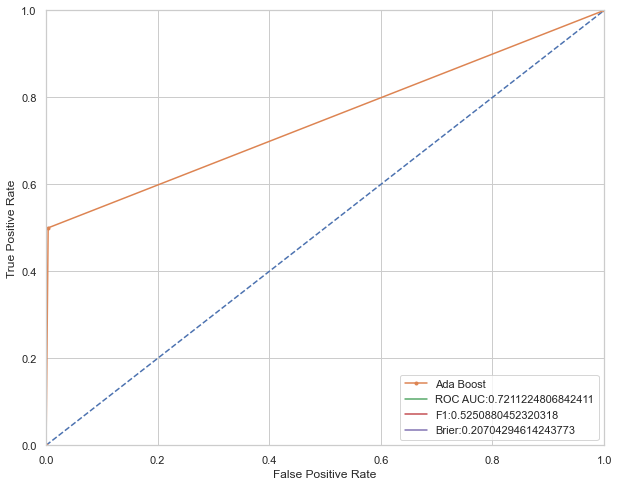

In [765]:
ada_class1_probs = ada.predict_proba(x_test)[:,1]

n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, ada_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Ada Boost')
plt.plot(0, label = 'ROC AUC:'+str(ada_roc_auc))

plt.plot(0, label = 'F1:'+str(ada_f1))
plt.plot(0, label = 'Brier:'+str(ada_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [766]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    ada_thresh_predicts = ada_class1_probs > threshold
    precision = precision_score(y_test, ada_thresh_predicts)
    recall = recall_score(y_test, ada_thresh_predicts)
    f1 = f1_score(y_test, ada_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.01 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.02 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.03 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.04 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.05 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.06 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.07 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.08 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.09 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.10 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.11 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.12 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.13 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Thresh

In [767]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    ada_thresh_predicts = ada_class1_probs > threshold
    f1 = f1_score(y_test, ada_thresh_predicts)
    if f1_list.max() == f1:
        ada_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", ada_best_threshold)

Maximum f1 score is: 0.599 and best threshold is: 0.5


In [768]:
def custom_predict_ada(X, threshold):
    
    return (ada_class1_probs > threshold).astype(int)
    
    
ada_thresh_predicts = custom_predict_ada(X = x_test, threshold = ada_best_threshold) 

ada_thresh_cm= confusion_matrix(y_test, ada_thresh_predicts)
print("\nAda Boost Confusion Matrix:\n")
print(ada_thresh_cm)


Ada Boost Confusion Matrix:

[[5395   20]
 [  59   59]]


In [769]:
print(classification_report(y_test, ada_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.75      0.50      0.60       118

    accuracy                           0.99      5533
   macro avg       0.87      0.75      0.80      5533
weighted avg       0.98      0.99      0.98      5533



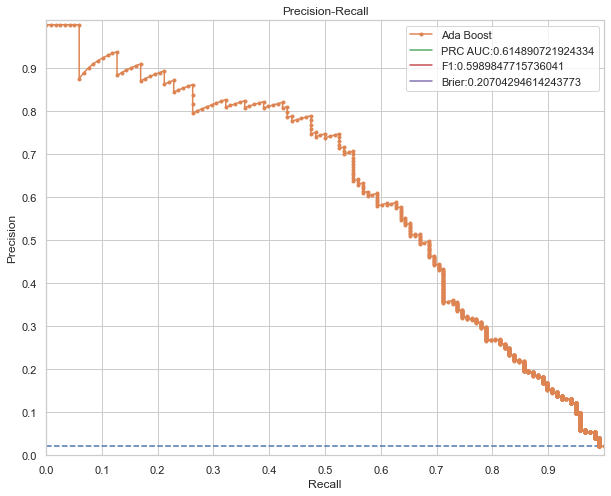

In [770]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, ada_class1_probs)
ada_thresh_f1, ada_prc_auc = f1_score(y_test, ada_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Ada Boost')
plt.plot(0,label='PRC AUC:'+str(ada_prc_auc))

plt.plot(0,label='F1:'+str(ada_thresh_f1))
plt.plot(0,label='Brier:'+str(ada_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

***Hyperparameter Tuning***

In [771]:


ada_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [1, 25, 50,100,250, 500,1000]
             
             }

ada_tuned = GridSearchCV(ada, 
                           ada_params, 
                           cv = cv, 
                           
                               scoring='f1',
                               
                           n_jobs = -1, 
                           verbose = 2) 

ada_tuned.fit(x_train, y_train)

print("En iyi parametreler: " + str(ada_tuned.best_params_))

ada_tuned= AdaBoostClassifier(learning_rate=ada_tuned.best_params_["learning_rate"],
                                
                                n_estimators=ada_tuned.best_params_["n_estimators"])

ada_tuned.fit(x_train, y_train)

ada_tuned_predicts= ada_tuned.predict(x_test)

ada_tuned_class1_probs =ada_tuned.predict_proba(x_test)[:, 1]

print("--- %s seconds ---" % (time.time() - start_time))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
En iyi parametreler: {'learning_rate': 0.1, 'n_estimators': 1000}
--- 1317.1507086753845 seconds ---


In [772]:
ada_tuned_cm= confusion_matrix(y_test, ada_tuned_predicts)
print("\nAda Boost Confusion Matrix:\n")
print(ada_tuned_cm)

print(classification_report(y_test, ada_tuned_predicts, target_names=target_names))


Ada Boost Confusion Matrix:

[[5405   10]
 [  61   57]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.85      0.48      0.62       118

    accuracy                           0.99      5533
   macro avg       0.92      0.74      0.80      5533
weighted avg       0.99      0.99      0.99      5533



In [773]:

ada_tuned_f1 = cross_val_score(ada_tuned, x, y, cv=cv, scoring='f1').mean()
print("Ada Boost doğrulanmış f1 skoru:", ada_tuned_f1)

Ada Boost doğrulanmış f1 skoru: 0.5873249673235736


In [774]:
ada_tuned_brier = -1*cross_val_score(ada_tuned, x, y, cv=cv, scoring='neg_brier_score').mean()
print("Ada Boost doğrulanmış brier skoru:", ada_tuned_brier)

Ada Boost doğrulanmış brier skoru: 0.2278069951506388


In [775]:
ada_tuned_roc_auc = cross_val_score(ada_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)).mean()
print("Ada Boost doğrulanmış roc-auc skoru:", ada_tuned_roc_auc)
print("--- %s seconds ---" % (time.time() - start_time))

Ada Boost doğrulanmış roc-auc skoru: 0.7363792090871792
--- 1560.3887748718262 seconds ---


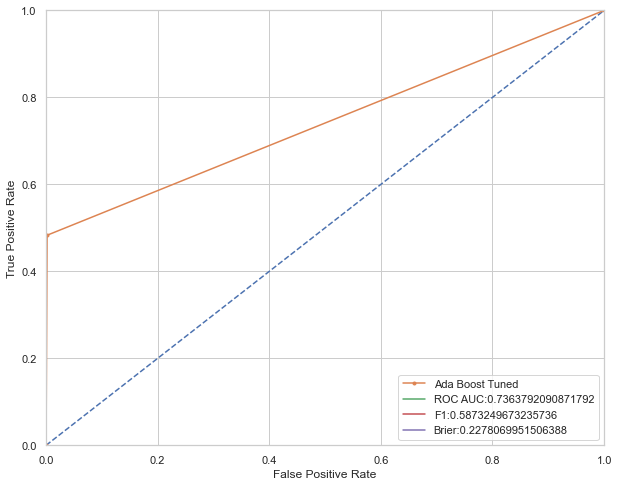

In [776]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, ada_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Ada Boost Tuned')
plt.plot(0, label = 'ROC AUC:'+str(ada_tuned_roc_auc))

plt.plot(0, label = 'F1:'+str(ada_tuned_f1))
plt.plot(0, label = 'Brier:'+str(ada_tuned_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [777]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    ada_tuned_thresh_predicts = ada_tuned_class1_probs > threshold
    precision = precision_score(y_test, ada_tuned_thresh_predicts)
    recall = recall_score(y_test, ada_tuned_thresh_predicts)
    f1 = f1_score(y_test, ada_tuned_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.01 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.02 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.03 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.04 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.05 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.06 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.07 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.08 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.09 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.10 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.11 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.12 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.13 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Thresh

In [778]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    ada_tuned_thresh_predicts = ada_tuned_class1_probs > threshold
    f1 = f1_score(y_test, ada_tuned_thresh_predicts)
    if f1_list.max() == f1:
        ada_tuned_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", ada_tuned_best_threshold)

Maximum f1 score is: 0.616 and best threshold is: 0.5


In [779]:
def custom_predict_ada_tuned(X, threshold):
    
    return (ada_tuned_class1_probs > threshold).astype(int)
    
    
ada_tuned_thresh_predicts = custom_predict_ada_tuned(X = x_test, threshold = ada_tuned_best_threshold) 

ada_tuned_thresh_cm= confusion_matrix(y_test, ada_tuned_thresh_predicts)
print("\nGradient Boosting Confusion Matrix:\n")
print(ada_tuned_thresh_cm)


Gradient Boosting Confusion Matrix:

[[5405   10]
 [  61   57]]


In [780]:
print(classification_report(y_test, ada_tuned_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.85      0.48      0.62       118

    accuracy                           0.99      5533
   macro avg       0.92      0.74      0.80      5533
weighted avg       0.99      0.99      0.99      5533



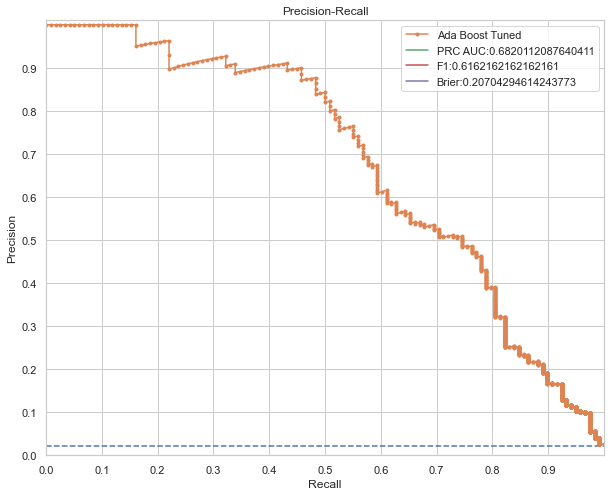

In [781]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, ada_tuned_class1_probs)
ada_tuned_thresh_f1, ada_tuned_prc_auc = f1_score(y_test, ada_tuned_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Ada Boost Tuned')
plt.plot(0,label='PRC AUC:'+str(ada_tuned_prc_auc))

plt.plot(0,label='F1:'+str(ada_tuned_thresh_f1))
plt.plot(0,label='Brier:'+str(ada_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

In [782]:
ada_tuned_df_test_class1_probs = ada_tuned.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]
ada_df_test_class1_probs = ada.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]

ada_df_test_f1 = f1_score(df_forwards_model_test.Target, ada.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(ada_df_test_f1)

def custom_predict_ada_df_test(X, threshold):
    
    return (ada_df_test_class1_probs > threshold).astype(int)
    
ada_df_test_thresh_f1 = f1_score(df_forwards_model_test.Target, custom_predict_ada_df_test(X = df_forwards_model_test.drop(columns=["PA","Target"]), 
                                                                  threshold = ada_best_threshold))

print(ada_df_test_thresh_f1)

ada_tuned_df_test_f1 = f1_score(df_forwards_model_test.Target, ada_tuned.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(ada_tuned_df_test_f1)

def custom_predict_ada_tuned_df_test(X, threshold):
    
    return (ada_tuned_df_test_class1_probs > threshold).astype(int)
    
ada_tuned_thresh_df_test_f1=f1_score(df_forwards_model_test.Target, custom_predict_ada_tuned_df_test(X = df_forwards_model_test.drop(columns=["PA",
                                                                                                        "Target"]), threshold = ada_tuned_best_threshold))

print(ada_tuned_thresh_df_test_f1)

0.5
0.5
0.5670103092783505
0.5670103092783505


### Extra Trees

In [783]:
et= ExtraTreesClassifier()
et.fit(x_train, y_train)

et_predicts= et.predict(x_test)
et_cm= confusion_matrix(y_test, et_predicts)
print("\nExtra Trees Classifier Confusion Matrix:\n")
print(et_cm)


Extra Trees Classifier Confusion Matrix:

[[5415    0]
 [  90   28]]


In [784]:
print(classification_report(y_test, et_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5415
           1       1.00      0.24      0.38       118

    accuracy                           0.98      5533
   macro avg       0.99      0.62      0.69      5533
weighted avg       0.98      0.98      0.98      5533



In [785]:

scores = []
for i in range(1,3):
    scores.append(cross_val_score(et, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
et_f1 = mean(scor)
print("Extra Tree doğrulanmış f1 skoru:", et_f1)

Extra Tree doğrulanmış f1 skoru: 0.3928997336433597


In [786]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(et, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
et_brier = -1*mean(scor)
print("Extra Tree doğrulanmış brier skoru:", et_brier)

Extra Tree doğrulanmış brier skoru: 0.012934200725564041


In [787]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(et, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
et_roc_auc = mean(scor)
print("Extra Tree doğrulanmış roc-auc skoru:", et_roc_auc)

print("--- %s seconds ---" % (time.time() - start_time))

Extra Tree doğrulanmış roc-auc skoru: 0.6230553653194332
--- 1586.9451620578766 seconds ---


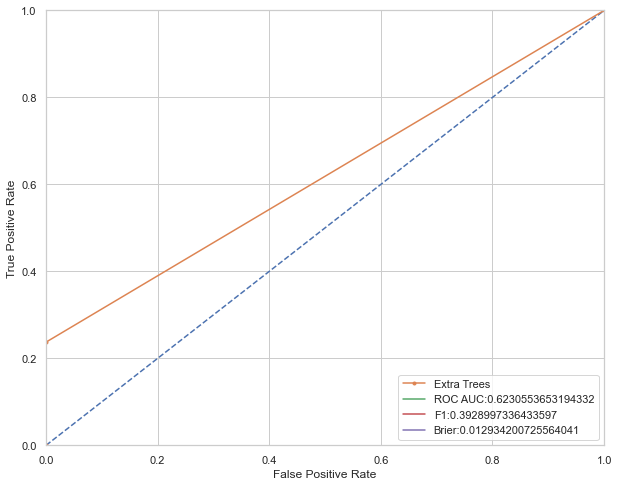

In [788]:
et_class1_probs = et.predict_proba(x_test)[:,1]

n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, et_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Extra Trees')
plt.plot(0, label = 'ROC AUC:'+str(et_roc_auc))

plt.plot(0, label = 'F1:'+str(et_f1))
plt.plot(0, label = 'Brier:'+str(et_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [789]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    et_thresh_predicts = et_class1_probs > threshold
    precision = precision_score(y_test, et_thresh_predicts)
    recall = recall_score(y_test, et_thresh_predicts)
    f1 = f1_score(y_test, et_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.044, Completeness = 0.992 | F1 = 0.085
Threshold = 0.01 | Accuracy = 0.076, Completeness = 0.975 | F1 = 0.142
Threshold = 0.02 | Accuracy = 0.109, Completeness = 0.958 | F1 = 0.197
Threshold = 0.03 | Accuracy = 0.143, Completeness = 0.941 | F1 = 0.248
Threshold = 0.04 | Accuracy = 0.172, Completeness = 0.924 | F1 = 0.290
Threshold = 0.05 | Accuracy = 0.206, Completeness = 0.915 | F1 = 0.336
Threshold = 0.06 | Accuracy = 0.230, Completeness = 0.881 | F1 = 0.364
Threshold = 0.07 | Accuracy = 0.256, Completeness = 0.856 | F1 = 0.395
Threshold = 0.08 | Accuracy = 0.282, Completeness = 0.847 | F1 = 0.424
Threshold = 0.09 | Accuracy = 0.321, Completeness = 0.839 | F1 = 0.465
Threshold = 0.10 | Accuracy = 0.346, Completeness = 0.797 | F1 = 0.482
Threshold = 0.11 | Accuracy = 0.377, Completeness = 0.780 | F1 = 0.508
Threshold = 0.12 | Accuracy = 0.394, Completeness = 0.754 | F1 = 0.517
Threshold = 0.13 | Accuracy = 0.430, Completeness = 0.754 | F1 = 0.548
Thresh

In [790]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    et_thresh_predicts = et_class1_probs > threshold
    f1 = f1_score(y_test, et_thresh_predicts)
    if f1_list.max() == f1:
        et_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", et_best_threshold)

def custom_predict_et(X, threshold):
    
    return (et_class1_probs > threshold).astype(int)
    
    
et_thresh_predicts = custom_predict_et(X = x_test, threshold = et_best_threshold) 

et_thresh_cm= confusion_matrix(y_test, et_thresh_predicts)
print("\nExtra Trees Confusion Matrix:\n")
print(et_thresh_cm)

Maximum f1 score is: 0.654 and best threshold is: 0.24

Extra Trees Confusion Matrix:

[[5389   26]
 [  48   70]]


In [791]:
print(classification_report(y_test, et_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.73      0.59      0.65       118

    accuracy                           0.99      5533
   macro avg       0.86      0.79      0.82      5533
weighted avg       0.99      0.99      0.99      5533



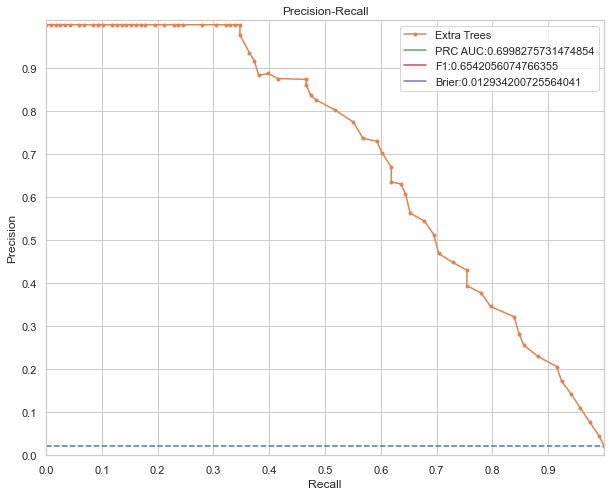

In [792]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, et_class1_probs)
et_thresh_f1, et_prc_auc = f1_score(y_test, et_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Extra Trees')
plt.plot(0,label='PRC AUC:'+str(et_prc_auc))

plt.plot(0,label='F1:'+str(et_thresh_f1))
plt.plot(0,label='Brier:'+str(et_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

***Hyperparameter Tuning***

In [793]:


et_params = {"criterion":["gini", "entropy"],
             "min_samples_split" : [2, 3, 4, 5, 6, 7 ,8 ,9, 10],
             "max_features": [2, 3,4, 5,6,7,8,9 ,10,"auto"],
             "n_estimators": [10,25,50,100,250,500,100],
             "class_weight":['balanced_subsample', 'balanced'],
    
    
             
             }

et_tuned = RandomizedSearchCV(et, 
                           et_params, 
                           cv = cv,
                            n_iter = 50,
                           scoring = 'f1',   
                           n_jobs = -1, 
                           verbose = 2) 

et_tuned.fit(x_train, y_train)

print("En iyi parametreler: " + str(et_tuned.best_params_))

et_tuned= ExtraTreesClassifier(criterion=et_tuned.best_params_["criterion"],
                                
                                min_samples_split=et_tuned.best_params_["min_samples_split"],
                              max_features=et_tuned.best_params_["max_features"],
                               n_estimators=et_tuned.best_params_["n_estimators"],
            
                              class_weight=et_tuned.best_params_["class_weight"])
                              

et_tuned.fit(x_train, y_train)

et_tuned_predicts= et_tuned.predict(x_test)

et_tuned_class1_probs =et_tuned.predict_proba(x_test)[:, 1]

et_tuned_cm= confusion_matrix(y_test, et_tuned_predicts)
print("\nExtra Trees Confusion Matrix:\n")
print(et_tuned_cm)

print(classification_report(y_test, et_tuned_predicts, target_names=target_names))

print("--- %s seconds ---" % (time.time() - start_time))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
En iyi parametreler: {'n_estimators': 100, 'min_samples_split': 10, 'max_features': 2, 'criterion': 'entropy', 'class_weight': 'balanced_subsample'}

Extra Trees Confusion Matrix:

[[5397   18]
 [  65   53]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.75      0.45      0.56       118

    accuracy                           0.98      5533
   macro avg       0.87      0.72      0.78      5533
weighted avg       0.98      0.98      0.98      5533

--- 1610.312511920929 seconds ---


In [794]:


scores = []
for i in range(1,3):
    scores.append(cross_val_score(et_tuned, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
et_tuned_f1 = mean(scor)
print("ExtraTree doğrulanmış f1 skoru:", et_tuned_f1)

ExtraTree doğrulanmış f1 skoru: 0.5616369438944726


In [795]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(et_tuned, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
et_tuned_brier = -1*mean(scor)
print("ExtraTree doğrulanmış brier skoru:", et_tuned_brier)

ExtraTree doğrulanmış brier skoru: 0.016168210619867403


In [796]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(et_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
et_tuned_roc_auc = mean(scor)
print("Extra Tree doğrulanmış roc-auc skoru:", et_tuned_roc_auc)

print("--- %s seconds ---" % (time.time() - start_time))

Extra Tree doğrulanmış roc-auc skoru: 0.7303644943269991
--- 1625.998010635376 seconds ---


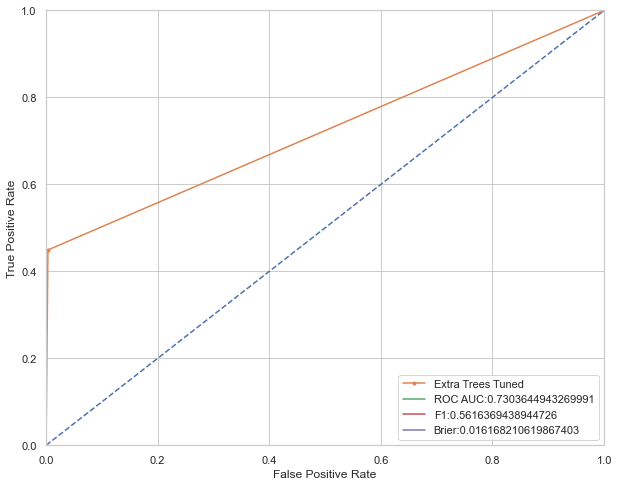

In [797]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, et_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Extra Trees Tuned')
plt.plot(0, label = 'ROC AUC:'+str(et_tuned_roc_auc))

plt.plot(0, label = 'F1:'+str(et_tuned_f1))
plt.plot(0, label = 'Brier:'+str(et_tuned_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [798]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    et_tuned_thresh_predicts = et_tuned_class1_probs > threshold
    precision = precision_score(y_test, et_tuned_thresh_predicts)
    recall = recall_score(y_test, et_tuned_thresh_predicts)
    f1 = f1_score(y_test, et_tuned_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.024, Completeness = 1.000 | F1 = 0.047
Threshold = 0.01 | Accuracy = 0.029, Completeness = 1.000 | F1 = 0.057
Threshold = 0.02 | Accuracy = 0.036, Completeness = 0.992 | F1 = 0.069
Threshold = 0.03 | Accuracy = 0.043, Completeness = 0.992 | F1 = 0.083
Threshold = 0.04 | Accuracy = 0.051, Completeness = 0.966 | F1 = 0.097
Threshold = 0.05 | Accuracy = 0.061, Completeness = 0.966 | F1 = 0.115
Threshold = 0.06 | Accuracy = 0.070, Completeness = 0.958 | F1 = 0.131
Threshold = 0.07 | Accuracy = 0.082, Completeness = 0.949 | F1 = 0.151
Threshold = 0.08 | Accuracy = 0.093, Completeness = 0.949 | F1 = 0.170
Threshold = 0.09 | Accuracy = 0.107, Completeness = 0.949 | F1 = 0.193
Threshold = 0.10 | Accuracy = 0.122, Completeness = 0.949 | F1 = 0.216
Threshold = 0.11 | Accuracy = 0.138, Completeness = 0.941 | F1 = 0.240
Threshold = 0.12 | Accuracy = 0.148, Completeness = 0.932 | F1 = 0.256
Threshold = 0.13 | Accuracy = 0.162, Completeness = 0.924 | F1 = 0.276
Thresh

In [799]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    et_tuned_thresh_predicts = et_tuned_class1_probs > threshold
    f1 = f1_score(y_test, et_tuned_thresh_predicts)
    if f1_list.max() == f1:
        et_tuned_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", et_tuned_best_threshold)

def custom_predict_et_tuned(X, threshold):
    
    return (et_tuned_class1_probs > threshold).astype(int)
    
    
et_tuned_thresh_predicts = custom_predict_et_tuned(X = x_test, threshold = et_tuned_best_threshold) 

et_tuned_thresh_cm= confusion_matrix(y_test, et_tuned_thresh_predicts)
print("\nExtra Trees Confusion Matrix:\n")
print(et_tuned_thresh_cm)

print(classification_report(y_test, et_tuned_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.645 and best threshold is: 0.38

Extra Trees Confusion Matrix:

[[5369   46]
 [  40   78]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5415
           1       0.63      0.66      0.64       118

    accuracy                           0.98      5533
   macro avg       0.81      0.83      0.82      5533
weighted avg       0.98      0.98      0.98      5533



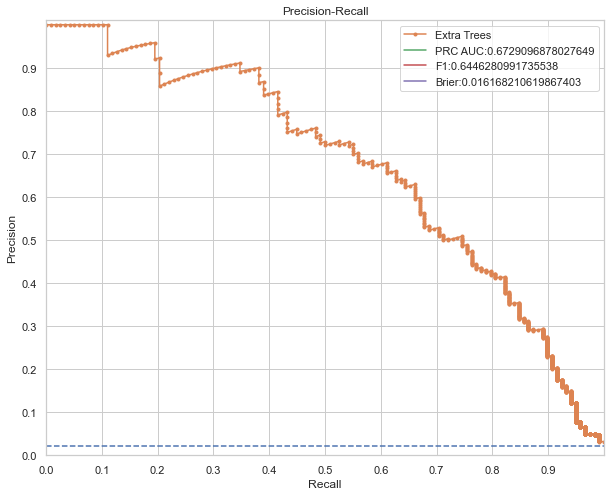

In [800]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, et_tuned_class1_probs)
et_tuned_thresh_f1, et_tuned_prc_auc = f1_score(y_test, et_tuned_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Extra Trees')
plt.plot(0,label='PRC AUC:'+str(et_tuned_prc_auc))

plt.plot(0,label='F1:'+str(et_tuned_thresh_f1))
plt.plot(0,label='Brier:'+str(et_tuned_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

In [801]:
et_tuned_df_test_class1_probs = et_tuned.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]
et_df_test_class1_probs = et.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]

et_df_test_f1 = f1_score(df_forwards_model_test.Target, et.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(et_df_test_f1)

def custom_predict_et_df_test(X, threshold):
    
    return (et_df_test_class1_probs > threshold).astype(int)
    
et_df_test_thresh_f1 = f1_score(df_forwards_model_test.Target, custom_predict_et_df_test(X = df_forwards_model_test.drop(columns=["PA","Target"]), 
                                                                  threshold = et_best_threshold))

print(et_df_test_thresh_f1)

et_tuned_df_test_f1 = f1_score(df_forwards_model_test.Target, et_tuned.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(et_tuned_df_test_f1)

def custom_predict_et_tuned_df_test(X, threshold):
    
    return (et_tuned_df_test_class1_probs > threshold).astype(int)
    
et_tuned_thresh_df_test_f1=f1_score(df_forwards_model_test.Target, custom_predict_et_tuned_df_test(X = df_forwards_model_test.drop(columns=["PA",
                                                                                                        "Target"]), threshold = et_tuned_best_threshold))

print(et_tuned_thresh_df_test_f1)

0.3684210526315789
0.5765765765765766
0.5284974093264249
0.5555555555555556


### Naive Bayes

In [802]:
nb= GaussianNB()
nb.fit(x_train, y_train)

nb_predicts= nb.predict(x_test)
nb_cm= confusion_matrix(y_test, nb_predicts)
print("\nNaive Bayes  Confusion Matrix:\n")
print(nb_cm)

print(classification_report(y_test, nb_predicts, target_names=target_names))


Naive Bayes  Confusion Matrix:

[[4956  459]
 [  11  107]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.95      5415
           1       0.19      0.91      0.31       118

    accuracy                           0.92      5533
   macro avg       0.59      0.91      0.63      5533
weighted avg       0.98      0.92      0.94      5533



In [803]:
nb_f1 = cross_val_score(nb, x, y, cv=cv, scoring='f1').mean()
print("Naive Bayes doğrulanmış f1 skoru:", nb_f1)

Naive Bayes doğrulanmış f1 skoru: 0.2934124015090605


In [804]:
nb_brier = -1*cross_val_score(nb, x, y, cv=cv, scoring='neg_brier_score').mean()
print("Naive Bayes doğrulanmış brier skoru:", nb_brier)

Naive Bayes doğrulanmış brier skoru: 0.07566800535888933


In [805]:
nb_roc_auc = cross_val_score(nb, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)).mean()
print("Naive Bayes doğrulanmış roc-auc skoru:", nb_roc_auc)

Naive Bayes doğrulanmış roc-auc skoru: 0.8698121143873276


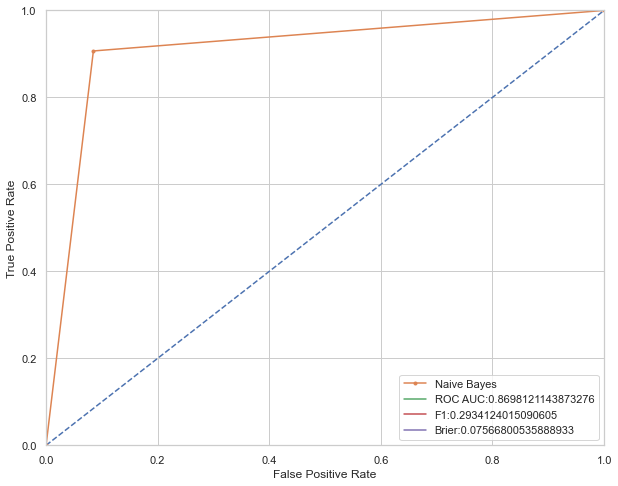

In [806]:
nb_class1_probs = nb.predict_proba(x_test)[:,1]

n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, nb_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Naive Bayes')
plt.plot(0, label = 'ROC AUC:'+str(nb_roc_auc))

plt.plot(0, label = 'F1:'+str(nb_f1))
plt.plot(0, label = 'Brier:'+str(nb_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [807]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    nb_thresh_predicts = nb_class1_probs > threshold
    precision = precision_score(y_test, nb_thresh_predicts)
    recall = recall_score(y_test, nb_thresh_predicts)
    f1 = f1_score(y_test, nb_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.01 | Accuracy = 0.109, Completeness = 0.932 | F1 = 0.195
Threshold = 0.02 | Accuracy = 0.117, Completeness = 0.932 | F1 = 0.207
Threshold = 0.03 | Accuracy = 0.123, Completeness = 0.932 | F1 = 0.218
Threshold = 0.04 | Accuracy = 0.129, Completeness = 0.932 | F1 = 0.226
Threshold = 0.05 | Accuracy = 0.133, Completeness = 0.932 | F1 = 0.233
Threshold = 0.06 | Accuracy = 0.136, Completeness = 0.932 | F1 = 0.238
Threshold = 0.07 | Accuracy = 0.139, Completeness = 0.932 | F1 = 0.241
Threshold = 0.08 | Accuracy = 0.140, Completeness = 0.932 | F1 = 0.244
Threshold = 0.09 | Accuracy = 0.141, Completeness = 0.932 | F1 = 0.244
Threshold = 0.10 | Accuracy = 0.143, Completeness = 0.932 | F1 = 0.247
Threshold = 0.11 | Accuracy = 0.144, Completeness = 0.932 | F1 = 0.250
Threshold = 0.12 | Accuracy = 0.145, Completeness = 0.932 | F1 = 0.251
Threshold = 0.13 | Accuracy = 0.147, Completeness = 0.932 | F1 = 0.254
Thresh

In [808]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    nb_thresh_predicts = nb_class1_probs > threshold
    f1 = f1_score(y_test, nb_thresh_predicts)
    if f1_list.max() == f1:
        nb_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", nb_best_threshold)

def custom_predict_nb(X, threshold):
    
    return (nb_class1_probs > threshold).astype(int)
    
    
nb_thresh_predicts = custom_predict_nb(X = x_test, threshold = nb_best_threshold) 

nb_thresh_cm= confusion_matrix(y_test, nb_thresh_predicts)
print("\nNaive Bayes Confusion Matrix:\n")
print(nb_thresh_cm)

print(classification_report(y_test, nb_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.386 and best threshold is: 0.9400000000000001

Naive Bayes Confusion Matrix:

[[5119  296]
 [  19   99]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      5415
           1       0.25      0.84      0.39       118

    accuracy                           0.94      5533
   macro avg       0.62      0.89      0.68      5533
weighted avg       0.98      0.94      0.96      5533



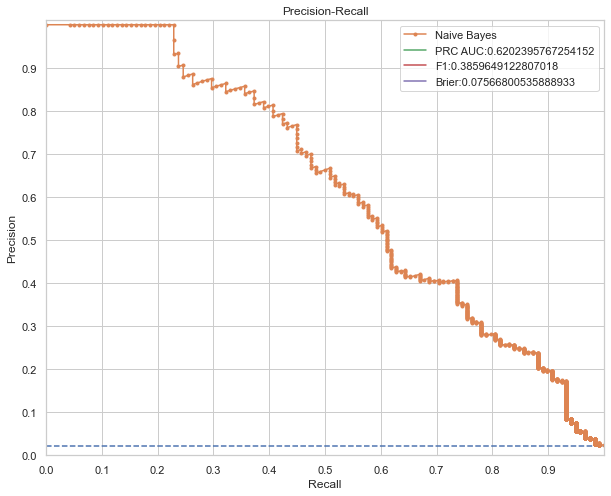

In [809]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, nb_class1_probs)
nb_thresh_f1, nb_prc_auc = f1_score(y_test, nb_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Naive Bayes')
plt.plot(0,label='PRC AUC:'+str(nb_prc_auc))

plt.plot(0,label='F1:'+str(nb_thresh_f1))
plt.plot(0,label='Brier:'+str(nb_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

***Hyperparameter Tuning***

In [810]:
nb_params = {"var_smoothing":[0.0000000001, 0.000000001, 0.00000001, 0.0000001,  0.000001, 0.00001, 0.0001,0.001, 0.01]
    
    
             
             }

nb_tuned = GridSearchCV(nb, 
                           nb_params, 
                           cv = cv,
                            
                           scoring = 'f1',   
                           n_jobs = -1, 
                           verbose = 2) 

nb_tuned.fit(x_train, y_train)

print("En iyi parametreler: " + str(nb_tuned.best_params_))

nb_tuned= GaussianNB(var_smoothing=nb_tuned.best_params_["var_smoothing"])
                              

nb_tuned.fit(x_train, y_train)

nb_tuned_predicts= nb_tuned.predict(x_test)

nb_tuned_class1_probs =nb_tuned.predict_proba(x_test)[:, 1]

nb_tuned_cm= confusion_matrix(y_test, nb_tuned_predicts)
print("\nNaive Bayes Confusion Matrix:\n")
print(nb_tuned_cm)

print(classification_report(y_test, nb_tuned_predicts, target_names=target_names))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
En iyi parametreler: {'var_smoothing': 0.01}

Naive Bayes Confusion Matrix:

[[4982  433]
 [  11  107]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      5415
           1       0.20      0.91      0.33       118

    accuracy                           0.92      5533
   macro avg       0.60      0.91      0.64      5533
weighted avg       0.98      0.92      0.94      5533



In [811]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(nb_tuned, x, y, cv=cv, scoring='f1'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
nb_tuned_f1 = mean(scor)
print("Naive Bayes doğrulanmış f1 skoru:", nb_tuned_f1)

Naive Bayes doğrulanmış f1 skoru: 0.2993793115757593


In [812]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(nb_tuned, x, y, cv=cv, scoring='neg_brier_score'))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
nb_tuned_brier = -1*mean(scor)
print("Naive Bayes doğrulanmış brier skoru:", nb_tuned_brier)

Naive Bayes doğrulanmış brier skoru: 0.07161154783300612


In [813]:
scores = []
for i in range(1,3):
    scores.append(cross_val_score(nb_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)))


scor = []
for i in range (len(scores)):
    scor.append(scores[i].mean())
nb_tuned_roc_auc = mean(scor)
print("Naive Bayes doğrulanmış roc-auc skoru:", nb_tuned_roc_auc)

Naive Bayes doğrulanmış roc-auc skoru: 0.8686194608652423


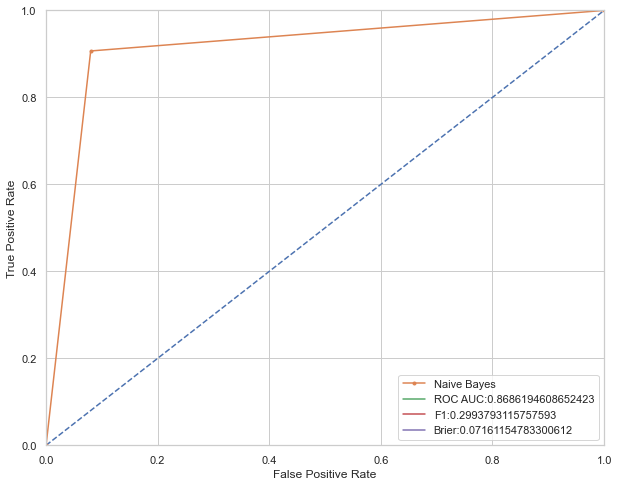

In [814]:
nb_tuned_class1_probs = nb_tuned.predict_proba(x_test)[:,1]

n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, nb_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Naive Bayes')
plt.plot(0, label = 'ROC AUC:'+str(nb_tuned_roc_auc))

plt.plot(0, label = 'F1:'+str(nb_tuned_f1))
plt.plot(0, label = 'Brier:'+str(nb_tuned_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [815]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    nb_tuned_thresh_predicts = nb_tuned_class1_probs > threshold
    precision = precision_score(y_test, nb_tuned_thresh_predicts)
    recall = recall_score(y_test, nb_tuned_thresh_predicts)
    f1 = f1_score(y_test, nb_tuned_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.01 | Accuracy = 0.107, Completeness = 0.932 | F1 = 0.192
Threshold = 0.02 | Accuracy = 0.118, Completeness = 0.932 | F1 = 0.210
Threshold = 0.03 | Accuracy = 0.123, Completeness = 0.932 | F1 = 0.217
Threshold = 0.04 | Accuracy = 0.129, Completeness = 0.932 | F1 = 0.227
Threshold = 0.05 | Accuracy = 0.133, Completeness = 0.932 | F1 = 0.232
Threshold = 0.06 | Accuracy = 0.136, Completeness = 0.932 | F1 = 0.237
Threshold = 0.07 | Accuracy = 0.139, Completeness = 0.932 | F1 = 0.242
Threshold = 0.08 | Accuracy = 0.140, Completeness = 0.932 | F1 = 0.244
Threshold = 0.09 | Accuracy = 0.142, Completeness = 0.932 | F1 = 0.246
Threshold = 0.10 | Accuracy = 0.143, Completeness = 0.932 | F1 = 0.248
Threshold = 0.11 | Accuracy = 0.145, Completeness = 0.932 | F1 = 0.250
Threshold = 0.12 | Accuracy = 0.146, Completeness = 0.924 | F1 = 0.251
Threshold = 0.13 | Accuracy = 0.149, Completeness = 0.924 | F1 = 0.256
Thresh

In [816]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    nb_tuned_thresh_predicts = nb_tuned_class1_probs > threshold
    f1 = f1_score(y_test, nb_tuned_thresh_predicts)
    if f1_list.max() == f1:
        nb_tuned_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", nb_tuned_best_threshold)

def custom_predict_nb_tuned(X, threshold):
    
    return (nb_tuned_class1_probs > threshold).astype(int)
    
    
nb_tuned_thresh_predicts = custom_predict_nb_tuned(X = x_test, threshold = nb_tuned_best_threshold) 

nb_tuned_thresh_cm= confusion_matrix(y_test, nb_tuned_thresh_predicts)
print("\nExtra Trees Confusion Matrix:\n")
print(nb_tuned_thresh_cm)

print(classification_report(y_test, nb_tuned_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.394 and best threshold is: 0.9400000000000001

Extra Trees Confusion Matrix:

[[5146  269]
 [  23   95]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      5415
           1       0.26      0.81      0.39       118

    accuracy                           0.95      5533
   macro avg       0.63      0.88      0.68      5533
weighted avg       0.98      0.95      0.96      5533



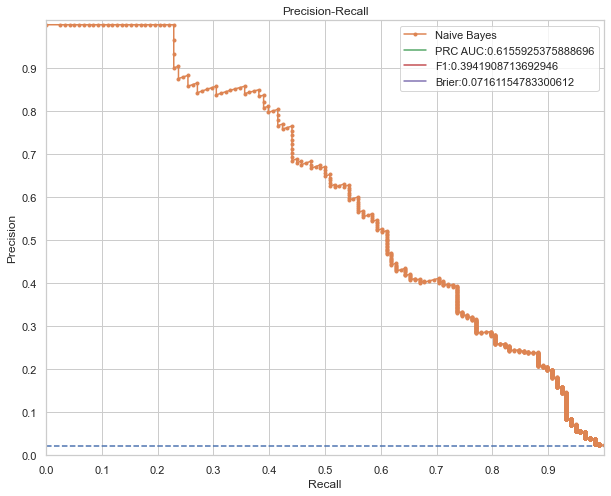

In [817]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, nb_tuned_class1_probs)
nb_tuned_thresh_f1, nb_tuned_prc_auc = f1_score(y_test, nb_tuned_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Naive Bayes')
plt.plot(0,label='PRC AUC:'+str(nb_tuned_prc_auc))

plt.plot(0,label='F1:'+str(nb_tuned_thresh_f1))
plt.plot(0,label='Brier:'+str(nb_tuned_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

In [818]:
nb_tuned_df_test_class1_probs = nb_tuned.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]
nb_df_test_class1_probs = nb.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]

nb_df_test_f1 = f1_score(df_forwards_model_test.Target, nb.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(nb_df_test_f1)

def custom_predict_nb_df_test(X, threshold):
    
    return (nb_df_test_class1_probs > threshold).astype(int)
    
nb_df_test_thresh_f1 = f1_score(df_forwards_model_test.Target, custom_predict_nb_df_test(X = df_forwards_model_test.drop(columns=["PA","Target"]), 
                                                                  threshold = nb_best_threshold))

print(nb_df_test_thresh_f1)

nb_tuned_df_test_f1 = f1_score(df_forwards_model_test.Target, nb_tuned.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(nb_tuned_df_test_f1)

def custom_predict_nb_tuned_df_test(X, threshold):
    
    return (nb_tuned_df_test_class1_probs > threshold).astype(int)
    
nb_tuned_thresh_df_test_f1=f1_score(df_forwards_model_test.Target, custom_predict_nb_tuned_df_test(X = df_forwards_model_test.drop(columns=["PA",
                                                                                                        "Target"]), threshold = nb_tuned_best_threshold))

print(nb_tuned_thresh_df_test_f1)

0.32899022801302935
0.3760330578512397
0.3283082077051926
0.39824945295404807


### XG Boost

In [819]:
xg= XGBClassifier()
xg.fit(x_train, y_train)

xg_predicts= xg.predict(x_test)
xg_cm= confusion_matrix(y_test, xg_predicts)
print("\nXG Boost Confusion Matrix:\n")
print(xg_cm)

print(classification_report(y_test, xg_predicts, target_names=target_names))


XG Boost Confusion Matrix:

[[5404   11]
 [  62   56]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.84      0.47      0.61       118

    accuracy                           0.99      5533
   macro avg       0.91      0.74      0.80      5533
weighted avg       0.99      0.99      0.99      5533



In [820]:
xg_f1 = cross_val_score(xg, x, y, cv=cv, scoring='f1').mean()
print("XG Boost doğrulanmış f1 skoru:", xg_f1)

#---------------------------------


xg_brier = -1*cross_val_score(xg, x, y, cv=cv, scoring='neg_brier_score').mean()
print("\nXG Boost doğrulanmış brier skoru:", xg_brier)

#---------------------------------



xg_roc_auc = cross_val_score(xg, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)).mean()
print("\nXG Boost doğrulanmış roc-auc skoru:", xg_roc_auc)

XG Boost doğrulanmış f1 skoru: 0.5984426899481734

XG Boost doğrulanmış brier skoru: 0.011870047746362203

XG Boost doğrulanmış roc-auc skoru: 0.7391647828333276


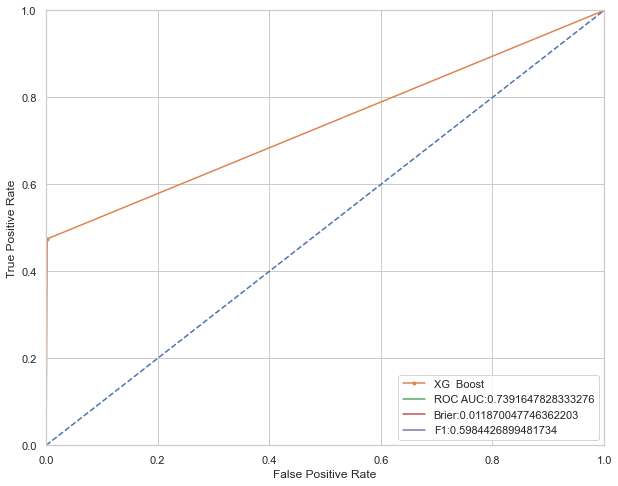

In [821]:
xg_class1_probs = xg.predict_proba(x_test)[:,1]
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, xg_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='XG  Boost')
plt.plot(0, label = 'ROC AUC:'+str(xg_roc_auc))

plt.plot(0, label = 'Brier:'+str(xg_brier))
plt.plot(0, label = 'F1:'+str(xg_f1))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [822]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    xg_thresh_predicts = xg_class1_probs > threshold
    precision = precision_score(y_test, xg_thresh_predicts)
    recall = recall_score(y_test, xg_thresh_predicts)
    f1 = f1_score(y_test, xg_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.01 | Accuracy = 0.353, Completeness = 0.814 | F1 = 0.492
Threshold = 0.02 | Accuracy = 0.443, Completeness = 0.763 | F1 = 0.561
Threshold = 0.03 | Accuracy = 0.473, Completeness = 0.737 | F1 = 0.576
Threshold = 0.04 | Accuracy = 0.503, Completeness = 0.729 | F1 = 0.595
Threshold = 0.05 | Accuracy = 0.535, Completeness = 0.703 | F1 = 0.608
Threshold = 0.06 | Accuracy = 0.555, Completeness = 0.686 | F1 = 0.614
Threshold = 0.07 | Accuracy = 0.568, Completeness = 0.669 | F1 = 0.615
Threshold = 0.08 | Accuracy = 0.603, Completeness = 0.669 | F1 = 0.635
Threshold = 0.09 | Accuracy = 0.617, Completeness = 0.669 | F1 = 0.642
Threshold = 0.10 | Accuracy = 0.627, Completeness = 0.669 | F1 = 0.648
Threshold = 0.11 | Accuracy = 0.639, Completeness = 0.661 | F1 = 0.650
Threshold = 0.12 | Accuracy = 0.661, Completeness = 0.661 | F1 = 0.661
Threshold = 0.13 | Accuracy = 0.672, Completeness = 0.661 | F1 = 0.667
Thresh

In [823]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    xg_thresh_predicts = xg_class1_probs > threshold
    f1 = f1_score(y_test, xg_thresh_predicts)
    if f1_list.max() == f1:
        xg_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", xg_best_threshold)

def custom_predict_xg(X, threshold):
    
    return (xg_class1_probs > threshold).astype(int)
    
    
xg_thresh_predicts = custom_predict_xg(X = x_test, threshold = xg_best_threshold) 

xg_thresh_cm= confusion_matrix(y_test, xg_thresh_predicts)
print("\XG Boost Confusion Matrix:\n")
print(xg_thresh_cm)

print(classification_report(y_test, xg_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.673 and best threshold is: 0.17
\XG Boost Confusion Matrix:

[[5385   30]
 [  43   75]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5415
           1       0.71      0.64      0.67       118

    accuracy                           0.99      5533
   macro avg       0.85      0.82      0.83      5533
weighted avg       0.99      0.99      0.99      5533



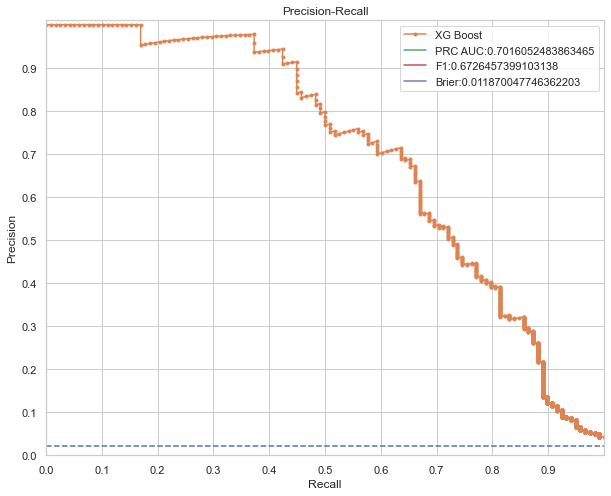

In [824]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, xg_class1_probs)
xg_thresh_f1, xg_prc_auc = f1_score(y_test, xg_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='XG Boost')
plt.plot(0,label='PRC AUC:'+str(xg_prc_auc))

plt.plot(0,label='F1:'+str(xg_thresh_f1))
plt.plot(0,label='Brier:'+str(xg_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

***Hyperparameter Tuning***

In [825]:
xgboost.set_config(verbosity=0)

xg_params = {
        'n_estimators': [10, 100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6, 10],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10],
        "max_leaves":[0,1,2,3,5,10]}
    
    
             
            

xg_tuned = RandomizedSearchCV(xg, 
                           xg_params, 
                           cv = cv,
                           n_iter=50,
                           scoring = 'f1',   
                           n_jobs = -1, 
                           verbose = 2) 


xg_tuned.fit(x_train, y_train)
print("En iyi parametreler: " + str(xg_tuned.best_params_))

xg_tuned= XGBClassifier(n_estimators=xg_tuned.best_params_["n_estimators"],
                     subsample=xg_tuned.best_params_["subsample"],
                     
                     max_depth=xg_tuned.best_params_["max_depth"],
               learning_rate=xg_tuned.best_params_["learning_rate"],
               min_samples_split=xg_tuned.best_params_["min_samples_split"],
               max_leaves=xg_tuned.best_params_["max_leaves"],
                        eval_metric='mlogloss'
              
                     )
                              

xg_tuned.fit(x_train, y_train)

xg_tuned_predicts= xg_tuned.predict(x_test)

xg_tuned_class1_probs =xg_tuned.predict_proba(x_test)[:, 1]

xg_tuned_cm= confusion_matrix(y_test, xg_tuned_predicts)
print("\nXG Boost Confusion Matrix:\n")
print(xg_tuned_cm)

print(classification_report(y_test, xg_tuned_predicts, target_names=target_names))


print("--- %s seconds ---" % (time.time() - start_time))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
En iyi parametreler: {'subsample': 0.6, 'n_estimators': 2000, 'min_samples_split': 10, 'max_leaves': 5, 'max_depth': 5, 'learning_rate': 0.02}

XG Boost Confusion Matrix:

[[5406    9]
 [  60   58]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.87      0.49      0.63       118

    accuracy                           0.99      5533
   macro avg       0.93      0.74      0.81      5533
weighted avg       0.99      0.99      0.99      5533

--- 1832.23437166214 seconds ---


In [826]:


xg_tuned_f1 = cross_val_score(xg_tuned, x, y, cv=cv, scoring='f1').mean()
print("XG Boost doğrulanmış f1 skoru:", xg_tuned_f1)

#---------------------------------



xg_tuned_brier = -1*cross_val_score(xg_tuned, x, y, cv=cv, scoring='neg_brier_score').mean()
print("\nXG Boost doğrulanmış brier skoru:", xg_tuned_brier)

#---------------------------------


xg_tuned_roc_auc = cross_val_score(xg_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)).mean()
print("\nXG Boost doğrulanmış roc-auc skoru:", xg_tuned_roc_auc)
print("--- %s seconds ---" % (time.time() - start_time))

XG Boost doğrulanmış f1 skoru: 0.596694210678797

XG Boost doğrulanmış brier skoru: 0.011630126755555836

XG Boost doğrulanmış roc-auc skoru: 0.740412731796432
--- 1953.5704371929169 seconds ---


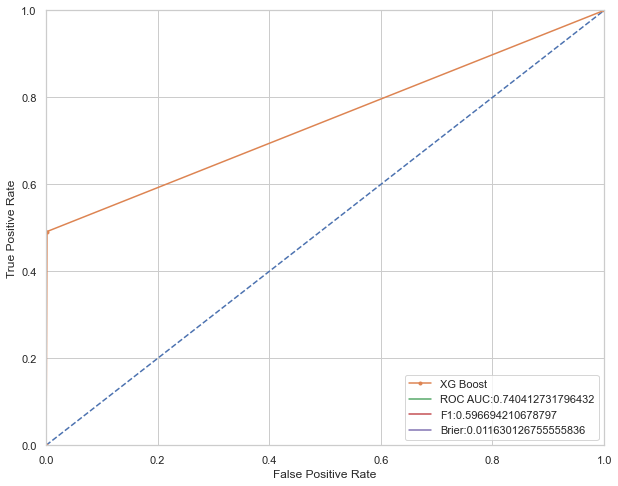

In [827]:
xg_tuned_class1_probs = xg_tuned.predict_proba(x_test)[:,1]

n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, xg_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='XG Boost')
plt.plot(0, label = 'ROC AUC:'+str(xg_tuned_roc_auc))

plt.plot(0, label = 'F1:'+str(xg_tuned_f1))
plt.plot(0, label = 'Brier:'+str(xg_tuned_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [828]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    xg_tuned_thresh_predicts = xg_tuned_class1_probs > threshold
    precision = precision_score(y_test, xg_tuned_thresh_predicts)
    recall = recall_score(y_test, xg_tuned_thresh_predicts)
    f1 = f1_score(y_test, xg_tuned_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.01 | Accuracy = 0.331, Completeness = 0.814 | F1 = 0.471
Threshold = 0.02 | Accuracy = 0.428, Completeness = 0.805 | F1 = 0.559
Threshold = 0.03 | Accuracy = 0.479, Completeness = 0.788 | F1 = 0.596
Threshold = 0.04 | Accuracy = 0.511, Completeness = 0.763 | F1 = 0.612
Threshold = 0.05 | Accuracy = 0.542, Completeness = 0.763 | F1 = 0.634
Threshold = 0.06 | Accuracy = 0.559, Completeness = 0.763 | F1 = 0.645
Threshold = 0.07 | Accuracy = 0.595, Completeness = 0.746 | F1 = 0.662
Threshold = 0.08 | Accuracy = 0.606, Completeness = 0.729 | F1 = 0.662
Threshold = 0.09 | Accuracy = 0.619, Completeness = 0.703 | F1 = 0.659
Threshold = 0.10 | Accuracy = 0.636, Completeness = 0.695 | F1 = 0.664
Threshold = 0.11 | Accuracy = 0.664, Completeness = 0.686 | F1 = 0.675
Threshold = 0.12 | Accuracy = 0.675, Completeness = 0.686 | F1 = 0.681
Threshold = 0.13 | Accuracy = 0.686, Completeness = 0.686 | F1 = 0.686
Thresh

In [829]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    xg_tuned_thresh_predicts = xg_tuned_class1_probs > threshold
    f1 = f1_score(y_test, xg_tuned_thresh_predicts)
    if f1_list.max() == f1:
        xg_tuned_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", xg_tuned_best_threshold)

def custom_predict_xg_tuned(X, threshold):
    
    return (xg_tuned_class1_probs > threshold).astype(int)
    
    
xg_tuned_thresh_predicts = custom_predict_xg_tuned(X = x_test, threshold = xg_tuned_best_threshold) 

xg_tuned_thresh_cm= confusion_matrix(y_test, xg_tuned_thresh_predicts)
print("\nXG Boost Confusion Matrix:\n")
print(xg_tuned_thresh_cm)

print(classification_report(y_test, xg_tuned_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.686 and best threshold is: 0.13

XG Boost Confusion Matrix:

[[5378   37]
 [  37   81]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5415
           1       0.69      0.69      0.69       118

    accuracy                           0.99      5533
   macro avg       0.84      0.84      0.84      5533
weighted avg       0.99      0.99      0.99      5533



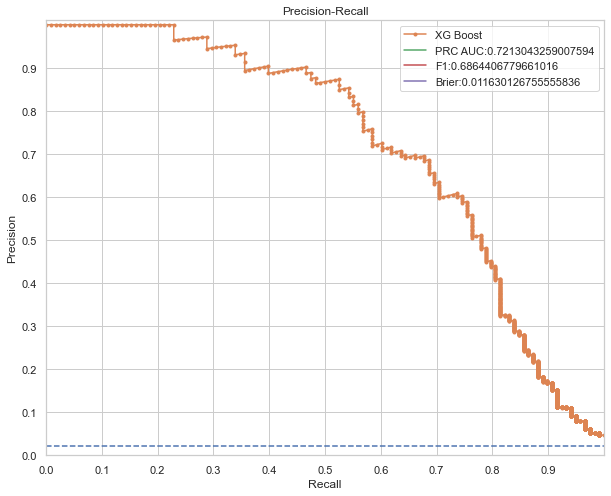

In [830]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, xg_tuned_class1_probs)
xg_tuned_thresh_f1, xg_tuned_prc_auc = f1_score(y_test, xg_tuned_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='XG Boost')
plt.plot(0,label='PRC AUC:'+str(xg_tuned_prc_auc))

plt.plot(0,label='F1:'+str(xg_tuned_thresh_f1))
plt.plot(0,label='Brier:'+str(xg_tuned_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

In [831]:
xg_tuned_df_test_class1_probs = xg_tuned.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]
xg_df_test_class1_probs = xg.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]

xg_df_test_f1 = f1_score(df_forwards_model_test.Target, xg.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(xg_df_test_f1)

def custom_predict_xg_df_test(X, threshold):
    
    return (xg_df_test_class1_probs > threshold).astype(int)
    
xg_df_test_thresh_f1 = f1_score(df_forwards_model_test.Target, custom_predict_xg_df_test(X = df_forwards_model_test.drop(columns=["PA","Target"]), 
                                                                  threshold = xg_best_threshold))

print(xg_df_test_thresh_f1)

xg_tuned_df_test_f1 = f1_score(df_forwards_model_test.Target, xg_tuned.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(xg_tuned_df_test_f1)

def custom_predict_xg_tuned_df_test(X, threshold):
    
    return (xg_tuned_df_test_class1_probs > threshold).astype(int)
    
xg_tuned_thresh_df_test_f1=f1_score(df_forwards_model_test.Target, custom_predict_xg_tuned_df_test(X = df_forwards_model_test.drop(columns=["PA",
                                                                                                        "Target"]), threshold = xg_tuned_best_threshold))

print(xg_tuned_thresh_df_test_f1)

0.5502645502645502
0.5789473684210527
0.5837837837837838
0.652892561983471


### Cat Boost

In [832]:
cb= CatBoostClassifier(verbose=False)
cb.fit(x_train, y_train)

cb_predicts= cb.predict(x_test)
cb_cm= confusion_matrix(y_test, cb_predicts)
print("\nXG Boost Confusion Matrix:\n")
print(cb_cm)

print(classification_report(y_test, cb_predicts, target_names=target_names))


XG Boost Confusion Matrix:

[[5408    7]
 [  67   51]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.88      0.43      0.58       118

    accuracy                           0.99      5533
   macro avg       0.93      0.72      0.79      5533
weighted avg       0.99      0.99      0.98      5533



In [833]:


cb_f1 = cross_val_score(cb, x, y, cv=cv, scoring='f1').mean()
print("Cat Boost doğrulanmış f1 skoru:", cb_f1)

#---------------------------------


cb_brier = -1*cross_val_score(cb, x, y, cv=cv, scoring='neg_brier_score').mean()
print("\nCat Boost doğrulanmış brier skoru:", cb_brier)

#---------------------------------



cb_roc_auc = cross_val_score(xg_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)).mean()
print("\nCat Boost doğrulanmış roc-auc skoru:", cb_roc_auc)

print("--- %s seconds ---" % (time.time() - start_time))

Cat Boost doğrulanmış f1 skoru: 0.5811008572605832

Cat Boost doğrulanmış brier skoru: 0.011322628155854584

Cat Boost doğrulanmış roc-auc skoru: 0.740412731796432
--- 2050.915995359421 seconds ---


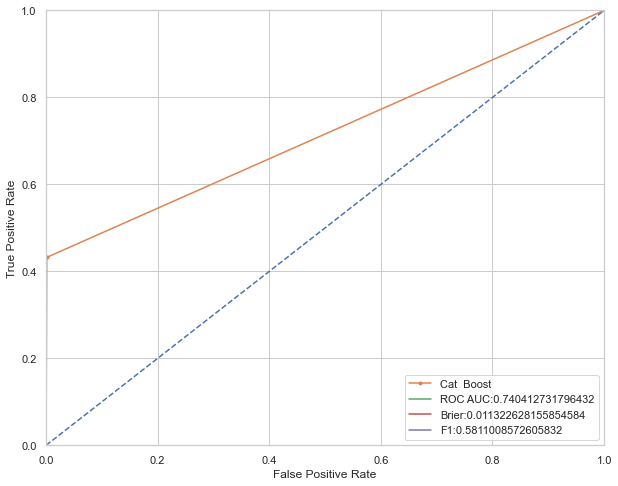

In [834]:
cb_class1_probs = cb.predict_proba(x_test)[:,1]
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, cb_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Cat  Boost')
plt.plot(0, label = 'ROC AUC:'+str(cb_roc_auc))

plt.plot(0, label = 'Brier:'+str(cb_brier))
plt.plot(0, label = 'F1:'+str(cb_f1))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [835]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    cb_thresh_predicts = cb_class1_probs > threshold
    precision = precision_score(y_test, cb_thresh_predicts)
    recall = recall_score(y_test, cb_thresh_predicts)
    f1 = f1_score(y_test, cb_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.01 | Accuracy = 0.155, Completeness = 0.941 | F1 = 0.266
Threshold = 0.02 | Accuracy = 0.243, Completeness = 0.890 | F1 = 0.382
Threshold = 0.03 | Accuracy = 0.321, Completeness = 0.856 | F1 = 0.467
Threshold = 0.04 | Accuracy = 0.375, Completeness = 0.856 | F1 = 0.522
Threshold = 0.05 | Accuracy = 0.413, Completeness = 0.822 | F1 = 0.550
Threshold = 0.06 | Accuracy = 0.453, Completeness = 0.822 | F1 = 0.584
Threshold = 0.07 | Accuracy = 0.497, Completeness = 0.805 | F1 = 0.615
Threshold = 0.08 | Accuracy = 0.540, Completeness = 0.805 | F1 = 0.646
Threshold = 0.09 | Accuracy = 0.554, Completeness = 0.780 | F1 = 0.648
Threshold = 0.10 | Accuracy = 0.582, Completeness = 0.780 | F1 = 0.667
Threshold = 0.11 | Accuracy = 0.600, Completeness = 0.763 | F1 = 0.672
Threshold = 0.12 | Accuracy = 0.611, Completeness = 0.746 | F1 = 0.672
Threshold = 0.13 | Accuracy = 0.614, Completeness = 0.729 | F1 = 0.667
Thresh

In [836]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    cb_thresh_predicts = cb_class1_probs > threshold
    f1 = f1_score(y_test, cb_thresh_predicts)
    if f1_list.max() == f1:
        cb_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", cb_best_threshold)

def custom_predict_cb(X, threshold):
    
    return (cb_class1_probs > threshold).astype(int)
    
    
cb_thresh_predicts = custom_predict_cb(X = x_test, threshold = cb_best_threshold) 

cb_thresh_cm= confusion_matrix(y_test, cb_thresh_predicts)
print("\Cat Boost Confusion Matrix:\n")
print(cb_thresh_cm)

print(classification_report(y_test, cb_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.680 and best threshold is: 0.18
\Cat Boost Confusion Matrix:

[[5372   43]
 [  35   83]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5415
           1       0.66      0.70      0.68       118

    accuracy                           0.99      5533
   macro avg       0.83      0.85      0.84      5533
weighted avg       0.99      0.99      0.99      5533



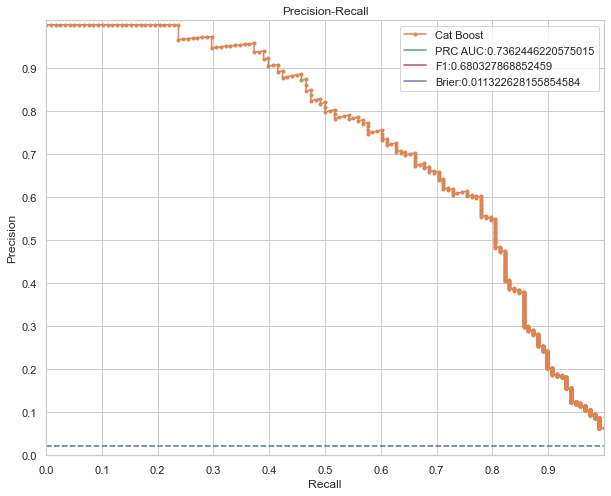

In [837]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, cb_class1_probs)
cb_thresh_f1, cb_prc_auc = f1_score(y_test, cb_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Cat Boost')
plt.plot(0,label='PRC AUC:'+str(cb_prc_auc))

plt.plot(0,label='F1:'+str(cb_thresh_f1))
plt.plot(0,label='Brier:'+str(cb_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

***Hyperparameter Tuning***

In [838]:


cb_params = {
    
    'learning_rate': [0.01,0.05, 0.1],
    
"max_ctr_complexity":[1,2,3,4,5],
'n_estimators': [10, 100, 500, 1000, 2000],
"score_function" : ["L2", "Cosine"],
'subsample': [0.6, 0.8, 1.0],
'max_depth': [3, 4, 5,6, 10],
"min_child_samples":[2,3,4,5,10]}

    
    
             
            

cb_tuned = RandomizedSearchCV(cb, 
                           cb_params, 
                           cv = cv,
                           n_iter=50,
                           scoring = 'f1',   
                           n_jobs = -1, 
                           verbose = 2) 


cb_tuned.fit(x_train, y_train)
print("En iyi parametreler: " + str(cb_tuned.best_params_))

cb_tuned= CatBoostClassifier(
                     learning_rate=cb_tuned.best_params_["learning_rate"],
                     
                     max_depth=cb_tuned.best_params_["max_depth"],
               max_ctr_complexity=cb_tuned.best_params_["max_ctr_complexity"],
               score_function=cb_tuned.best_params_["score_function"],
               
                             subsample=cb_tuned.best_params_["subsample"],
                             min_child_samples=cb_tuned.best_params_["min_child_samples"],
    n_estimators=cb_tuned.best_params_["n_estimators"],
                             verbose=False
                        
              
                     )
                              

cb_tuned.fit(x_train, y_train)

cb_tuned_predicts= cb_tuned.predict(x_test)

cb_tuned_class1_probs =cb_tuned.predict_proba(x_test)[:, 1]

cb_tuned_cm= confusion_matrix(y_test, cb_tuned_predicts)
print("\nCat Boost Confusion Matrix:\n")
print(cb_tuned_cm)

print(classification_report(y_test, cb_tuned_predicts, target_names=target_names))

print("--- %s seconds ---" % (time.time() - start_time))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
En iyi parametreler: {'subsample': 0.8, 'score_function': 'L2', 'n_estimators': 2000, 'min_child_samples': 3, 'max_depth': 4, 'max_ctr_complexity': 5, 'learning_rate': 0.1}

Cat Boost Confusion Matrix:

[[5405   10]
 [  63   55]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.85      0.47      0.60       118

    accuracy                           0.99      5533
   macro avg       0.92      0.73      0.80      5533
weighted avg       0.99      0.99      0.98      5533

--- 2242.387332677841 seconds ---


In [839]:


cb_tuned_f1 = cross_val_score(cb_tuned, x, y, cv=cv, scoring='f1').mean()
print("Cat Boost doğrulanmış f1 skoru:", cb_tuned_f1)

#---------------------------------



cb_tuned_brier = -1*cross_val_score(cb_tuned, x, y, cv=cv, scoring='neg_brier_score').mean()
print("\nCat Boost doğrulanmış brier skoru:", cb_tuned_brier)

#---------------------------------


cb_tuned_roc_auc = cross_val_score(cb_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)).mean()
print("\nCat Boost doğrulanmış roc-auc skoru:", cb_tuned_roc_auc)


print("--- %s seconds ---" % (time.time() - start_time))

Cat Boost doğrulanmış f1 skoru: 0.5871756311446662

Cat Boost doğrulanmış brier skoru: 0.012308523017630232

Cat Boost doğrulanmış roc-auc skoru: 0.7350017635435192
--- 2375.32212972641 seconds ---


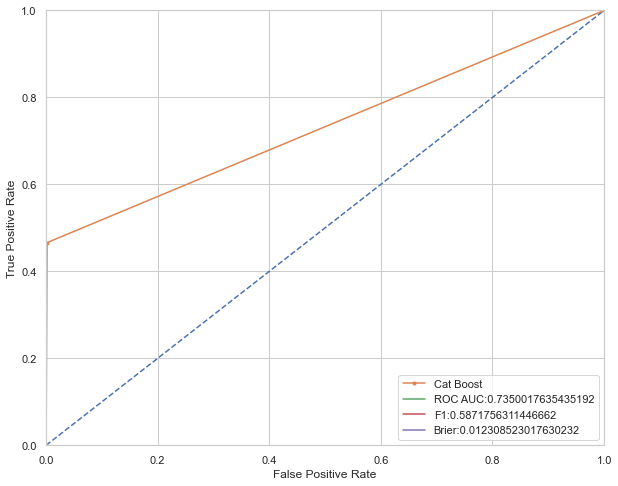

In [840]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, cb_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Cat Boost')
plt.plot(0, label = 'ROC AUC:'+str(cb_tuned_roc_auc))

plt.plot(0, label = 'F1:'+str(cb_tuned_f1))
plt.plot(0, label = 'Brier:'+str(cb_tuned_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [841]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    cb_tuned_thresh_predicts = cb_tuned_class1_probs > threshold
    precision = precision_score(y_test, cb_tuned_thresh_predicts)
    recall = recall_score(y_test, cb_tuned_thresh_predicts)
    f1 = f1_score(y_test, cb_tuned_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.01 | Accuracy = 0.409, Completeness = 0.780 | F1 = 0.536
Threshold = 0.02 | Accuracy = 0.492, Completeness = 0.737 | F1 = 0.590
Threshold = 0.03 | Accuracy = 0.564, Completeness = 0.712 | F1 = 0.629
Threshold = 0.04 | Accuracy = 0.590, Completeness = 0.695 | F1 = 0.638
Threshold = 0.05 | Accuracy = 0.604, Completeness = 0.686 | F1 = 0.643
Threshold = 0.06 | Accuracy = 0.615, Completeness = 0.678 | F1 = 0.645
Threshold = 0.07 | Accuracy = 0.655, Completeness = 0.661 | F1 = 0.658
Threshold = 0.08 | Accuracy = 0.675, Completeness = 0.653 | F1 = 0.664
Threshold = 0.09 | Accuracy = 0.694, Completeness = 0.653 | F1 = 0.672
Threshold = 0.10 | Accuracy = 0.704, Completeness = 0.644 | F1 = 0.673
Threshold = 0.11 | Accuracy = 0.728, Completeness = 0.636 | F1 = 0.679
Threshold = 0.12 | Accuracy = 0.745, Completeness = 0.619 | F1 = 0.676
Threshold = 0.13 | Accuracy = 0.750, Completeness = 0.610 | F1 = 0.673
Thresh

In [842]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    cb_tuned_thresh_predicts = cb_tuned_class1_probs > threshold
    f1 = f1_score(y_test, cb_tuned_thresh_predicts)
    if f1_list.max() == f1:
        cb_tuned_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", cb_tuned_best_threshold)

def custom_predict_cb_tuned(X, threshold):
    
    return (cb_tuned_class1_probs > threshold).astype(int)
    
    
cb_tuned_thresh_predicts = custom_predict_cb_tuned(X = x_test, threshold = cb_tuned_best_threshold) 

cb_tuned_thresh_cm= confusion_matrix(y_test, cb_tuned_thresh_predicts)
print("\nCat Boost Confusion Matrix:\n")
print(cb_tuned_thresh_cm)

print(classification_report(y_test, cb_tuned_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.679 and best threshold is: 0.11

Cat Boost Confusion Matrix:

[[5387   28]
 [  43   75]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5415
           1       0.73      0.64      0.68       118

    accuracy                           0.99      5533
   macro avg       0.86      0.82      0.84      5533
weighted avg       0.99      0.99      0.99      5533



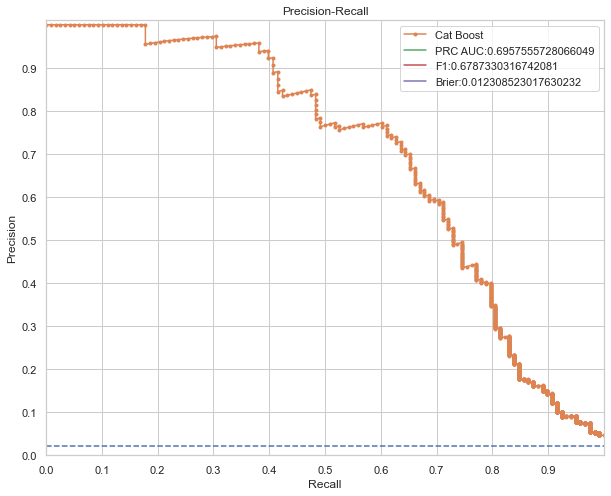

In [843]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, cb_tuned_class1_probs)
cb_tuned_thresh_f1, cb_tuned_prc_auc = f1_score(y_test, cb_tuned_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Cat Boost')
plt.plot(0,label='PRC AUC:'+str(cb_tuned_prc_auc))

plt.plot(0,label='F1:'+str(cb_tuned_thresh_f1))
plt.plot(0,label='Brier:'+str(cb_tuned_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

In [844]:
cb_tuned_df_test_class1_probs = cb_tuned.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]
cb_df_test_class1_probs = cb.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]

cb_df_test_f1 = f1_score(df_forwards_model_test.Target, cb.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(cb_df_test_f1)

def custom_predict_cb_df_test(X, threshold):
    
    return (cb_df_test_class1_probs > threshold).astype(int)
    
cb_df_test_thresh_f1 = f1_score(df_forwards_model_test.Target, custom_predict_cb_df_test(X = df_forwards_model_test.drop(columns=["PA","Target"]), 
                                                                  threshold = cb_best_threshold))

print(cb_df_test_thresh_f1)

cb_tuned_df_test_f1 = f1_score(df_forwards_model_test.Target, cb_tuned.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(cb_tuned_df_test_f1)

def custom_predict_cb_tuned_df_test(X, threshold):
    
    return (cb_tuned_df_test_class1_probs > threshold).astype(int)
    
cb_tuned_thresh_df_test_f1=f1_score(df_forwards_model_test.Target, custom_predict_cb_tuned_df_test(X = df_forwards_model_test.drop(columns=["PA",
                                                                                                        "Target"]), threshold = cb_tuned_best_threshold))

print(cb_tuned_thresh_df_test_f1)

0.5652173913043479
0.6527196652719666
0.5789473684210525
0.6406926406926408


### Light GBM

In [845]:
lg= LGBMClassifier()
lg.fit(x_train, y_train)

lg_predicts= lg.predict(x_test)
lg_cm= confusion_matrix(y_test, lg_predicts)
print("\nLight GBM Confusion Matrix:\n")
print(lg_cm)

print(classification_report(y_test, lg_predicts, target_names=target_names))


Light GBM Confusion Matrix:

[[5402   13]
 [  63   55]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.81      0.47      0.59       118

    accuracy                           0.99      5533
   macro avg       0.90      0.73      0.79      5533
weighted avg       0.98      0.99      0.98      5533



In [846]:


lg_f1 = cross_val_score(lg, x, y, cv=cv, scoring='f1').mean()
print("Light GBM doğrulanmış f1 skoru:", lg_f1)

#---------------------------------


lg_brier = -1*cross_val_score(lg, x, y, cv=cv, scoring='neg_brier_score').mean()
print("\nLight GBM doğrulanmış brier skoru:", lg_brier)

#---------------------------------



lg_roc_auc = cross_val_score(lg, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)).mean()
print("\nLight GBM doğrulanmış roc-auc skoru:", lg_roc_auc)

print("--- %s seconds ---" % (time.time() - start_time))

Light GBM doğrulanmış f1 skoru: 0.5796011860137729

Light GBM doğrulanmış brier skoru: 0.011962168523619933

Light GBM doğrulanmış roc-auc skoru: 0.7282288025831143
--- 2378.092871904373 seconds ---


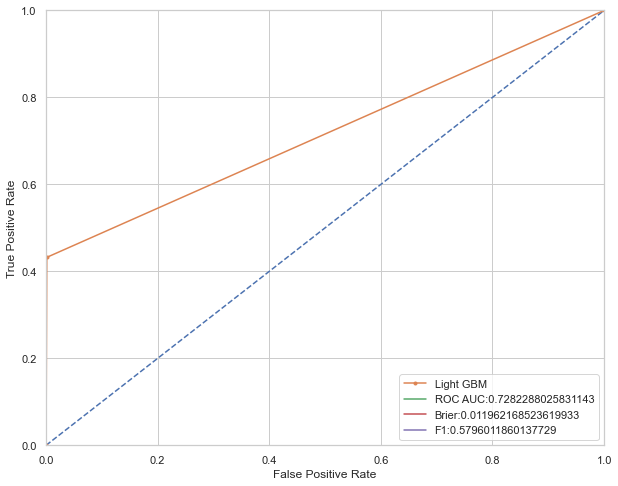

In [847]:
lg_class1_probs = lg.predict_proba(x_test)[:,1]
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, cb_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Light GBM')
plt.plot(0, label = 'ROC AUC:'+str(lg_roc_auc))

plt.plot(0, label = 'Brier:'+str(lg_brier))
plt.plot(0, label = 'F1:'+str(lg_f1))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [848]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    lg_thresh_predicts = lg_class1_probs > threshold
    precision = precision_score(y_test, lg_thresh_predicts)
    recall = recall_score(y_test, lg_thresh_predicts)
    f1 = f1_score(y_test, lg_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.01 | Accuracy = 0.365, Completeness = 0.814 | F1 = 0.504
Threshold = 0.02 | Accuracy = 0.449, Completeness = 0.788 | F1 = 0.572
Threshold = 0.03 | Accuracy = 0.486, Completeness = 0.746 | F1 = 0.589
Threshold = 0.04 | Accuracy = 0.518, Completeness = 0.729 | F1 = 0.606
Threshold = 0.05 | Accuracy = 0.544, Completeness = 0.678 | F1 = 0.604
Threshold = 0.06 | Accuracy = 0.571, Completeness = 0.678 | F1 = 0.620
Threshold = 0.07 | Accuracy = 0.582, Completeness = 0.661 | F1 = 0.619
Threshold = 0.08 | Accuracy = 0.605, Completeness = 0.661 | F1 = 0.632
Threshold = 0.09 | Accuracy = 0.626, Completeness = 0.653 | F1 = 0.639
Threshold = 0.10 | Accuracy = 0.636, Completeness = 0.636 | F1 = 0.636
Threshold = 0.11 | Accuracy = 0.647, Completeness = 0.636 | F1 = 0.641
Threshold = 0.12 | Accuracy = 0.658, Completeness = 0.636 | F1 = 0.647
Threshold = 0.13 | Accuracy = 0.664, Completeness = 0.636 | F1 = 0.649
Thresh

In [849]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    lg_thresh_predicts = lg_class1_probs > threshold
    f1 = f1_score(y_test, lg_thresh_predicts)
    if f1_list.max() == f1:
        lg_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", lg_best_threshold)

def custom_predict_lg(X, threshold):
    
    return (lg_class1_probs > threshold).astype(int)
    
    
lg_thresh_predicts = custom_predict_lg(X = x_test, threshold = lg_best_threshold) 

lg_thresh_cm= confusion_matrix(y_test, lg_thresh_predicts)
print("\Cat Boost Confusion Matrix:\n")
print(lg_thresh_cm)

print(classification_report(y_test, lg_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.667 and best threshold is: 0.19
\Cat Boost Confusion Matrix:

[[5387   28]
 [  45   73]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5415
           1       0.72      0.62      0.67       118

    accuracy                           0.99      5533
   macro avg       0.86      0.81      0.83      5533
weighted avg       0.99      0.99      0.99      5533



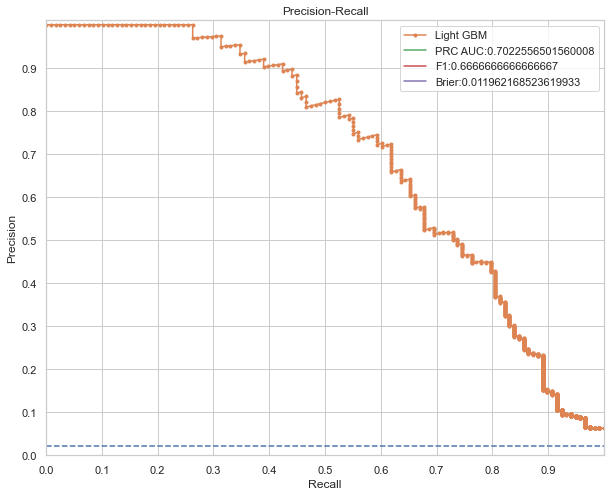

In [850]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, lg_class1_probs)
lg_thresh_f1, lg_prc_auc = f1_score(y_test, lg_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Light GBM')
plt.plot(0,label='PRC AUC:'+str(lg_prc_auc))

plt.plot(0,label='F1:'+str(lg_thresh_f1))
plt.plot(0,label='Brier:'+str(lg_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

***Hyperparameter Tuning***

In [851]:


lg_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.4,0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]
              
              }



    
    
             
            

lg_tuned = RandomizedSearchCV(lg, 
                           lg_params, 
                           cv = cv,
                           n_iter=50,
                           scoring = 'f1',   
                           n_jobs = -1, 
                           verbose = 2) 


lg_tuned.fit(x_train, y_train)
print("En iyi parametreler: " + str(lg_tuned.best_params_))

lg_tuned= LGBMClassifier(
                     
                     
                     n_estimators=lg_tuned.best_params_["n_estimators"],
               subsample=lg_tuned.best_params_["subsample"],
               max_depth=lg_tuned.best_params_["max_depth"],
               
                             learning_rate=lg_tuned.best_params_["learning_rate"],
                             min_child_samples=lg_tuned.best_params_["min_child_samples"]
    
    
                        
              
                     )
                              

lg_tuned.fit(x_train, y_train)

lg_tuned_predicts= lg_tuned.predict(x_test)

lg_tuned_class1_probs =lg_tuned.predict_proba(x_test)[:, 1]

lg_tuned_cm= confusion_matrix(y_test, lg_tuned_predicts)
print("\nlight GBM Confusion Matrix:\n")
print(lg_tuned_cm)

print(classification_report(y_test, lg_tuned_predicts, target_names=target_names))


print("--- %s seconds ---" % (time.time() - start_time))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
En iyi parametreler: {'subsample': 1.0, 'n_estimators': 2000, 'min_child_samples': 10, 'max_depth': 3, 'learning_rate': 0.05}

light GBM Confusion Matrix:

[[5403   12]
 [  65   53]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5415
           1       0.82      0.45      0.58       118

    accuracy                           0.99      5533
   macro avg       0.90      0.72      0.79      5533
weighted avg       0.98      0.99      0.98      5533

--- 2413.0084817409515 seconds ---


In [852]:

lg_tuned_f1 = cross_val_score(lg_tuned, x, y, cv=cv, scoring='f1').mean()
print("Light GBM doğrulanmış f1 skoru:", lg_tuned_f1)

#---------------------------------




lg_tuned_brier = -1*cross_val_score(lg_tuned, x, y, cv=cv, scoring='neg_brier_score').mean()
print("\nLight GBM doğrulanmış brier skoru:", lg_tuned_brier)

#---------------------------------


lg_tuned_roc_auc = cross_val_score(lg_tuned, x, y, cv=cv, scoring=make_scorer(roc_auc_score, greater_is_better=True)).mean()
print("\nLight GBM doğrulanmış roc-auc skoru:", lg_tuned_roc_auc)

Light GBM doğrulanmış f1 skoru: 0.5710517543338753

Light GBM doğrulanmış brier skoru: 0.01237727387078741

Light GBM doğrulanmış roc-auc skoru: 0.7278973718825589


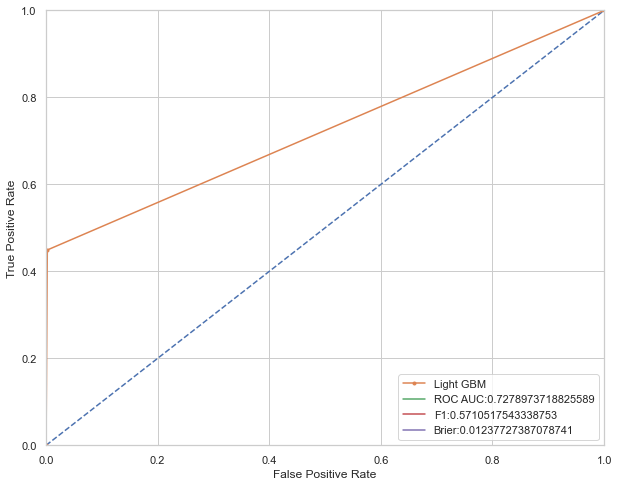

In [853]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, lg_tuned_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Light GBM')
plt.plot(0, label = 'ROC AUC:'+str(lg_tuned_roc_auc))

plt.plot(0, label = 'F1:'+str(lg_tuned_f1))
plt.plot(0, label = 'Brier:'+str(lg_tuned_brier))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [854]:
f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    lg_tuned_thresh_predicts = lg_tuned_class1_probs > threshold
    precision = precision_score(y_test,lg_tuned_thresh_predicts)
    recall = recall_score(y_test, lg_tuned_thresh_predicts)
    f1 = f1_score(y_test, lg_tuned_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.021, Completeness = 1.000 | F1 = 0.042
Threshold = 0.01 | Accuracy = 0.413, Completeness = 0.780 | F1 = 0.540
Threshold = 0.02 | Accuracy = 0.517, Completeness = 0.771 | F1 = 0.619
Threshold = 0.03 | Accuracy = 0.561, Completeness = 0.737 | F1 = 0.637
Threshold = 0.04 | Accuracy = 0.614, Completeness = 0.729 | F1 = 0.667
Threshold = 0.05 | Accuracy = 0.625, Completeness = 0.720 | F1 = 0.669
Threshold = 0.06 | Accuracy = 0.641, Completeness = 0.712 | F1 = 0.675
Threshold = 0.07 | Accuracy = 0.669, Completeness = 0.703 | F1 = 0.686
Threshold = 0.08 | Accuracy = 0.684, Completeness = 0.678 | F1 = 0.681
Threshold = 0.09 | Accuracy = 0.690, Completeness = 0.678 | F1 = 0.684
Threshold = 0.10 | Accuracy = 0.691, Completeness = 0.644 | F1 = 0.667
Threshold = 0.11 | Accuracy = 0.697, Completeness = 0.644 | F1 = 0.670
Threshold = 0.12 | Accuracy = 0.704, Completeness = 0.644 | F1 = 0.673
Threshold = 0.13 | Accuracy = 0.712, Completeness = 0.627 | F1 = 0.667
Thresh

In [855]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    lg_tuned_thresh_predicts = lg_tuned_class1_probs > threshold
    f1 = f1_score(y_test, lg_tuned_thresh_predicts)
    if f1_list.max() == f1:
        lg_tuned_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", lg_tuned_best_threshold)

def custom_predict_lg_tuned(X, threshold):
    
    return (lg_tuned_class1_probs > threshold).astype(int)
    
    
lg_tuned_thresh_predicts = custom_predict_lg_tuned(X = x_test, threshold = lg_tuned_best_threshold) 

lg_tuned_thresh_cm= confusion_matrix(y_test, lg_tuned_thresh_predicts)
print("\nLight GBM Confusion Matrix:\n")
print(lg_tuned_thresh_cm)

print(classification_report(y_test, lg_tuned_thresh_predicts, target_names=target_names))

Maximum f1 score is: 0.686 and best threshold is: 0.07

Light GBM Confusion Matrix:

[[5374   41]
 [  35   83]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5415
           1       0.67      0.70      0.69       118

    accuracy                           0.99      5533
   macro avg       0.83      0.85      0.84      5533
weighted avg       0.99      0.99      0.99      5533



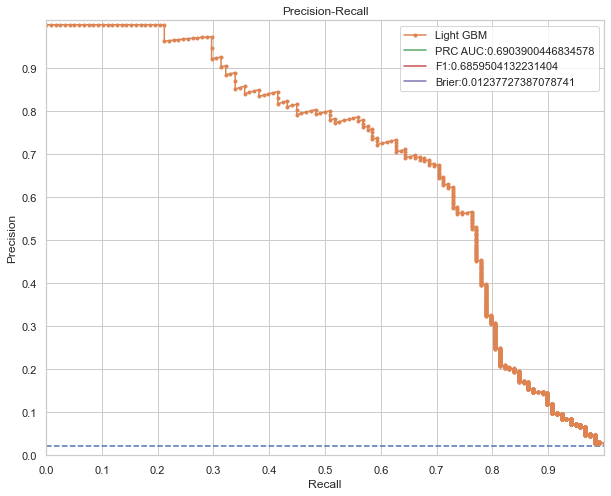

In [856]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, lg_tuned_class1_probs)
lg_tuned_thresh_f1, lg_tuned_prc_auc = f1_score(y_test, lg_tuned_thresh_predicts), auc(recall, precision)

sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Light GBM')
plt.plot(0,label='PRC AUC:'+str(lg_tuned_prc_auc))

plt.plot(0,label='F1:'+str(lg_tuned_thresh_f1))
plt.plot(0,label='Brier:'+str(lg_tuned_brier))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

In [857]:
lg_tuned_df_test_class1_probs = lg_tuned.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]
lg_df_test_class1_probs = lg.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]

lg_df_test_f1 = f1_score(df_forwards_model_test.Target, lg.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(lg_df_test_f1)

def custom_predict_lg_df_test(X, threshold):
    
    return (lg_df_test_class1_probs > threshold).astype(int)
    
lg_df_test_thresh_f1 = f1_score(df_forwards_model_test.Target, custom_predict_lg_df_test(X = df_forwards_model_test.drop(columns=["PA","Target"]), 
                                                                  threshold = lg_best_threshold))

print(lg_df_test_thresh_f1)

lg_tuned_df_test_f1 = f1_score(df_forwards_model_test.Target, lg_tuned.predict(df_forwards_model_test.drop(columns=["PA","Target"])))

print(lg_tuned_df_test_f1)

def custom_predict_lg_tuned_df_test(X, threshold):
    
    return (lg_tuned_df_test_class1_probs > threshold).astype(int)
    
lg_tuned_thresh_df_test_f1=f1_score(df_forwards_model_test.Target, custom_predict_lg_tuned_df_test(X = df_forwards_model_test.drop(columns=["PA",
                                                                                                        "Target"]), threshold = lg_tuned_best_threshold))

print(lg_tuned_thresh_df_test_f1)

0.5303867403314917
0.6037735849056604
0.5347593582887701
0.6795366795366795


### Results

In [915]:
model_names = ['Light GBM', 'Random Forest', 'Bagging', 'GBM', 'Ada Boost', 'Extra Trees', 'Naive Bayes','XG Boost', 
               'Cat Boost']



brier = [lg_brier, rf_brier, bag_brier, gbc_brier, ada_brier, et_brier, nb_brier,  xg_brier, cb_brier]

tuned_brier =[lg_tuned_brier, rf_tuned_brier, bag_tuned_brier, gbc_tuned_brier, ada_tuned_brier,  et_tuned_brier, nb_tuned_brier, 
               xg_tuned_brier, cb_tuned_brier]

f1 = [lg_f1, rf_f1, bag_f1, gbc_f1, ada_f1,  et_f1, nb_f1,  xg_f1, cb_f1]

thresh_f1=[lg_thresh_f1, rf_thresh_f1, bag_thresh_f1, gbc_thresh_f1, ada_thresh_f1,  et_thresh_f1, nb_thresh_f1,  
           xg_thresh_f1, cb_thresh_f1]

tuned_f1 = [lg_tuned_f1, rf_tuned_f1, bag_tuned_f1, gbc_tuned_f1, ada_tuned_f1,  et_tuned_f1, nb_tuned_f1, xg_tuned_f1, 
            cb_tuned_f1]

tuned_thresh_f1=[lg_tuned_thresh_f1, rf_tuned_thresh_f1, bag_tuned_thresh_f1, gbc_tuned_thresh_f1, ada_tuned_thresh_f1, 
                et_tuned_thresh_f1, nb_tuned_thresh_f1,  xg_tuned_thresh_f1, cb_tuned_thresh_f1]

df_test_f1 = [lg_df_test_f1, rf_df_test_f1, bag_df_test_f1, gbc_df_test_f1, ada_df_test_f1, et_df_test_f1, nb_df_test_f1, xg_df_test_f1, cb_df_test_f1]

df_test_thresh_f1 = [lg_df_test_thresh_f1, rf_df_test_thresh_f1, bag_df_test_thresh_f1, gbc_df_test_thresh_f1, ada_df_test_thresh_f1,
                    et_df_test_thresh_f1, nb_df_test_thresh_f1, xg_df_test_thresh_f1, cb_df_test_thresh_f1]

df_test_tuned_f1 = [lg_tuned_df_test_f1, rf_tuned_df_test_f1, bag_tuned_df_test_f1, gbc_tuned_df_test_f1, ada_tuned_df_test_f1,
                   et_tuned_df_test_f1, nb_tuned_df_test_f1, xg_tuned_df_test_f1, cb_tuned_df_test_f1]

df_test_tuned_thresh_f1 = [lg_tuned_thresh_df_test_f1, rf_tuned_thresh_df_test_f1, bag_tuned_thresh_df_test_f1, gbc_tuned_thresh_df_test_f1,
                          ada_tuned_thresh_df_test_f1, et_tuned_thresh_df_test_f1, nb_tuned_thresh_df_test_f1, xg_tuned_thresh_df_test_f1,
                          cb_tuned_thresh_df_test_f1]

roc_auc = [lg_roc_auc, rf_roc_auc, bag_roc_auc, gbc_roc_auc, ada_roc_auc,  et_roc_auc, nb_roc_auc, xg_roc_auc, cb_roc_auc]

prc_auc =[lg_prc_auc, rf_prc_auc, bag_prc_auc, gbc_prc_auc, ada_prc_auc,  et_prc_auc, nb_prc_auc,  xg_prc_auc, cb_prc_auc]

tuned_roc_auc = [lg_tuned_roc_auc, rf_tuned_roc_auc, bag_tuned_roc_auc, gbc_tuned_roc_auc, ada_tuned_roc_auc,  et_tuned_roc_auc,
                nb_tuned_roc_auc, xg_tuned_roc_auc, cb_tuned_roc_auc]

tuned_prc_auc =[lg_tuned_prc_auc, rf_tuned_prc_auc, bag_tuned_prc_auc, gbc_tuned_prc_auc, ada_tuned_prc_auc,  et_tuned_prc_auc,
               nb_tuned_prc_auc,  xg_tuned_prc_auc, cb_tuned_prc_auc]

In [916]:
model_compare = pd.DataFrame({'Model': model_names, 'Brier': brier,'Tuned Brier': tuned_brier, 'F1': f1,'Thresh F1': thresh_f1,
             'Tuned F1': tuned_f1, 'Tuned Thresh F1': tuned_thresh_f1, 'Test F1':df_test_f1, 'Test Thresh F1':df_test_thresh_f1, 'Test Tuned F1':
              df_test_tuned_f1, 'Test Tuned Thresh F1':df_test_tuned_thresh_f1, 'Roc Auc': roc_auc, 'Prc Auc': prc_auc, 'Tuned Roc Auc': tuned_roc_auc,
             'Tuned Prc Auc': tuned_prc_auc})

In [917]:
model_compare.sort_values(by='Tuned F1', ascending = False)

,Model,Brier,Tuned Brier,F1,Thresh F1,Tuned F1,Tuned Thresh F1,Test F1,Test Thresh F1,Test Tuned F1,Test Tuned Thresh F1,Roc Auc,Prc Auc,Tuned Roc Auc,Tuned Prc Auc
7,XG Boost,0.011870,0.011630,0.598443,0.672646,0.596694,0.686441,0.550265,0.578947,0.583784,0.652893,0.739165,0.701605,0.740413,0.721304
3,GBM,0.012757,0.010845,0.529090,0.637450,0.587991,0.675799,0.483516,0.581673,0.580000,0.590308,0.709746,0.666052,0.740119,0.694263
4,Ada Boost,0.207043,0.227807,0.525088,0.598985,0.587325,0.616216,0.500000,0.500000,0.567010,0.567010,0.721122,0.614891,0.736379,0.682011
8,Cat Boost,0.011323,0.012309,0.581101,0.680328,0.587176,0.678733,0.565217,0.652720,0.578947,0.640693,0.740413,0.736245,0.735002,0.695756
0,Light GBM,0.011962,0.012377,0.579601,0.666667,0.571052,0.685950,0.530387,0.603774,0.534759,0.679537,0.728229,0.702256,0.727897,0.690390
5,Extra Trees,0.012934,0.016168,0.392900,0.654206,0.561637,0.644628,0.368421,0.576577,0.528497,0.555556,0.623055,0.699828,0.730364,0.672910
1,Random Forest,0.012707,0.012975,0.449548,0.615385,0.420855,0.633484,0.384615,0.609442,0.379085,0.596491,0.649939,0.669213,0.642397,0.664469
6,Naive Bayes,0.075668,0.071612,0.293412,0.385965,0.299379,0.394191,0.328990,0.376033,0.328308,0.398249,0.869812,0.620240,0.868619,0.615593
2,Bagging,0.014430,0.024723,0.457095,0.568528,0.000000,0.000000,0.424242,0.556054,0.000000,0.000000,0.656795,0.589844,0.500000,0.510663


In [930]:
df_forwards_test["Target_pred"]=custom_predict_lg_tuned_df_test(X = df_forwards_model_test.drop(columns=["PA","Target"]), 
                                                          threshold = lg_tuned_best_threshold)
                                                                                                        

In [931]:
df_forwards_test["class1_probs"]=lg_tuned.predict_proba(df_forwards_model_test.drop(columns=["PA","Target"]))[:, 1]

In [932]:
df_forwards_test["class1_probs"]=df_forwards_test.class1_probs*100

In [934]:
confusion_matrix(df_forwards_test.Target, df_forwards_test.Target_pred)

array([[4646,   48],
       [  35,   88]], dtype=int64)

In [935]:
print(classification_report(df_forwards_test.Target, df_forwards_test.Target_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4694
           1       0.65      0.72      0.68       123

    accuracy                           0.98      4817
   macro avg       0.82      0.85      0.84      4817
weighted avg       0.98      0.98      0.98      4817



In [947]:
confusion_matrix(df_forwards_test[(df_forwards_test["class1_probs"])>7].Target, 
                            df_forwards_test[(df_forwards_test["class1_probs"])>7].Target_pred)

array([[ 0, 48],
       [ 0, 88]], dtype=int64)

In [950]:
print(classification_report(df_forwards_test[(df_forwards_test["class1_probs"])>7].Target, 
                            df_forwards_test[(df_forwards_test["class1_probs"])>7].Target_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.65      1.00      0.79        88

    accuracy                           0.65       136
   macro avg       0.32      0.50      0.39       136
weighted avg       0.42      0.65      0.51       136



In [949]:
confusion_matrix(df_forwards_test[(df_forwards_test["class1_probs"])>68].Target, 
                            df_forwards_test[(df_forwards_test["class1_probs"])>68].Target_pred)

array([[ 0,  8],
       [ 0, 48]], dtype=int64)

In [951]:
print(classification_report(df_forwards_test[(df_forwards_test["class1_probs"])>68].Target, 
                            df_forwards_test[(df_forwards_test["class1_probs"])>68].Target_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.86      1.00      0.92        48

    accuracy                           0.86        56
   macro avg       0.43      0.50      0.46        56
weighted avg       0.73      0.86      0.79        56



In [961]:
# Elit seviyede olma olasılığı en yüksek olan 20 futbolcu
df_forwards_test[["Name", "Club", "Age", "PA", "Target", "Target_pred", "class1_probs"]].sort_values(
    by='class1_probs', ascending = False)[0:20]

,Name,Club,Age,PA,Target,Target_pred,class1_probs
4666,Kylian MbappÃ©,Paris SG,20,196,1,1,100.000000
4808,Eden Hazard,R. Madrid,28,185,1,1,99.999993
3403,Ansu Fati,Barcelona,16,181,1,1,99.999941
316,Jadon Sancho,Borussia Dortmund,19,178,1,1,99.999643
1292,Leroy SanÃ©,FC Bayern,23,177,1,1,99.999340
1262,Bukayo Saka,Arsenal,17,158,1,1,99.997797
968,Zlatan Ibrahimovic,Milan,37,185,1,1,99.994790
4760,Malcom,Zenit,22,163,1,1,99.994166
1995,Riyad Mahrez,Man City,28,163,1,1,99.991365
2183,Serge Gnabry,FC Bayern,23,170,1,1,99.990942


In [ ]:
'''
df_forwards_test[["Name", "Club", "Age", "PA", "Target", "Target_pred", "class1_probs"]][(df_forwards_test["Age"] <25)].sort_values(
    by='class1_probs', ascending = False)[40:60]
'''

**Elit seviye potansiyele sahip olma olasılığı %68'in üstünde olan futbolcuların %92'si elit seviye potansiyele sahiptir**

In [869]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 2429.6582601070404 seconds ---


### Regression

In [976]:
df_forwards_reg = df_forwards_test

In [978]:
x_forwards_reg = df_forwards_reg.drop(columns=["Name","Club","PA", "Division", "Best Pos", "Target", "Target_pred"])
y_forwards_reg = df_forwards_reg["PA"]
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_forwards_reg, y_forwards_reg, test_size=0.33, random_state=3)

In [984]:
df_forwards_reg_test=x_test.copy()

In [985]:
df_forwards_reg_test["class1_probs"]=lg_tuned.predict_proba(df_forwards_reg_test)[:, 1]
df_forwards_reg_test["class1_probs"]=df_forwards_reg_test.class1_probs*100

In [987]:
'''
df_forwards_reg_test.rename(columns = {'Target':'Target_real', "Target_pred":"Target"}, inplace = True)
#swapping two columns
def df_column_switch(df, column1, column2):
    i = list(df_forwards_reg_test.columns)
    a, b = i.index(column1), i.index(column2)
    i[b], i[a] = i[a], i[b]
    df = df[i]
    return df

df_forwards_reg_test=df_column_switch(df_forwards_reg_test,'Target_real','Target')

'''

'\ndf_forwards_reg_test.rename(columns = {\'Target\':\'Target_real\', "Target_pred":"Target"}, inplace = True)\n#swapping two columns\ndef df_column_switch(df, column1, column2):\n    i = list(df_forwards_reg_test.columns)\n    a, b = i.index(column1), i.index(column2)\n    i[b], i[a] = i[a], i[b]\n    df = df[i]\n    return df\n\ndf_forwards_reg_test=df_column_switch(df_forwards_reg_test,\'Target_real\',\'Target\')\n\n'

#### Random Forest

In [988]:

rf_forwards_reg = RandomForestRegressor().fit(x_train_reg, y_train_reg)

In [989]:
rf_forwards_reg_predicts = rf_forwards_reg.predict(x_test_reg)

In [990]:

metrics.mean_absolute_error(rf_forwards_reg_predicts, 
                            y_test_reg)

6.958207547169812

In [991]:
rf_mae = -cross_val_score(rf_forwards_reg, x_forwards_reg, y_forwards_reg, cv=cv, scoring="neg_mean_absolute_error").mean()

In [992]:
rf_params_reg = {
              
             "max_depth": [2,5,8,None],
             "min_samples_leaf":[1, 2, 3, 5, 10],
            "max_features": ['sqrt',5, 'auto'],
            "n_estimators": [100,200,500],
            "min_samples_split": [2,5,10]}

In [993]:
rf_forwards_tuned_reg = GridSearchCV(rf_forwards_reg, 
                           rf_params_reg, 
                           cv = 3,
                           
                           scoring = 'neg_mean_absolute_error',
                           n_jobs = -1, 
                           verbose = 2) 

rf_forwards_tuned_reg.fit(x_train_reg, y_train_reg)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, None],
                         'max_features': ['sqrt', 5, 'auto'],
                         'min_samples_leaf': [1, 2, 3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='neg_mean_absolute_error', verbose=2)

In [994]:
print("En iyi parametreler: " + str(rf_forwards_tuned_reg.best_params_))

En iyi parametreler: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 500}


In [995]:
rf_forwards_tuned_reg= RandomForestRegressor(
                                 max_depth=rf_forwards_tuned_reg.best_params_["max_depth"],
                                max_features=rf_forwards_tuned_reg.best_params_["max_features"],
                                min_samples_leaf=rf_forwards_tuned_reg.best_params_["min_samples_leaf"],
                                min_samples_split=rf_forwards_tuned_reg.best_params_["min_samples_split"],
                                
                                n_estimators=rf_forwards_tuned_reg.best_params_["n_estimators"])

In [996]:
rf_forwards_tuned_reg.fit(x_train_reg, y_train_reg)

RandomForestRegressor(min_samples_leaf=3, min_samples_split=5, n_estimators=500)

In [997]:
rf_forwards_tuned_reg_predicts = rf_forwards_tuned_reg.predict(x_test_reg)

In [998]:
metrics.mean_absolute_error(rf_forwards_tuned_reg_predicts, 
                            y_test_reg)

6.879652625988275

In [999]:
rf_tuned_mae = -cross_val_score(rf_forwards_tuned_reg, x_forwards_reg, y_forwards_reg, cv=cv, scoring="neg_mean_absolute_error").mean()

In [1003]:
df_forwards_reg_test

,Height,Weight,Age,Wor,Vis,Tec,Tea,Str,Sta,Pos,Pen,Pas,Pac,OtB,Nat,Lon,Ldr,Jum,Hea,Fre,Fla,Fir,Fin,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Bra,Bal,Ant,Agi,Agg,Acc,Preferred Foot_Left,Preferred Foot_Right,class1_probs
11178,184,75,17,12,10,12,10,9,12,9,10,11,12,12,7,10,9,10,15,9,9,10,10,13,11,10,10,9,10,9,10,10,14,11,10,13,0.0,1.0,3.000162e-01
12203,172,72,30,9,9,9,8,9,14,8,11,9,11,14,13,9,4,7,14,8,14,14,14,14,11,14,8,8,9,12,5,9,11,13,10,14,0.0,1.0,2.791999e-04
1942,181,71,18,7,4,10,6,7,11,4,9,5,12,13,16,7,10,6,13,6,10,12,13,13,12,12,2,6,6,11,8,2,11,12,8,13,0.0,1.0,4.158477e-04
5976,192,86,25,8,8,11,7,13,6,6,7,8,12,13,14,8,7,13,13,7,13,11,13,13,10,13,8,5,8,8,9,8,13,8,12,13,1.0,0.0,1.010308e-07
13316,180,78,36,14,11,13,10,13,11,7,13,10,12,15,11,11,9,12,14,10,11,13,14,11,9,11,9,8,10,9,17,12,13,11,16,12,0.0,1.0,8.279898e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525,184,78,24,13,8,12,11,11,13,9,8,8,12,13,14,9,5,11,12,6,11,13,12,10,7,8,10,7,10,10,11,13,11,10,8,11,0.0,1.0,1.115474e-04
16379,180,72,29,14,10,12,14,11,13,11,11,12,12,12,14,12,10,10,11,7,5,12,9,11,11,13,12,6,11,11,13,11,13,11,8,13,0.0,1.0,1.722911e-03
12122,164,57,27,12,11,11,11,6,11,6,5,9,12,12,12,9,13,4,7,7,12,12,10,13,18,14,11,6,11,9,10,9,10,14,15,13,0.0,1.0,3.832849e-04
5753,178,68,18,9,9,11,7,5,12,5,4,8,14,10,12,6,9,6,14,7,12,13,13,14,17,8,7,6,8,8,8,7,7,14,5,14,0.0,1.0,1.136963e-04


In [1009]:
rf_test_mae = metrics.mean_absolute_error(rf_forwards_reg.predict(df_forwards_reg_test), df_forwards.loc[df_forwards_reg_test.index].PA)

rf_tuned_test_mae = metrics.mean_absolute_error(rf_forwards_tuned_reg.predict(df_forwards_reg_test), 
                                                                       df_forwards.loc[df_forwards_reg_test.index].PA)



#### Linear Regression

In [1010]:
lr_forwards_reg = LinearRegression().fit(x_train_reg, y_train_reg)
lr_forwards_reg_predicts = lr_forwards_reg.predict(x_test_reg)
print("MAE:",metrics.mean_absolute_error(lr_forwards_reg_predicts, 
                            y_test_reg))
lr_mae=-cross_val_score(lr_forwards_reg, x_forwards_reg, y_forwards_reg, cv=cv, scoring="neg_mean_absolute_error").mean()
print("\nDoğrulamış MAE:",lr_mae)
lr_tuned_mae=None

MAE: 7.5716039425861235

Doğrulamış MAE: 7.635363594915833


In [1011]:
lr_test_mae =metrics.mean_absolute_error(lr_forwards_reg.predict(df_forwards_reg_test), 
                            df_forwards.loc[df_forwards_reg_test.index].PA)
lr_tuned_test_mae=None

#### PLS

In [1012]:
pls_forwards_reg = PLSRegression().fit(x_train_reg, y_train_reg)
pls_forwards_reg_predicts = pls_forwards_reg.predict(x_test_reg)
print("MAE:",metrics.mean_absolute_error(pls_forwards_reg_predicts, 
                            y_test_reg))
pls_mae= -cross_val_score(pls_forwards_reg, x_forwards_reg, y_forwards_reg, cv=cv, scoring="neg_mean_absolute_error").mean()
print("\nDoğrulamış MAE:",pls_mae)
pls_tuned_mae=None

MAE: 7.767601395027379

Doğrulamış MAE: 7.922402563834927


In [1013]:
pls_test_mae=metrics.mean_absolute_error(pls_forwards_reg.predict(df_forwards_reg_test), 
                            df_forwards.loc[df_forwards_reg_test.index].PA)
pls_tuned_test_mae = None

#### Ridge

In [1014]:
rg_forwards_reg = Ridge().fit(x_train_reg, y_train_reg)
rg_forwards_reg_predicts = rg_forwards_reg.predict(x_test_reg)
print("MAE:",metrics.mean_absolute_error(rg_forwards_reg_predicts, 
                            y_test_reg))
rg_mae = -cross_val_score(rg_forwards_reg, x_forwards_reg, y_forwards_reg, cv=cv, scoring="neg_mean_absolute_error").mean()
print("\nDoğrulamış MAE:",)

MAE: 7.571366861966799

Doğrulamış MAE:


In [1015]:
rg_test_mae=metrics.mean_absolute_error(rg_forwards_reg.predict(df_forwards_reg_test), 
                            df_forwards.loc[df_forwards_reg_test.index].PA)

In [1016]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=lambdalar, 
                   scoring="neg_mean_absolute_error")

ridge_cv.fit(x_train_reg, y_train_reg)
ridge_cv.alpha_

1.004616501282523

In [1017]:
rg_forwards_tuned_reg = Ridge(alpha=ridge_cv.alpha_).fit(x_train_reg, y_train_reg)
rg_forwards_tuned_reg_predicts = rg_forwards_tuned_reg.predict(x_test_reg)
print("MAE:",metrics.mean_absolute_error(rg_forwards_tuned_reg_predicts, 
                            y_test_reg))
rg_tuned_mae=-cross_val_score(rg_forwards_tuned_reg, x_forwards_reg, y_forwards_reg, cv=cv, scoring="neg_mean_absolute_error").mean()
print("\nDoğrulamış MAE:",rg_tuned_mae)

MAE: 7.571365788003607

Doğrulamış MAE: 7.635325674487447


In [1018]:
rg_tuned_test_mae=metrics.mean_absolute_error(rg_forwards_tuned_reg.predict(df_forwards_reg_test), 
                            df_forwards.loc[df_forwards_reg_test.index].PA)

#### Lasso

In [1019]:
ls_forwards_reg = Lasso().fit(x_train_reg, y_train_reg)
ls_forwards_reg_predicts = ls_forwards_reg.predict(x_test_reg)
print("MAE:",metrics.mean_absolute_error(ls_forwards_reg_predicts, 
                            y_test_reg))
ls_mae=-cross_val_score(ls_forwards_reg, x_forwards_reg, y_forwards_reg, cv=cv, scoring="neg_mean_absolute_error").mean()
print("\nDoğrulamış MAE:",ls_mae)
ls_tuned_mae=None

MAE: 7.716902712651909

Doğrulamış MAE: 7.794418131418551


In [1020]:
ls_test_mae=metrics.mean_absolute_error(ls_forwards_reg.predict(df_forwards_reg_test), 
                            df_forwards.loc[df_forwards_reg_test.index].PA)
ls_tuned_test_mae=None

#### Elastic Net

In [1021]:
en_forwards_reg = ElasticNet().fit(x_train_reg, y_train_reg)
en_forwards_reg_predicts = en_forwards_reg.predict(x_test_reg)
print("MAE:",metrics.mean_absolute_error(en_forwards_reg_predicts, 
                            y_test_reg))
en_mae=-cross_val_score(en_forwards_reg, x_forwards_reg, y_forwards_reg, cv=cv, scoring="neg_mean_absolute_error").mean()
print("\nDoğrulamış MAE:",en_mae)

MAE: 7.645890118923895

Doğrulamış MAE: 7.722698173837069


In [1022]:
en_forwards_tuned_reg = ElasticNetCV(cv=10, random_state=3).fit(x_train_reg, y_train_reg)

In [1023]:
en_forwards_tuned_reg = ElasticNet(alpha=en_forwards_tuned_reg.alpha_).fit(x_train_reg, y_train_reg)
en_forwards_tuned_reg_predicts = en_forwards_tuned_reg.predict(x_test_reg)
print("MAE:",metrics.mean_absolute_error(en_forwards_tuned_reg_predicts, 
                            y_test_reg))
en_tuned_mae=-cross_val_score(en_forwards_tuned_reg, x_forwards_reg, y_forwards_reg, cv=cv, scoring="neg_mean_absolute_error").mean()
print("\nDoğrulamış MAE:",en_tuned_mae)

MAE: 7.580176757399699

Doğrulamış MAE: 7.654354003095972


In [1024]:
en_tuned_test_mae=metrics.mean_absolute_error(en_forwards_tuned_reg.predict(df_forwards_reg_test), 
                            df_forwards.loc[df_forwards_reg_test.index].PA)

en_test_mae=metrics.mean_absolute_error(en_forwards_reg.predict(df_forwards_reg_test), 
                            df_forwards.loc[df_forwards_reg_test.index].PA)

#### KNN

In [1025]:
knn_forwards_reg = KNeighborsRegressor().fit(x_train_reg, y_train_reg)
knn_forwards_reg_predicts = knn_forwards_reg.predict(x_test_reg)
print("MAE:",metrics.mean_absolute_error(knn_forwards_reg_predicts, 
                            y_test_reg))
knn_mae = -cross_val_score(knn_forwards_reg, x_forwards_reg, y_forwards_reg, cv=cv, scoring="neg_mean_absolute_error").mean()
print("\nDoğrulamış MAE:",knn_mae)

MAE: 7.464025157232704

Doğrulamış MAE: 7.692242732126006


In [1026]:
knn_params = {'n_neighbors': np.arange(1,30,1)}

In [1027]:
knn_forwards_tuned_reg = GridSearchCV(knn_forwards_reg, knn_params, cv = 10)
knn_forwards_tuned_reg.fit(x_train_reg, y_train_reg)
knn_forwards_tuned_reg.best_params_["n_neighbors"]

18

In [1028]:
knn_forwards_tuned_reg = KNeighborsRegressor(knn_forwards_tuned_reg.best_params_["n_neighbors"]).fit(x_train_reg, y_train_reg)
knn_forwards_tuned_reg_predicts = knn_forwards_tuned_reg.predict(x_test_reg)
print("MAE:",metrics.mean_absolute_error(knn_forwards_tuned_reg_predicts, 
                            y_test_reg))
knn_tuned_mae = -cross_val_score(knn_forwards_tuned_reg, x_forwards_reg, y_forwards_reg, cv=cv, scoring="neg_mean_absolute_error").mean()
print("\nDoğrulamış MAE:",knn_tuned_mae)

MAE: 7.388364779874214

Doğrulamış MAE: 7.450051669733098


In [1029]:
knn_test_mae=metrics.mean_absolute_error(knn_forwards_reg.predict(df_forwards_reg_test), 
                            df_forwards.loc[df_forwards_reg_test.index].PA)

knn_tuned_test_mae=metrics.mean_absolute_error(knn_forwards_tuned_reg.predict(df_forwards_reg_test), 
                           df_forwards.loc[df_forwards_reg_test.index].PA)

#### SVM

In [1030]:
svr_forwards_reg = SVR().fit(x_train_reg, y_train_reg)
svr_forwards_reg_predicts = svr_forwards_reg.predict(x_test_reg)
print("MAE:",metrics.mean_absolute_error(svr_forwards_reg_predicts, 
                            y_test_reg))
svr_mae=-cross_val_score(svr_forwards_reg, x_forwards_reg, y_forwards_reg, cv=cv, scoring="neg_mean_absolute_error").mean()
print("\nDoğrulamış MAE:",svr_mae)

MAE: 8.84976411073474

Doğrulamış MAE: 8.721872703907442


In [1031]:
svr_test_mae=metrics.mean_absolute_error(svr_forwards_reg.predict(df_forwards_reg_test), 
                            df_forwards.loc[df_forwards_reg_test.index].PA)
svr_tuned_mae=None
svr_tuned_test_mae=None

#### GBM

In [1032]:
gbc_forwards_reg = GradientBoostingRegressor().fit(x_train_reg, y_train_reg)
gbc_forwards_reg_predicts = gbc_forwards_reg.predict(x_test_reg)
print("MAE:",metrics.mean_absolute_error(gbc_forwards_reg_predicts, 
                            y_test_reg))
gbc_mae=-cross_val_score(gbc_forwards_reg, x_forwards_reg, y_forwards_reg, cv=cv, scoring="neg_mean_absolute_error").mean()
print("\nDoğrulamış MAE:",gbc_mae)

MAE: 6.703551216991246

Doğrulamış MAE: 6.812831858993036


In [1033]:
gbc_forwards_tuned_reg = GridSearchCV(gbc_forwards_reg, 
                           gbc_params, 
                           cv = 3,
                           
                           scoring = 'neg_mean_absolute_error',
                           n_jobs = -1, 
                           verbose = 2) 

gbc_forwards_tuned_reg.fit(x_train_reg, y_train_reg)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [100, 500, 1000]},
             scoring='neg_mean_absolute_error', verbose=2)

In [1034]:
print("En iyi parametreler: " + str(gbc_forwards_tuned_reg.best_params_))

En iyi parametreler: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}


In [1035]:
gbc_forwards_tuned_reg= GradientBoostingRegressor(
                                 learning_rate=gbc_forwards_tuned_reg.best_params_["learning_rate"],
                                max_depth=gbc_forwards_tuned_reg.best_params_["max_depth"],
                                n_estimators=gbc_forwards_tuned_reg.best_params_["n_estimators"])

In [1036]:
gbc_forwards_tuned_reg.fit(x_train_reg, y_train_reg)
gbc_forwards_tuned_reg_predicts = gbc_forwards_tuned_reg.predict(x_test_reg)
print("MAE:",metrics.mean_absolute_error(gbc_forwards_tuned_reg_predicts, 
                            y_test_reg))
gbc_tuned_mae=-cross_val_score(gbc_forwards_tuned_reg, x_forwards_reg, y_forwards_reg, cv=cv, scoring="neg_mean_absolute_error").mean()
print("\nDoğrulamış MAE:",gbc_tuned_mae)

MAE: 6.714092926548528

Doğrulamış MAE: 6.777360590702498


In [1037]:
gbc_tuned_test_mae=metrics.mean_absolute_error(gbc_forwards_tuned_reg.predict(df_forwards_reg_test), 
                            df_forwards.loc[df_forwards_reg_test.index].PA)

gbc_test_mae=metrics.mean_absolute_error(gbc_forwards_reg.predict(df_forwards_reg_test), 
                            df_forwards.loc[df_forwards_reg_test.index].PA)

#### XG Boost

In [1038]:
xg_forwards_reg = XGBRegressor().fit(x_train_reg, y_train_reg)
xg_forwards_reg_predicts = xg_forwards_reg.predict(x_test_reg)
print("MAE:",metrics.mean_absolute_error(xg_forwards_reg_predicts, 
                            y_test_reg))
xg_mae=-cross_val_score(xg_forwards_reg, x_forwards_reg, y_forwards_reg, cv=cv, scoring="neg_mean_absolute_error").mean()
print("\nDoğrulamış MAE:",xg_mae)

MAE: 7.061215022824845

Doğrulamış MAE: 7.058388880590551


In [1039]:
xg_forwards_tuned_reg = RandomizedSearchCV(xg_forwards_reg, 
                           xg_params, 
                           cv = 3,
                           n_iter=200,
                           scoring = 'neg_mean_absolute_error',
                           n_jobs = -1, 
                           verbose = 2) 

xg_forwards_tuned_reg.fit(x_train_reg, y_train_reg)

print("En iyi parametreler: " + str(xg_forwards_tuned_reg.best_params_))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
En iyi parametreler: {'subsample': 0.6, 'n_estimators': 1000, 'min_samples_split': 10, 'max_leaves': 1, 'max_depth': 6, 'learning_rate': 0.01}


In [1040]:
xg_forwards_tuned_reg= XGBRegressor(
                                 subsample=xg_forwards_tuned_reg.best_params_["subsample"],
                                n_estimators=xg_forwards_tuned_reg.best_params_["n_estimators"],
                                min_samples_split=xg_forwards_tuned_reg.best_params_["min_samples_split"],
max_leaves=xg_forwards_tuned_reg.best_params_["max_leaves"],
                                max_depth=xg_forwards_tuned_reg.best_params_["max_depth"],
                                learning_rate=xg_forwards_tuned_reg.best_params_["learning_rate"])

xg_forwards_tuned_reg.fit(x_train_reg, y_train_reg)
xg_forwards_tuned_reg_predicts = xg_forwards_tuned_reg.predict(x_test_reg)
print("MAE:",metrics.mean_absolute_error(xg_forwards_tuned_reg_predicts, 
                            y_test_reg))
xg_tuned_mae=-cross_val_score(xg_forwards_tuned_reg, x_forwards_reg, y_forwards_reg, cv=cv, scoring="neg_mean_absolute_error").mean()
print("\nDoğrulamış MAE:",-cross_val_score(xg_forwards_tuned_reg, x_forwards_reg, y_forwards_reg, cv=cv, scoring="neg_mean_absolute_error").mean())

MAE: 6.542598657188176

Doğrulamış MAE: 6.6240750466411


In [1041]:
xg_tuned_test_mae =metrics.mean_absolute_error(xg_forwards_tuned_reg.predict(df_forwards_reg_test), 
                            df_forwards.loc[df_forwards_reg_test.index].PA)

xg_test_mae=metrics.mean_absolute_error(xg_forwards_reg.predict(df_forwards_reg_test), 
                            df_forwards.loc[df_forwards_reg_test.index].PA)

#### Light GBM

In [1042]:
lg_forwards_reg = LGBMRegressor().fit(x_train_reg, y_train_reg)
lg_forwards_reg_predicts = lg_forwards_reg.predict(x_test_reg)
print("MAE:",metrics.mean_absolute_error(lg_forwards_reg_predicts, 
                            y_test_reg))
lg_mae = -cross_val_score(lg_forwards_reg, x_forwards_reg, y_forwards_reg, cv=cv, scoring="neg_mean_absolute_error").mean()
print("\nDoğrulamış MAE:",lg_mae)

MAE: 6.718292961109663

Doğrulamış MAE: 6.754953225831768


In [1043]:
lg_forwards_tuned_reg = RandomizedSearchCV(lg_forwards_reg, 
                           lg_params, 
                           cv = 3,
                           n_iter=200,
                           scoring = 'neg_mean_absolute_error',
                           n_jobs = -1, 
                           verbose = 2) 

lg_forwards_tuned_reg.fit(x_train_reg, y_train_reg)

print("En iyi parametreler: " + str(lg_forwards_tuned_reg.best_params_))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
En iyi parametreler: {'subsample': 0.4, 'n_estimators': 1000, 'min_child_samples': 20, 'max_depth': 3, 'learning_rate': 0.02}


In [1044]:
lg_forwards_tuned_reg= LGBMRegressor(
                                 subsample=lg_forwards_tuned_reg.best_params_["subsample"],
                                n_estimators=lg_forwards_tuned_reg.best_params_["n_estimators"],
                                min_child_samples=lg_forwards_tuned_reg.best_params_["min_child_samples"],

                                max_depth=lg_forwards_tuned_reg.best_params_["max_depth"],
                                learning_rate=lg_forwards_tuned_reg.best_params_["learning_rate"])

lg_forwards_tuned_reg.fit(x_train_reg, y_train_reg)
lg_forwards_tuned_reg_predicts = lg_forwards_tuned_reg.predict(x_test_reg)
print("MAE:",metrics.mean_absolute_error(lg_forwards_tuned_reg_predicts, 
                            y_test_reg))

lg_tuned_mae =-cross_val_score(lg_forwards_tuned_reg, x_forwards_reg, y_forwards_reg, cv=cv, scoring="neg_mean_absolute_error").mean()
print("\nDoğrulamış MAE:",lg_tuned_mae)

MAE: 6.610394103730577

Doğrulamış MAE: 6.704368492374485


In [1045]:
lg_tuned_test_mae=metrics.mean_absolute_error(lg_forwards_tuned_reg.predict(df_forwards_reg_test), 
                            df_forwards.loc[df_forwards_reg_test.index].PA)

lg_test_mae = metrics.mean_absolute_error(lg_forwards_reg.predict(df_forwards_reg_test), 
                            df_forwards.loc[df_forwards_reg_test.index].PA)

#### Cat Boost

In [1046]:
cb_forwards_reg = CatBoostRegressor(verbose=False).fit(x_train_reg, y_train_reg)
cb_forwards_reg_predicts = cb_forwards_reg.predict(x_test_reg)
print("MAE:",metrics.mean_absolute_error(cb_forwards_reg_predicts, 
                            y_test_reg))
cb_mae = -cross_val_score(cb_forwards_reg, x_forwards_reg, y_forwards_reg, cv=cv, scoring="neg_mean_absolute_error").mean()
print("\nDoğrulamış MAE:",cb_mae)

MAE: 6.557828352487742

Doğrulamış MAE: 6.609256868491043


In [1047]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 6333.996568441391 seconds ---


In [1048]:
cb_forwards_tuned_reg = RandomizedSearchCV(cb_forwards_reg, 
                           cb_params, 
                           cv = 3,
                           n_iter=100,
                           scoring = 'neg_mean_absolute_error',
                           n_jobs = -1, 
                           verbose = 2) 

cb_forwards_tuned_reg.fit(x_train_reg, y_train_reg)

print("En iyi parametreler: " + str(cb_forwards_tuned_reg.best_params_))
print("--- %s seconds ---" % (time.time() - start_time))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
En iyi parametreler: {'subsample': 0.6, 'score_function': 'L2', 'n_estimators': 2000, 'min_child_samples': 10, 'max_depth': 6, 'max_ctr_complexity': 2, 'learning_rate': 0.01}
--- 6518.706576347351 seconds ---


In [1049]:
cb_forwards_tuned_reg= CatBoostRegressor(verbose=False,
                                 subsample=cb_forwards_tuned_reg.best_params_["subsample"],
                                n_estimators=cb_forwards_tuned_reg.best_params_["n_estimators"],
                                min_child_samples=cb_forwards_tuned_reg.best_params_["min_child_samples"],

                                max_depth=cb_forwards_tuned_reg.best_params_["max_depth"],
                                learning_rate=cb_forwards_tuned_reg.best_params_["learning_rate"],
max_ctr_complexity=cb_forwards_tuned_reg.best_params_["max_ctr_complexity"],
                                score_function=cb_forwards_tuned_reg.best_params_["score_function"])

cb_forwards_tuned_reg.fit(x_train_reg, y_train_reg)
cb_forwards_tuned_reg_predicts = cb_forwards_tuned_reg.predict(x_test_reg)
print("MAE:",metrics.mean_absolute_error(cb_forwards_tuned_reg_predicts, 
                            y_test_reg))
cb_tuned_mae=-cross_val_score(cb_forwards_tuned_reg, x_forwards_reg, y_forwards_reg, cv=cv, scoring="neg_mean_absolute_error").mean()
print("\nDoğrulamış MAE:",cb_tuned_mae)

MAE: 6.546786461746572

Doğrulamış MAE: 6.6513237667226806


In [1050]:
cb_test_mae=metrics.mean_absolute_error(cb_forwards_reg.predict(df_forwards_reg_test), 
                            df_forwards.loc[df_forwards_reg_test.index].PA)

cb_tuned_test_mae=metrics.mean_absolute_error(cb_forwards_tuned_reg.predict(df_forwards_reg_test), 
                            df_forwards.loc[df_forwards_reg_test.index].PA)

#### Bagging Regression

In [1051]:
bag_forwards_reg = BaggingRegressor().fit(x_train_reg, y_train_reg)
bag_forwards_reg_predicts = bag_forwards_reg.predict(x_test_reg)
print("MAE:",metrics.mean_absolute_error(bag_forwards_reg_predicts, 
                            y_test_reg))
bag_mae = -cross_val_score(bag_forwards_reg, x_forwards_reg, y_forwards_reg, cv=cv, scoring="neg_mean_absolute_error").mean()
print("\nDoğrulamış MAE:",bag_mae)

MAE: 7.245220125786164

Doğrulamış MAE: 7.325416316576399


In [1052]:
bag_forwards_tuned_reg = RandomizedSearchCV(bag_forwards_reg, 
                           bag_params, 
                           cv = 3,
                           n_iter=100,
                           scoring = 'neg_mean_absolute_error',
                           n_jobs = -1, 
                           verbose = 2) 

bag_forwards_tuned_reg.fit(x_train_reg, y_train_reg)

print("En iyi parametreler: " + str(bag_forwards_tuned_reg.best_params_))

Fitting 3 folds for each of 64 candidates, totalling 192 fits
En iyi parametreler: {'n_estimators': 100, 'max_samples': 5, 'max_features': 10}


In [1053]:
bag_forwards_tuned_reg= BaggingRegressor(
                                 n_estimators=bag_forwards_tuned_reg.best_params_["n_estimators"],
                                max_samples=bag_forwards_tuned_reg.best_params_["max_samples"],
                                max_features=bag_forwards_tuned_reg.best_params_["max_features"])

bag_forwards_tuned_reg.fit(x_train_reg, y_train_reg)
bag_forwards_tuned_reg_predicts = bag_forwards_tuned_reg.predict(x_test_reg)
print("MAE:",metrics.mean_absolute_error(bag_forwards_tuned_reg_predicts, 
                            y_test_reg))
bag_tuned_mae=-cross_val_score(bag_forwards_tuned_reg, x_forwards_reg, y_forwards_reg, cv=cv, scoring="neg_mean_absolute_error").mean()
print("\nDoğrulamış MAE:",bag_tuned_mae)

MAE: 9.895182389937107

Doğrulamış MAE: 9.398200837631364


In [1054]:
bag_test_mae=metrics.mean_absolute_error(bag_forwards_reg.predict(df_forwards_reg_test), 
                            df_forwards.loc[df_forwards_reg_test.index].PA)

bag_tuned_test_mae=metrics.mean_absolute_error(bag_forwards_tuned_reg.predict(df_forwards_reg_test), 
                            df_forwards.loc[df_forwards_reg_test.index].PA)

#### Ada Boost Regression

In [1055]:
ada_forwards_reg = AdaBoostRegressor().fit(x_train_reg, y_train_reg)
ada_forwards_reg_predicts = ada_forwards_reg.predict(x_test_reg)
print("MAE:",metrics.mean_absolute_error(ada_forwards_reg_predicts, 
                            y_test_reg))
ada_mae = -cross_val_score(ada_forwards_reg, x_forwards_reg, y_forwards_reg, cv=cv, scoring="neg_mean_absolute_error").mean()
print("\nDoğrulamış MAE:",ada_mae)

MAE: 8.156240166822124

Doğrulamış MAE: 8.376778164726257


In [1056]:
ada_forwards_tuned_reg = RandomizedSearchCV(ada_forwards_reg, 
                           ada_params, 
                           cv = 3,
                           n_iter=100,
                           scoring = 'neg_mean_absolute_error',
                           n_jobs = -1, 
                           verbose = 2) 

ada_forwards_tuned_reg.fit(x_train_reg, y_train_reg)

print("En iyi parametreler: " + str(ada_forwards_tuned_reg.best_params_))

Fitting 3 folds for each of 28 candidates, totalling 84 fits
En iyi parametreler: {'n_estimators': 50, 'learning_rate': 0.01}


In [1057]:
ada_forwards_tuned_reg= AdaBoostRegressor(
                                 n_estimators=ada_forwards_tuned_reg.best_params_["n_estimators"],
                                learning_rate=ada_forwards_tuned_reg.best_params_["learning_rate"])

ada_forwards_tuned_reg.fit(x_train_reg, y_train_reg)
ada_forwards_tuned_reg_predicts = ada_forwards_tuned_reg.predict(x_test_reg)
print("MAE:",metrics.mean_absolute_error(ada_forwards_tuned_reg_predicts, 
                            y_test_reg))
ada_tuned_mae=-cross_val_score(ada_forwards_tuned_reg, x_forwards_reg, y_forwards_reg, cv=cv, scoring="neg_mean_absolute_error").mean()
print("\nDoğrulamış MAE:",ada_tuned_mae)

MAE: 7.4973843707053645

Doğrulamış MAE: 7.691285477425444


In [1058]:
ada_test_mae=metrics.mean_absolute_error(ada_forwards_reg.predict(df_forwards_reg_test), 
                            df_forwards.loc[df_forwards_reg_test.index].PA)

ada_tuned_test_mae=metrics.mean_absolute_error(ada_forwards_tuned_reg.predict(df_forwards_reg_test), 
                            df_forwards.loc[df_forwards_reg_test.index].PA)

##### Naive Bayes

In [1059]:
nb_forwards_reg = GaussianNB().fit(x_train_reg, y_train_reg)
nb_forwards_reg_predicts = nb_forwards_reg.predict(x_test_reg)
print("MAE:",metrics.mean_absolute_error(nb_forwards_reg_predicts, 
                            y_test_reg))
nb_mae = -cross_val_score(nb_forwards_reg, x_forwards_reg, y_forwards_reg, cv=cv, scoring="neg_mean_absolute_error").mean()
print("\nDoğrulamış MAE:",nb_mae)

MAE: 9.19182389937107

Doğrulamış MAE: 9.738020018700206


In [1060]:
nb_forwards_tuned_reg = GridSearchCV(nb_forwards_reg, 
                           nb_params, 
                           cv = 3,
                          
                           scoring = 'neg_mean_absolute_error',
                           n_jobs = -1, 
                           verbose = 2) 

nb_forwards_tuned_reg.fit(x_train_reg, y_train_reg)

print("En iyi parametreler: " + str(nb_forwards_tuned_reg.best_params_))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
En iyi parametreler: {'var_smoothing': 1e-05}


In [1061]:
nb_forwards_tuned_reg= GaussianNB(
                                 var_smoothing=nb_forwards_tuned_reg.best_params_["var_smoothing"])

nb_forwards_tuned_reg.fit(x_train_reg, y_train_reg)
nb_forwards_tuned_reg_predicts = nb_forwards_tuned_reg.predict(x_test_reg)
print("MAE:",metrics.mean_absolute_error(nb_forwards_tuned_reg_predicts, 
                            y_test_reg))
nb_tuned_mae=-cross_val_score(nb_forwards_tuned_reg, x_forwards_reg, y_forwards_reg, cv=cv, scoring="neg_mean_absolute_error").mean()
print("\nDoğrulamış MAE:",nb_tuned_mae)

MAE: 9.10188679245283

Doğrulamış MAE: 8.693734569098124


In [1062]:
nb_test_mae=metrics.mean_absolute_error(nb_forwards_reg.predict(df_forwards_reg_test), 
                            df_forwards.loc[df_forwards_reg_test.index].PA)

nb_tuned_test_mae=metrics.mean_absolute_error(nb_forwards_tuned_reg.predict(df_forwards_reg_test), 
                            df_forwards.loc[df_forwards_reg_test.index].PA)

#### Results

In [1063]:
model_names = ['Random Forest', 'Linear Reg', 'PLS', 'Ridge', 'Lasso', 'Elastic Net', 'KNN','SVM', 
               "GBM","XG Boost","Light GBM",'Cat Boost', "Bagging", "Ada"]



mae = [rf_mae,lr_mae, pls_mae, rg_mae, ls_mae, en_mae, knn_mae,  svr_mae, gbc_mae, xg_mae, lg_mae, cb_mae, bag_mae, ada_mae]

tuned_mae =[rf_tuned_mae, lr_tuned_mae, pls_tuned_mae, rg_tuned_mae, ls_tuned_mae, en_tuned_mae, knn_tuned_mae,  svr_tuned_mae, gbc_tuned_mae,
            xg_tuned_mae, lg_tuned_mae, cb_tuned_mae, bag_tuned_mae, ada_tuned_mae]

mae_test = [rf_test_mae, lr_test_mae, pls_test_mae, rg_test_mae, ls_test_mae, en_test_mae, knn_test_mae,  svr_test_mae, gbc_test_mae,
            xg_test_mae, lg_test_mae, cb_test_mae, bag_test_mae, ada_test_mae]

mae_tuned_test=[rf_tuned_test_mae, lr_tuned_test_mae, pls_tuned_test_mae, rg_tuned_test_mae, ls_tuned_test_mae, en_tuned_test_mae, knn_tuned_test_mae,
                svr_tuned_test_mae, gbc_tuned_test_mae,
            xg_tuned_test_mae, lg_tuned_test_mae, cb_tuned_test_mae, bag_tuned_test_mae, ada_tuned_test_mae]



In [1064]:
model_compare_reg = pd.DataFrame({'Model': model_names, 'MAE': mae,'Tuned MAE': tuned_mae, 'Test MAE': mae_test,'Tuned Test MAE': mae_tuned_test})

In [1065]:
model_compare_reg.sort_values(by='Tuned Test MAE', ascending = True)

,Model,MAE,Tuned MAE,Test MAE,Tuned Test MAE
11,Cat Boost,6.609257,6.651324,6.470472,6.470247
9,XG Boost,7.058389,6.624075,7.094168,6.485547
10,Light GBM,6.754953,6.704368,6.612148,6.523626
8,GBM,6.812832,6.777361,6.694225,6.627981
0,Random Forest,7.019149,6.975706,6.945400,6.902189
6,KNN,7.692243,7.450052,7.638569,7.378015
3,Ridge,7.635326,7.635326,7.595925,7.595925
13,Ada,8.376778,7.691285,8.119713,7.599308
5,Elastic Net,7.722698,7.654354,7.675614,7.627068
12,Bagging,7.325416,9.398201,7.306217,9.602919


In [1066]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 6568.0528864860535 seconds ---


In [1069]:
df_forwards_reg_test["PA_pred"]=cb_forwards_tuned_reg.predict(df_forwards_reg_test)
                                                                                                    

In [1075]:
df_forwards.loc[df_forwards_reg_test.index]

,Name,Club,Division,Height,Weight,Age,Best Pos,PA,Wor,Vis,Tec,Tea,Str,Sta,Pos,Pen,Pas,Pac,OtB,Nat,Lon,Ldr,Jum,Hea,Fre,Fla,Fir,Fin,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Bra,Bal,Ant,Agi,Agg,Acc,Target,Preferred Foot_Left,Preferred Foot_Right
11178,Robert Lara,Fortaleza C.E.I.F.,Colombian Second Division,184,75,17,ST (C),130,12,10,12,10,9,12,9,10,11,12,12,7,10,9,10,15,9,9,10,10,13,11,10,10,9,10,9,10,10,14,11,10,13,0,0.0,1.0
12203,Lucas Dantas,Unknown,Unknown,172,72,30,ST (C),112,9,9,9,8,9,14,8,11,9,11,14,13,9,4,7,14,8,14,14,14,14,11,14,8,8,9,12,5,9,11,13,10,14,0,0.0,1.0
1942,Kevin Rojas,Deportes Melipilla,Unknown,181,71,18,ST (C),104,7,4,10,6,7,11,4,9,5,12,13,16,7,10,6,13,6,10,12,13,13,12,12,2,6,6,11,8,2,11,12,8,13,0,0.0,1.0
5976,Darlan,Mageense,Portugal Championship - Group D,192,86,25,ST (C),110,8,8,11,7,13,6,6,7,8,12,13,14,8,7,13,13,7,13,11,13,13,10,13,8,5,8,8,9,8,13,8,12,13,0,1.0,0.0
13316,David Barral,R. Santander,Spanish Second Division,180,78,36,ST (C),140,14,11,13,10,13,11,7,13,10,12,15,11,11,9,12,14,10,11,13,14,11,9,11,9,8,10,9,17,12,13,11,16,12,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525,HÃ¼samettin Yener,AltÄ±nordu,Turkish 1. League,184,78,24,AM (L),100,13,8,12,11,11,13,9,8,8,12,13,14,9,5,11,12,6,11,13,12,10,7,8,10,7,10,10,11,13,11,10,8,11,0,0.0,1.0
16379,Thorsten Schick,SK Rapid Vienna,Austrian Premier Division,180,72,29,M (R),118,14,10,12,14,11,13,11,11,12,12,12,14,12,10,10,11,7,5,12,9,11,11,13,12,6,11,11,13,11,13,11,8,13,0,0.0,1.0
12122,MatÃ­as Navarro,Dep. MaipÃº,Argentine Torneo Federal A,164,57,27,AM (R),107,12,11,11,11,6,11,6,5,9,12,12,12,9,13,4,7,7,12,12,10,13,18,14,11,6,11,9,10,9,10,14,15,13,0,0.0,1.0
5753,Sacha Guilhen,OM,French National 2 - D,178,68,18,ST (C),104,9,9,11,7,5,12,5,4,8,14,10,12,6,9,6,14,7,12,13,13,14,17,8,7,6,8,8,8,7,7,14,5,14,0,0.0,1.0


In [1079]:
df_forwards_reg_test["Name"]=df_forwards.loc[df_forwards_reg_test.index]["Name"]
df_forwards_reg_test["Club"]=df_forwards.loc[df_forwards_reg_test.index]["Club"]
df_forwards_reg_test["PA"]=df_forwards.loc[df_forwards_reg_test.index]["PA"]
df_forwards_reg_test["Target"]=df_forwards.loc[df_forwards_reg_test.index]["Target"]

In [1105]:
lg_df_test_class1_probs

array([2.51714851e-05, 3.62280072e-05, 5.57568640e-05, ...,
       2.22169732e-05, 2.04948230e-04, 1.86480144e-05])

In [1107]:
def custom_predict_lg_df_test_reg(X, threshold):
    
    return (df_forwards_reg_test.class1_probs > threshold).astype(int)

In [1110]:
df_forwards_reg_test["Target_pred"]=custom_predict_lg_df_test_reg(X = df_forwards_reg_test.drop(columns=["PA","Target","class1_probs", "PA_pred","Name","Club","Target"]),
                              threshold = lg_tuned_best_threshold)

In [1112]:
df_forwards_reg_test[["Name","Club","PA","PA_pred","Target","Target_pred","class1_probs"]].sort_values(by='PA', ascending = False)[0:20]
#df_forwards_reg_test[df_forwards_reg_test["class1_probs"]>21].sort_values(by='class1_probs',  ascending = False)[20:40]

,Name,Club,PA,PA_pred,Target,Target_pred,class1_probs
5342,Cristiano Ronaldo,Juventus,196,179.739595,1,1,99.999591
8918,Erling Haaland,Borussia Dortmund,189,165.248090,1,1,99.999887
2591,Harry Kane,Tottenham,185,173.400594,1,1,99.977395
15333,Mohamed Salah,Liverpool,184,175.974021,1,1,99.999958
12174,Dejan Kulusevski,Parma,183,165.066129,1,1,99.999817
14653,Paulo Dybala,Juventus,182,175.032616,1,1,99.999489
4606,Rodrygo,R. Madrid,182,155.698350,1,1,98.959717
9601,Ousmane DembÃ©lÃ©,Barcelona,181,162.346253,1,1,99.117155
6256,Troy Parrott,Ipswich,176,149.732227,1,1,23.808648
5945,Marcus Rashford,Man Utd,175,162.904975,1,1,99.905818


In [1113]:
metrics.mean_absolute_error(df_forwards_reg_test.PA, 
                            df_forwards_reg_test.PA_pred)

6.470247285092585

In [1115]:
metrics.mean_absolute_error(df_forwards_reg_test[df_forwards_reg_test["class1_probs"]>70].PA, 
                            df_forwards_reg_test[df_forwards_reg_test["class1_probs"]>70].PA_pred)

8.00909033827298

<AxesSubplot:xlabel='Age'>

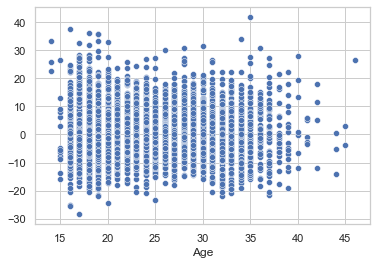

In [1083]:
sns.scatterplot(df_forwards_reg_test.Age, 
                df_forwards_reg_test.PA-df_forwards_reg_test.PA_pred)